In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib


In [2]:
#READING MAIN CONSUMER DATASET
# Read consumer electronics file
#CE_df=pd.read_csv("C:/Users/aramanan/Downloads/ConsumerElectronics.csv")
CE_df=pd.read_csv(r"C:\Users\vishw\OneDrive\Desktop\New folder\UG\E Commerce\Eleckart project\ConsumerElectronics.csv")
CE_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (6,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


fsn_id           order_date  Year  Month      order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17 15:11:54  2015     10  3.419301e+15   
1  ACCCX3S58G7B5F6P  2015-10-19 10:07:22  2015     10  1.420831e+15   
2  ACCCX3S5AHMF55FV  2015-10-20 15:45:56  2015     10  2.421913e+15   
3  ACCCX3S5AHMF55FV  2015-10-14 12:05:15  2015     10  4.416592e+15   
4  ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015     10  4.419525e+15   

   order_item_id   gmv  units deliverybdays deliverycdays  \
0   3.419301e+15  6400      1            \N            \N   
1   1.420831e+15  6900      1            \N            \N   
2   2.421913e+15  1990      1            \N            \N   
3   4.416592e+15  1690      1            \N            \N   
4   4.419525e+15  1618      1            \N            \N   

  s1_fact.order_payment_type  sla                 cust_id  \
0                        COD    5  -1.01299130778588E+018   
1                        COD    7  -8.99032457905512E+018   
2                        COD   10   -1.0404429420466E+018   
3                    Prepaid    4  -7.60496084352714E+018   
4                    Prepaid    6    2.8945572083453E+018   

                  pincode product_analytic_super_category  \
0  -7.79175582905735E+018                              CE   
1   7.33541149097431E+018                              CE   
2  -7.47768776228657E+018                              CE   
3  -5.83593163877661E+018                              CE   
4   5.34735360997242E+017                              CE   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  
0              CameraTripod         7190                        0  
1              CameraTripod         7190                        0  
2              CameraTripod         2099                        3  
3              CameraTripod         2099                        3  
4              CameraTripod         2099                        3

# Preliminary Data checks

In [3]:
# Num of rows and columns
CE_df.shape

(1648824, 20)

In [4]:
CE_df.info()
#We see below that GMV is an object, we should convert GMV as a float 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
fsn_id                             1648824 non-null object
order_date                         1648824 non-null object
Year                               1648824 non-null int64
Month                              1648824 non-null int64
order_id                           1648824 non-null float64
order_item_id                      1648824 non-null float64
gmv                                1648824 non-null object
units                              1648824 non-null int64
deliverybdays                      1648824 non-null object
deliverycdays                      1648824 non-null object
s1_fact.order_payment_type         1648824 non-null object
sla                                1648824 non-null int64
cust_id                            1648824 non-null object
pincode                            1648824 non-null object
product_analytic_super_category    1648824 non-null object
prod

In [5]:
CE_df.describe()

Year         Month      order_id  order_item_id         units  \
count  1.648824e+06  1.648824e+06  1.648824e+06   1.648824e+06  1.648824e+06   
mean   2.015519e+03  6.585650e+00  2.842445e+15   1.375628e+16  1.022087e+00   
std    4.996557e-01  3.623351e+00  1.269134e+15   5.594598e+16  2.535318e-01   
min    2.015000e+03  1.000000e+00  7.633152e+07   1.080165e+08  1.000000e+00   
25%    2.015000e+03  3.000000e+00  1.602589e+15   1.606725e+15  1.000000e+00   
50%    2.016000e+03  6.000000e+00  2.611825e+15   2.619185e+15  1.000000e+00   
75%    2.016000e+03  1.000000e+01  3.610614e+15   4.397706e+15  1.000000e+00   
max    2.016000e+03  1.200000e+01  5.395077e+15   3.000373e+17  5.000000e+01   

                sla   product_mrp  product_procurement_sla  
count  1.648824e+06  1.648824e+06             1.648824e+06  
mean   5.687832e+00  4.108309e+03             5.403451e+00  
std    2.983336e+00  8.510918e+03             5.346618e+01  
min    0.000000e+00  0.000000e+00            -1.000000e+00  
25%    4.000000e+00  7.990000e+02             1.000000e+00  
50%    6.000000e+00  1.599000e+03             2.000000e+00  
75%    7.000000e+00  3.499000e+03             3.000000e+00  
max    1.006000e+03  2.999990e+05             1.000000e+03

# Data Cleaning 

In [6]:
# We see columns deliverybdays & deliverycdays having junk values, we can drop these columns
CE_df.drop(['deliverybdays', 'deliverycdays'],1, inplace = True)
CE_df.head()


fsn_id           order_date  Year  Month      order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17 15:11:54  2015     10  3.419301e+15   
1  ACCCX3S58G7B5F6P  2015-10-19 10:07:22  2015     10  1.420831e+15   
2  ACCCX3S5AHMF55FV  2015-10-20 15:45:56  2015     10  2.421913e+15   
3  ACCCX3S5AHMF55FV  2015-10-14 12:05:15  2015     10  4.416592e+15   
4  ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015     10  4.419525e+15   

   order_item_id   gmv  units s1_fact.order_payment_type  sla  \
0   3.419301e+15  6400      1                        COD    5   
1   1.420831e+15  6900      1                        COD    7   
2   2.421913e+15  1990      1                        COD   10   
3   4.416592e+15  1690      1                    Prepaid    4   
4   4.419525e+15  1618      1                    Prepaid    6   

                  cust_id                 pincode  \
0  -1.01299130778588E+018  -7.79175582905735E+018   
1  -8.99032457905512E+018   7.33541149097431E+018   
2   -1.0404429420466E+018  -7.47768776228657E+018   
3  -7.60496084352714E+018  -5.83593163877661E+018   
4    2.8945572083453E+018   5.34735360997242E+017   

  product_analytic_super_category product_analytic_category  \
0                              CE           CameraAccessory   
1                              CE           CameraAccessory   
2                              CE           CameraAccessory   
3                              CE           CameraAccessory   
4                              CE           CameraAccessory   

  product_analytic_sub_category product_analytic_vertical  product_mrp  \
0               CameraAccessory              CameraTripod         7190   
1               CameraAccessory              CameraTripod         7190   
2               CameraAccessory              CameraTripod         2099   
3               CameraAccessory              CameraTripod         2099   
4               CameraAccessory              CameraTripod         2099   

   product_procurement_sla  
0                        0  
1                        0  
2                        3  
3                        3  
4                        3

In [7]:
# around 4904 records have blank gmv. We can drop these rows as we cant impute the missing values since we dont have 
# Gross Margin % and product cost to calculate GMV from product MRP & Units
print(CE_df[CE_df['gmv']==' '].shape)
# Drop these 4904 rows with blank GMV
CE_df=CE_df[CE_df['gmv']!=' ']
print(CE_df.shape)

(4904, 18)
(1643920, 18)


In [8]:
#changing datatype of order_id and order_item_id from float to integer
# changing datatype of GMV from object to float
cols = ['order_id', 'order_item_id']
CE_df[cols] = CE_df[cols].applymap(np.int64)
CE_df['gmv']=CE_df['gmv'].apply(np.float64)
# Remove the time part from order date and Convert order date from string to datetime format
CE_df["order_date"] = pd.to_datetime(CE_df["order_date"]).dt.date
CE_df["order_date"] = pd.to_datetime(CE_df["order_date"],format="%Y-%m-%d")
CE_df.head()

fsn_id order_date  Year  Month          order_id  \
0  ACCCX3S58G7B5F6P 2015-10-17  2015     10  3419300926147000   
1  ACCCX3S58G7B5F6P 2015-10-19  2015     10  1420830839915200   
2  ACCCX3S5AHMF55FV 2015-10-20  2015     10  2421912925714800   
3  ACCCX3S5AHMF55FV 2015-10-14  2015     10  4416592101738400   
4  ACCCX3S5AHMF55FV 2015-10-17  2015     10  4419525153426400   

      order_item_id     gmv  units s1_fact.order_payment_type  sla  \
0  3419300926147000  6400.0      1                        COD    5   
1  1420830839915200  6900.0      1                        COD    7   
2  2421912925714800  1990.0      1                        COD   10   
3  4416592101738400  1690.0      1                    Prepaid    4   
4  4419525153426400  1618.0      1                    Prepaid    6   

                  cust_id                 pincode  \
0  -1.01299130778588E+018  -7.79175582905735E+018   
1  -8.99032457905512E+018   7.33541149097431E+018   
2   -1.0404429420466E+018  -7.47768776228657E+018   
3  -7.60496084352714E+018  -5.83593163877661E+018   
4    2.8945572083453E+018   5.34735360997242E+017   

  product_analytic_super_category product_analytic_category  \
0                              CE           CameraAccessory   
1                              CE           CameraAccessory   
2                              CE           CameraAccessory   
3                              CE           CameraAccessory   
4                              CE           CameraAccessory   

  product_analytic_sub_category product_analytic_vertical  product_mrp  \
0               CameraAccessory              CameraTripod         7190   
1               CameraAccessory              CameraTripod         7190   
2               CameraAccessory              CameraTripod         2099   
3               CameraAccessory              CameraTripod         2099   
4               CameraAccessory              CameraTripod         2099   

   product_procurement_sla  
0                        0  
1                        0  
2                        3  
3                        3  
4                        3

In [9]:
# The below table lists the count of records with zero gmv by product sub-category
CE_df[CE_df['gmv']==0]['product_analytic_sub_category'].value_counts()


CameraAccessory    381
Speaker            378
GamingAccessory    243
Game               121
TVVideoSmall       117
AudioMP3Player      56
Camera              52
HomeAudio            1
Name: product_analytic_sub_category, dtype: int64

In [10]:
print(CE_df[CE_df['gmv']==0].shape)
# We can see the product mrp is zero as well for these records where gmv is zero.

# Example where one order has zero gmv record
CE_df[CE_df['order_id']==2410511726073800]
# Looks like in the same order , one record shows customer bought and paid for three camera batteries
# another record shows customer got three camera batteries with zero mrp
# Please note all columns values are same except for the fsn_id i.e sku id.

# We can drop these records with zero gmv as it looks like these records have missing or incorrect values 

(1349, 18)


fsn_id order_date  Year  Month          order_id  \
17451  ACCDM6FFJZZGYXKG 2015-10-07  2015     10  2410511726073800   
18616  ACCDMWRZXKRGMDS9 2015-10-07  2015     10  2410511726073800   

          order_item_id     gmv  units s1_fact.order_payment_type  sla  \
17451  2410511726073800  1416.0      3                        COD    3   
18616  2410511726073800     0.0      3                        COD    3   

                      cust_id                 pincode  \
17451  -5.55097920234365E+017  -2.93946633495511E+018   
18616  -5.55097920234365E+017  -2.93946633495511E+018   

      product_analytic_super_category product_analytic_category  \
17451                              CE           CameraAccessory   
18616                              CE           CameraAccessory   

      product_analytic_sub_category product_analytic_vertical  product_mrp  \
17451               CameraAccessory             CameraBattery          520   
18616               CameraAccessory             CameraBattery            0   

       product_procurement_sla  
17451                        3  
18616                       -1

In [11]:
# Drop rows with gmv values zero
CE_df=CE_df[CE_df['gmv']!=0]
CE_df.shape

(1642571, 18)

In [12]:
print(CE_df[CE_df['gmv']<0])
# There are no rows where GMV is less than 0

Empty DataFrame
Columns: [fsn_id, order_date, Year, Month, order_id, order_item_id, gmv, units, s1_fact.order_payment_type, sla, cust_id, pincode, product_analytic_super_category, product_analytic_category, product_analytic_sub_category, product_analytic_vertical, product_mrp, product_procurement_sla]
Index: []


In [13]:
#Checking SLA's - now SLA cannot be negetivae
 
print(CE_df[CE_df['product_procurement_sla']<0].shape[0])
print(CE_df[CE_df['sla']<0].shape[0])
#So there are 75246 rows where procumrement SLA is negative, this means data is corrupt so we will drop these rows

75246
0


In [14]:
# Drop rows with gmv values zero
CE_df=CE_df[CE_df['product_procurement_sla']>=0]
CE_df.shape

(1567325, 18)

In [15]:
# Check if zero MRP is there
d1f = CE_df[CE_df['product_mrp']==0]
# Drop these rows even though GMV values are present.
d1f.shape[0]

0

In [16]:
#Now we will drop such rows
# Drop rows with product_mrp values zero
CE_df=CE_df[CE_df['product_mrp']!=0]
CE_df.shape

(1567325, 18)

In [17]:
# Check the null percentage of columns
round(100*(CE_df.isnull().sum()/len(CE_df.index)), 2)

#WE establish below that there are no Nulls present

fsn_id                             0.0
order_date                         0.0
Year                               0.0
Month                              0.0
order_id                           0.0
order_item_id                      0.0
gmv                                0.0
units                              0.0
s1_fact.order_payment_type         0.0
sla                                0.0
cust_id                            0.0
pincode                            0.0
product_analytic_super_category    0.0
product_analytic_category          0.0
product_analytic_sub_category      0.0
product_analytic_vertical          0.0
product_mrp                        0.0
product_procurement_sla            0.0
dtype: float64

In [18]:
# CHecking Sub categories. We are analysing only Gaming, Camera and Home, we can drop other sub categories
CE_df.product_analytic_sub_category.unique()

array(['CameraAccessory', 'GamingAccessory', 'Speaker', 'HomeAudio',
       'CameraStorage', 'AmplifierReceiver', 'AudioMP3Player', 'Game',
       'Camera', 'GamingConsole', 'HomeTheatre', 'AudioAccessory',
       'TVVideoSmall', 'GameMembershipCards'], dtype=object)

In [19]:
#The three product sub categories for the MMM are - camera accessory, home audio and gaming accessory.
#Removing the rows with other sub categories
CE_df  = CE_df.loc[(CE_df.product_analytic_sub_category=='CameraAccessory') | (CE_df.product_analytic_sub_category=='GamingAccessory')|
                       (CE_df.product_analytic_sub_category=='HomeAudio')]

In [20]:
CE_df.shape

(549168, 18)

In [21]:
CE_df.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 's1_fact.order_payment_type', 'sla', 'cust_id',
       'pincode', 'product_analytic_super_category',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla'],
      dtype='object')

In [22]:
# Duplicate rows maybe present and would need to be removed
CE_df[CE_df.duplicated(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 's1_fact.order_payment_type', 'sla', 'cust_id',
       'pincode', 'product_analytic_super_category',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla'])].head(20)

fsn_id order_date  Year  Month          order_id  \
724    ACCCX3SU22JG8NJX 2015-10-22  2015     10  3423459581510700   
4693   ACCD5K4G3FFE62BA 2015-10-08  2015     10  2411531356081500   
19150  ACCDNAYZH7CGNNZM 2015-10-30  2015     10  4419307258266800   
27787  ACCDTZ99YBBGF22U 2015-11-04  2015     11  1431230171778600   
27828  ACCDTZ99YBBGF22U 2015-11-04  2015     11  1431230171778600   
30685  ACCDVZ83VBHCWFFA 2015-10-30  2015     10  2430408435376200   
30823  ACCDVZ83VBHCWFFA 2015-10-30  2015     10  2430408435376200   
31054  ACCDVZ83VBHCWFFA 2015-10-30  2015     10  2430408435376200   
37437  ACCDXU54QUBYJSHG 2015-10-17  2015     10  1419472327606700   
48574  ACCE32FMXZYY8VDG 2015-10-11  2015     10  4414167877305400   
48590  ACCE32FMXZYY8VDG 2015-10-11  2015     10  4414167877305400   
58570  ACCE62MTYYWEERNQ 2015-10-16  2015     10  1418350606921300   
76506  ACCE6YVWVHXXKCHW 2016-02-22  2016      2  3417290135521600   
82301  ACCE8FTBQ7H5FSCV 2015-10-10  2015     10  3408122282003600   
82688  ACCE8FTBSXZQ8QMY 2015-10-16  2015     10  3418216532755500   
83516  ACCE8FTBZSFBFNGT 2015-10-17  2015     10  1419570225513800   
83691  ACCE8FTHTHW6QNCC 2015-10-02  2015     10  4406530368238500   
85902  ACCE8HPAZFJSGK8E 2015-10-28  2015     10  1418536570210400   
87673  ACCE8TDWFVW9PWVW 2015-10-15  2015     10  1417331730723300   
89659  ACCE93HHGZAY3KBM 2015-11-01  2015     11  1418193532590000   

          order_item_id          gmv  units s1_fact.order_payment_type  sla  \
724    3423459581510700   470.000000      1                        COD    9   
4693   2411531356081500  1900.000000      1                        COD    5   
19150  4419307258266800  1780.000000      1                    Prepaid    6   
27787  1431230171778600  2299.000000      1                        COD    5   
27828  1431230171778600  2299.000000      1                        COD    5   
30685  2430408435376200  5916.000000      2                        COD    2   
30823  2430408435376200  5916.000000      2                        COD    2   
31054  2430408435376200  5916.000000      2                        COD    2   
37437  1419472327606700  1632.000000      1                    Prepaid    3   
48574  4414167877305400  3890.000000      2                        COD    2   
48590  4414167877305400  3890.000000      2                        COD    2   
58570  1418350606921300  1344.566677      5                    Prepaid    1   
76506  3417290135521600   350.000000      1                    Prepaid    8   
82301  3408122282003600   299.000000      1                    Prepaid    3   
82688  3418216532755500    89.110549      1                        COD    3   
83516  1419570225513800   374.500000      1                    Prepaid    6   
83691  4406530368238500   449.000000      1                    Prepaid    7   
85902  1418536570210400   249.000000      1                        COD    4   
87673  1417331730723300    90.000000      1                        COD   14   
89659  1418193532590000   645.000000      1                        COD   16   

                      cust_id                 pincode  \
724    -9.14246575108792E+018   8.21046334457225E+017   
4693   -1.40831352548453E+018  -8.02011359574059E+018   
19150  -9.15438807972729E+017  -4.76917064425218E+018   
27787   7.95916196087158E+018   6.91010867773377E+018   
27828   7.95916196087158E+018   6.91010867773377E+018   
30685  -8.00499660129495E+018   6.28063694568033E+018   
30823  -8.00499660129495E+018   6.28063694568033E+018   
31054  -8.00499660129495E+018   6.28063694568033E+018   
37437   6.58914563229904E+017  -8.59252502409921E+018   
48574  -5.98886069446694E+018  -9.12549699755515E+018   
48590  -5.98886069446694E+018  -9.12549699755515E+018   
58570   7.31951262042611E+018   1.59581542850561E+017   
76506  -1.07035781735315E+018   8.45640885616433E+018   
82301   6.52042160658498E+018   -8.3929498147529E+018   
82688  -5.80722171295459E+018   7.96657288734481E+01

In [23]:
ddf = CE_df[CE_df.duplicated(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 's1_fact.order_payment_type', 'sla', 'cust_id',
       'pincode', 'product_analytic_super_category',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla'])]
ddf.shape
#So there are 36565 duplicated rows, we will drop them in the next step

(36565, 18)

In [24]:
CE_df.drop_duplicates(keep='first', inplace=True)
CE_df.shape
#After dropping duplicates we have 523469 rows left

(512603, 18)

In [25]:
CE_df.columns

 
#Now we dont need all the columns to do further analysiseg customer id, pincode, super category, category are not needed
# As all values are nearly all same for either of Gaming acc/Camera acc/Homeaudio 

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 's1_fact.order_payment_type', 'sla', 'cust_id',
       'pincode', 'product_analytic_super_category',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla'],
      dtype='object')

In [26]:
#We drop columns identified in above step - Howevere product analytic vertical is a subdivision of group so it might be useful
CE_df.drop([ 'cust_id','pincode','fsn_id','product_analytic_super_category',
            'product_analytic_category'],axis=1,inplace=True)

In [27]:
CE_df.shape

(512603, 13)

In [28]:
#We see that in the dataset there are 200 rows where date is before Jul 2015 OR after Jun 2016, we will discard those rows
#We will only keep data between Jul 2015 and Jun 2016, lets check number of rows
CE_df.loc[(CE_df['order_date'].dt.floor("d") < '2015-07-01') | (CE_df['order_date'].dt.floor("d") >= '2016-07-01')].shape

(194, 13)

In [29]:
CE_df = CE_df.loc[(CE_df['order_date'].dt.floor("d") >= '2015-07-01') & (CE_df['order_date'].dt.floor("d") < '2016-07-01')]
CE_df.shape

(512409, 13)

In [30]:
print(pd.DataFrame(CE_df[['order_date']].max()))
print(pd.DataFrame(CE_df[['order_date']].min()))

#We see that Data now is between Jul 2015 and Jun 2016 - max is displayed first below

                    0
order_date 2016-06-30
                    0
order_date 2015-07-01


In [31]:
from datetime import datetime
# Week column will be placed next to Month
pos = CE_df.columns.get_loc('Month') + 1
CE_df.insert(loc=pos,column='Week',value=CE_df['order_date'].dt.strftime("%V"))

CE_df['Year'] = CE_df['Year'].astype('str')
CE_df.head()

order_date  Year  Month Week          order_id     order_item_id     gmv  \
0 2015-10-17  2015     10   42  3419300926147000  3419300926147000  6400.0   
1 2015-10-19  2015     10   43  1420830839915200  1420830839915200  6900.0   
2 2015-10-20  2015     10   43  2421912925714800  2421912925714800  1990.0   
3 2015-10-14  2015     10   42  4416592101738400  4416592101738400  1690.0   
4 2015-10-17  2015     10   42  4419525153426400  4419525153426400  1618.0   

   units s1_fact.order_payment_type  sla product_analytic_sub_category  \
0      1                        COD    5               CameraAccessory   
1      1                        COD    7               CameraAccessory   
2      1                        COD   10               CameraAccessory   
3      1                    Prepaid    4               CameraAccessory   
4      1                    Prepaid    6               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  
0              CameraTripod         7190                        0  
1              CameraTripod         7190                        0  
2              CameraTripod         2099                        3  
3              CameraTripod         2099                        3  
4              CameraTripod         2099                        3

In [32]:
CE_df.head()

order_date  Year  Month Week          order_id     order_item_id     gmv  \
0 2015-10-17  2015     10   42  3419300926147000  3419300926147000  6400.0   
1 2015-10-19  2015     10   43  1420830839915200  1420830839915200  6900.0   
2 2015-10-20  2015     10   43  2421912925714800  2421912925714800  1990.0   
3 2015-10-14  2015     10   42  4416592101738400  4416592101738400  1690.0   
4 2015-10-17  2015     10   42  4419525153426400  4419525153426400  1618.0   

   units s1_fact.order_payment_type  sla product_analytic_sub_category  \
0      1                        COD    5               CameraAccessory   
1      1                        COD    7               CameraAccessory   
2      1                        COD   10               CameraAccessory   
3      1                    Prepaid    4               CameraAccessory   
4      1                    Prepaid    6               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  
0              CameraTripod         7190                        0  
1              CameraTripod         7190                        0  
2              CameraTripod         2099                        3  
3              CameraTripod         2099                        3  
4              CameraTripod         2099                        3

In [33]:
CE_df.groupby(['Year', 'Week']).agg({'Month':"count"}).reset_index(drop=True)

Month
0      93
1    7829
2    8212
3    7708
4    5358
5       9
6       5
7       2
8       7
9    7549
10   8179
11   7632
12   8155
13   9402
14   7328
15  29633
16   8554
17  11257
18  12776
19   9952
20   7450
21   8995
22   9382
23  11549
24   9283
25  13150
26   5743
27  13031
28  10042
29  13226
30   9328
31  12874
32  10296
33  15244
34  13241
35  12566
36  14585
37  10268
38  10010
39  10689
40  10614
41   8799
42   5155
43  18319
44  11622
45  12186
46  11448
47  13823
48  11338
49  11187
50   9998
51   7951
52   4472
53   4905

In [34]:
# Week 53 is actually the last week of 2015
CE_df.loc[(CE_df.Year == '2016') & (CE_df.Week == '53'), 'Year'] = '2015'
# setting month as 12 for the above rows as its set into 2015
CE_df.loc[(CE_df.Year == '2015') & (CE_df.Week == '53'), 'Month'] = 12
CE_df.drop(CE_df[CE_df['Week'] == '27'].index, inplace = True)

In [35]:
CE_df.groupby(['Year', 'Week']).agg({'Month':"count"}).reset_index(drop=False)

Year Week  Month
0   2015   28   7829
1   2015   29   8212
2   2015   30   7708
3   2015   31   5358
4   2015   32      9
5   2015   33      5
6   2015   34      2
7   2015   35      7
8   2015   36   7549
9   2015   37   8179
10  2015   38   7632
11  2015   39   8155
12  2015   40   9402
13  2015   41   7328
14  2015   42  29633
15  2015   43   8554
16  2015   44  11257
17  2015   45  12776
18  2015   46   9952
19  2015   47   7450
20  2015   48   8995
21  2015   49   9382
22  2015   50  11549
23  2015   51   9283
24  2015   52  13150
25  2015   53  10648
26  2016   01  13031
27  2016   02  10042
28  2016   03  13226
29  2016   04   9328
30  2016   05  12874
31  2016   06  10296
32  2016   07  15244
33  2016   08  13241
34  2016   09  12566
35  2016   10  14585
36  2016   11  10268
37  2016   12  10010
38  2016   13  10689
39  2016   14  10614
40  2016   15   8799
41  2016   16   5155
42  2016   17  18319
43  2016   18  11622
44  2016   19  12186
45  2016   20  11448
46  2016   21  13823
47  2016   22  11338
48  2016   23  11187
49  2016   24   9998
50  2016   25   7951
51  2016   26   4472

# Feature engineering
 

In [36]:
#PayFlag - We are given that many peeople get paid on 1st and/or 15th of the month and might spend their earnings on some products
pd.options.mode.chained_assignment = None   
CE_df['pay_flag']=np.where((CE_df['order_date'].dt.day==1) | (CE_df['order_date'].dt.day==15),1,0)
CE_df.head()

order_date  Year  Month Week          order_id     order_item_id     gmv  \
0 2015-10-17  2015     10   42  3419300926147000  3419300926147000  6400.0   
1 2015-10-19  2015     10   43  1420830839915200  1420830839915200  6900.0   
2 2015-10-20  2015     10   43  2421912925714800  2421912925714800  1990.0   
3 2015-10-14  2015     10   42  4416592101738400  4416592101738400  1690.0   
4 2015-10-17  2015     10   42  4419525153426400  4419525153426400  1618.0   

   units s1_fact.order_payment_type  sla product_analytic_sub_category  \
0      1                        COD    5               CameraAccessory   
1      1                        COD    7               CameraAccessory   
2      1                        COD   10               CameraAccessory   
3      1                    Prepaid    4               CameraAccessory   
4      1                    Prepaid    6               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  pay_flag  
0              CameraTripod         7190                        0         0  
1              CameraTripod         7190                        0         0  
2              CameraTripod         2099                        3         0  
3              CameraTripod         2099                        3         0  
4              CameraTripod         2099                        3         0

In [37]:
# Payment_type only is either COD or prepaid. We can covert that into binary by encoding value 1 if payment type is COD else 0 (prepaid)
CE_df["payment_type_code"] = np.where(CE_df["s1_fact.order_payment_type"].str.contains("COD"), 1, 0)
# Dropping the original variable
CE_df.drop('s1_fact.order_payment_type',axis=1,inplace=True)
CE_df.head()

order_date  Year  Month Week          order_id     order_item_id     gmv  \
0 2015-10-17  2015     10   42  3419300926147000  3419300926147000  6400.0   
1 2015-10-19  2015     10   43  1420830839915200  1420830839915200  6900.0   
2 2015-10-20  2015     10   43  2421912925714800  2421912925714800  1990.0   
3 2015-10-14  2015     10   42  4416592101738400  4416592101738400  1690.0   
4 2015-10-17  2015     10   42  4419525153426400  4419525153426400  1618.0   

   units  sla product_analytic_sub_category product_analytic_vertical  \
0      1    5               CameraAccessory              CameraTripod   
1      1    7               CameraAccessory              CameraTripod   
2      1   10               CameraAccessory              CameraTripod   
3      1    4               CameraAccessory              CameraTripod   
4      1    6               CameraAccessory              CameraTripod   

   product_mrp  product_procurement_sla  pay_flag  payment_type_code  
0         7190                        0         0                  1  
1         7190                        0         0                  1  
2         2099                        3         0                  1  
3         2099                        3         0                  0  
4         2099                        3         0                  0

In [38]:
CE_df.shape

(512316, 15)

In [39]:
# Populate holiday flag for all weekends, 25th Dec and Jan 1st dates
# Load holiday list file
#Hols=pd.read_csv("List of Holiday.txt",sep=",", header=None)
Hols=pd.read_csv(r"C:\Users\vishw\OneDrive\Desktop\New folder\UG\E Commerce\Eleckart project\ECOM Case Study Resources\List of Holiday.txt",sep=",", header=None)
Hols_T=Hols.transpose()
Hols_T.rename(columns={0:'order_date'},inplace=True)
Hols_T['order_date']=pd.to_datetime(Hols_T['order_date'],format='%Y-%m-%d')
Hols_T['holiday_flag']=1
# Join Holiday list and dataframe 
CE_df_Hols=pd.merge(CE_df,Hols_T,how='left',on='order_date') 

# Fill na values with 0 for holida flag
CE_df_Hols['holiday_flag'].fillna(0,inplace=True)

#Number of records against holiday flag
CE_df_Hols['holiday_flag'].value_counts()

0.0    427030
1.0     85286
Name: holiday_flag, dtype: int64

In [40]:
CE_df_Hols['holiday_flag'] = CE_df_Hols['holiday_flag'].astype(int)
CE_df_Hols['holiday_flag'].value_counts()

0    427030
1     85286
Name: holiday_flag, dtype: int64

In [41]:
#SO far we have created HOliday flag, Payment type and Pay flag, now we shall see if products can be classified as Premium or Not
#We will assume that any item with MRP lying in top 15 percentile is a premium product
CE_df_Hols['product_mrp'].quantile(.85)

3999.0

In [42]:
#So we mark items either as premium or normal
CE_df_Hols['item_class'] = CE_df_Hols['product_mrp'].apply(lambda x:'Premium' if x >= 3999 else 'Normal')
CE_df_Hols.head()

order_date  Year  Month Week          order_id     order_item_id     gmv  \
0 2015-10-17  2015     10   42  3419300926147000  3419300926147000  6400.0   
1 2015-10-19  2015     10   43  1420830839915200  1420830839915200  6900.0   
2 2015-10-20  2015     10   43  2421912925714800  2421912925714800  1990.0   
3 2015-10-14  2015     10   42  4416592101738400  4416592101738400  1690.0   
4 2015-10-17  2015     10   42  4419525153426400  4419525153426400  1618.0   

   units  sla product_analytic_sub_category product_analytic_vertical  \
0      1    5               CameraAccessory              CameraTripod   
1      1    7               CameraAccessory              CameraTripod   
2      1   10               CameraAccessory              CameraTripod   
3      1    4               CameraAccessory              CameraTripod   
4      1    6               CameraAccessory              CameraTripod   

   product_mrp  product_procurement_sla  pay_flag  payment_type_code  \
0         7190                        0         0                  1   
1         7190                        0         0                  1   
2         2099                        3         0                  1   
3         2099                        3         0                  0   
4         2099                        3         0                  0   

   holiday_flag item_class  
0             1    Premium  
1             0    Premium  
2             0     Normal  
3             0     Normal  
4             1     Normal

In [43]:
# Selling price will give us an insight on how much discount is offered
CE_df_Hols['Selling_price'] = CE_df_Hols['gmv'] / CE_df_Hols['units']
 
CE_df_Hols.head()

order_date  Year  Month Week          order_id     order_item_id     gmv  \
0 2015-10-17  2015     10   42  3419300926147000  3419300926147000  6400.0   
1 2015-10-19  2015     10   43  1420830839915200  1420830839915200  6900.0   
2 2015-10-20  2015     10   43  2421912925714800  2421912925714800  1990.0   
3 2015-10-14  2015     10   42  4416592101738400  4416592101738400  1690.0   
4 2015-10-17  2015     10   42  4419525153426400  4419525153426400  1618.0   

   units  sla product_analytic_sub_category product_analytic_vertical  \
0      1    5               CameraAccessory              CameraTripod   
1      1    7               CameraAccessory              CameraTripod   
2      1   10               CameraAccessory              CameraTripod   
3      1    4               CameraAccessory              CameraTripod   
4      1    6               CameraAccessory              CameraTripod   

   product_mrp  product_procurement_sla  pay_flag  payment_type_code  \
0         7190                        0         0                  1   
1         7190                        0         0                  1   
2         2099                        3         0                  1   
3         2099                        3         0                  0   
4         2099                        3         0                  0   

   holiday_flag item_class  Selling_price  
0             1    Premium         6400.0  
1             0    Premium         6900.0  
2             0     Normal         1990.0  
3             0     Normal         1690.0  
4             1     Normal         1618.0

In [44]:
#Now we create a %discount columns, though its related with GMV,units and SP, we can still have it and drop other related fields later
CE_df_Hols['%Discount'] =  round(100*((CE_df_Hols['product_mrp'] - CE_df_Hols['Selling_price']) / CE_df_Hols['product_mrp']),2)
CE_df_Hols.head()

order_date  Year  Month Week          order_id     order_item_id     gmv  \
0 2015-10-17  2015     10   42  3419300926147000  3419300926147000  6400.0   
1 2015-10-19  2015     10   43  1420830839915200  1420830839915200  6900.0   
2 2015-10-20  2015     10   43  2421912925714800  2421912925714800  1990.0   
3 2015-10-14  2015     10   42  4416592101738400  4416592101738400  1690.0   
4 2015-10-17  2015     10   42  4419525153426400  4419525153426400  1618.0   

   units  sla product_analytic_sub_category product_analytic_vertical  \
0      1    5               CameraAccessory              CameraTripod   
1      1    7               CameraAccessory              CameraTripod   
2      1   10               CameraAccessory              CameraTripod   
3      1    4               CameraAccessory              CameraTripod   
4      1    6               CameraAccessory              CameraTripod   

   product_mrp  product_procurement_sla  pay_flag  payment_type_code  \
0         7190                        0         0                  1   
1         7190                        0         0                  1   
2         2099                        3         0                  1   
3         2099                        3         0                  0   
4         2099                        3         0                  0   

   holiday_flag item_class  Selling_price  %Discount  
0             1    Premium         6400.0      10.99  
1             0    Premium         6900.0       4.03  
2             0     Normal         1990.0       5.19  
3             0     Normal         1690.0      19.49  
4             1     Normal         1618.0      22.92

In [45]:
CE_df_Hols.shape

(512316, 19)

In [46]:
#Checking %Discount quantiles
 
CE_df_Hols['%Discount'].describe(percentiles=[0.05,0.1,.25,.5,.75,.90,.95,.99])

#We see that min is -704% discount which doesnt seem right - we need to remove such rows

count    512316.000000
mean         45.012397
std          25.090134
min        -704.280000
5%            3.890000
10%          12.060000
25%          26.330000
50%          46.050000
75%          62.820000
90%          79.170000
95%          85.650000
99%          91.270000
max          98.600000
Name: %Discount, dtype: float64

In [47]:
print(CE_df_Hols[CE_df_Hols['%Discount']<0].shape[0])

#There are 11985 rows where %discount is negative which means that product is sold more than the MRP, which is not good strategy
# to boost revenues. SO we will get rid of these rows
 

11985


In [48]:
#CE_df_Hols = CE_df_Hols.loc[(CE_df_Hols['%Discount'] >=0)]

CE_df_Hols = CE_df_Hols.loc[(CE_df_Hols['%Discount'] >=0)]
print(CE_df_Hols.shape[0])

500331


In [49]:
CE_df_Hols.dtypes

order_date                       datetime64[ns]
Year                                     object
Month                                     int64
Week                                     object
order_id                                  int64
order_item_id                             int64
gmv                                     float64
units                                     int64
sla                                       int64
product_analytic_sub_category            object
product_analytic_vertical                object
product_mrp                               int64
product_procurement_sla                   int64
pay_flag                                  int32
payment_type_code                         int32
holiday_flag                              int32
item_class                               object
Selling_price                           float64
%Discount                               float64
dtype: object

In [50]:
#We can drop Order iD and Order item id
CE_df_Hols.drop([ 'order_id', 'order_item_id'],axis=1,inplace=True)

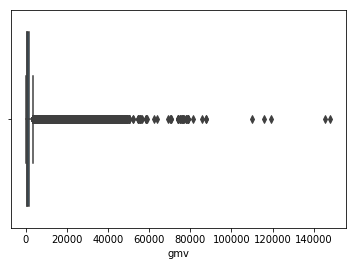

In [51]:
#Checking boxplot for GMV
sns.boxplot(CE_df_Hols['gmv'], data = CE_df_Hols)

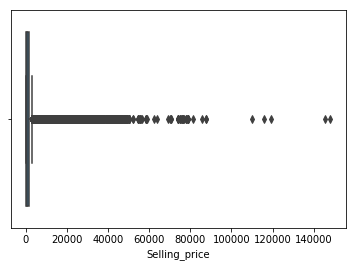

In [52]:
#Checking boxplot for Selling Price
sns.boxplot(CE_df_Hols['Selling_price'], data = CE_df_Hols)

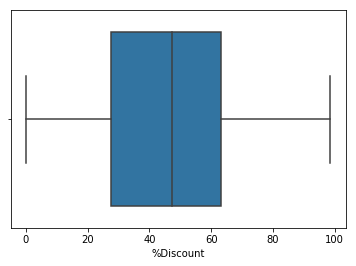

In [53]:
#Checking boxplot for Selling Price
sns.boxplot(CE_df_Hols['%Discount'], data = CE_df_Hols)

In [54]:
print(pd.DataFrame(CE_df_Hols[['%Discount']].max()))
print(pd.DataFrame(CE_df_Hols[['%Discount']].min()))

              0
%Discount  98.6
             0
%Discount  0.0


In [55]:
lis = CE_df_Hols.Week.unique().tolist()

In [56]:
print(lis)

['42', '43', '41', '44', '40', '45', '46', '16', '10', '08', '48', '47', '38', '17', '14', '02', '07', '05', '11', '13', '39', '09', '35', '03', '04', '49', '53', '12', '18', '50', '51', '06', '52', '01', '15', '21', '19', '22', '20', '23', '24', '25', '26', '29', '30', '28', '31', '37', '34', '33', '32', '36']


In [57]:
#Checking if our DF has any nulls
CE_df_Hols.isnull().values.any()

False

In [58]:
#Stats of the refined Dataframe
CE_df_Hols.describe()

Month            gmv          units            sla  \
count  500331.000000  500331.000000  500331.000000  500331.000000   
mean        6.310882    1266.554015       1.025419       5.890235   
std         3.672280    2374.831857       0.249896       2.692400   
min         1.000000      10.000000       1.000000       0.000000   
25%         3.000000     295.000000       1.000000       4.000000   
50%         6.000000     545.000000       1.000000       6.000000   
75%        10.000000    1490.000000       1.000000       7.000000   
max        12.000000  148050.000000      39.000000      60.000000   

         product_mrp  product_procurement_sla       pay_flag  \
count  500331.000000            500331.000000  500331.000000   
mean     2490.916463                 2.635595       0.064243   
std      4696.256771                 1.655129       0.245186   
min        99.000000                 0.000000       0.000000   
25%       766.000000                 2.000000       0.000000   
50%      1200.000000                 2.000000       0.000000   
75%      2800.000000                 3.000000       0.000000   
max    180000.000000                15.000000       1.000000   

       payment_type_code   holiday_flag  Selling_price      %Discount  
count      500331.000000  500331.000000  500331.000000  500331.000000  
mean            0.732469       0.167373    1250.326276      46.406097  
std             0.442672       0.373309    2358.108111      23.558648  
min             0.000000       0.000000      10.000000       0.000000  
25%             0.000000       0.000000     290.000000      27.670000  
50%             1.000000       0.000000     537.000000      47.250000  
75%             1.000000       0.000000    1450.000000      63.260000  
max             1.000000       1.000000  148050.000000      98.600000

# EDA on consumer data 

In [59]:
print(CE_df_Hols['product_analytic_sub_category'].value_counts())

CameraAccessory    212022
GamingAccessory    182220
HomeAudio          106089
Name: product_analytic_sub_category, dtype: int64


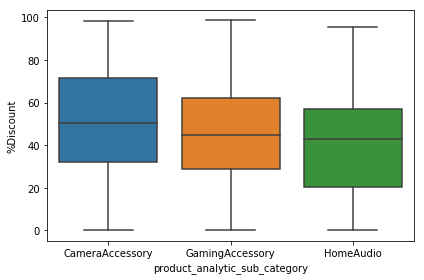

In [60]:
sns.boxplot(x='product_analytic_sub_category', y='%Discount',  data=CE_df_Hols)
plt.tight_layout()
plt.show()

#We observe below that Camera and Gaming accessory sometimes can sell for more than the MRP which is interseting

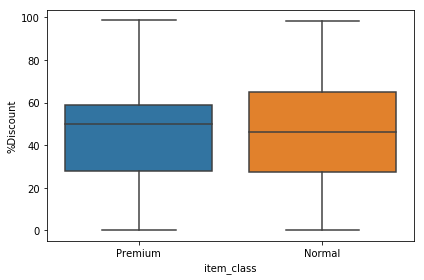

In [61]:
sns.boxplot(x='item_class', y='%Discount',  data=CE_df_Hols)
plt.tight_layout()
plt.show()

# We see below that there are instances when Normal prducts are sold way over the MRP, this could be because og High DEMand ? or shortage
# We would keep such data in our DF


Month



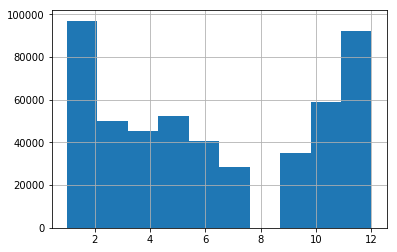


gmv



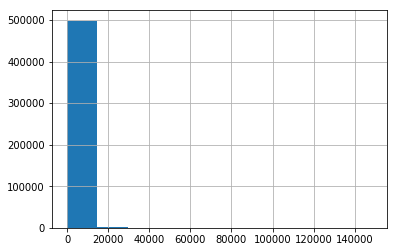


units



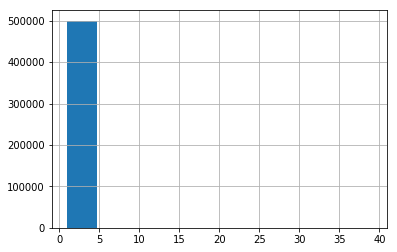


sla



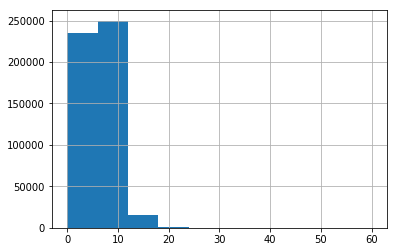


product_mrp



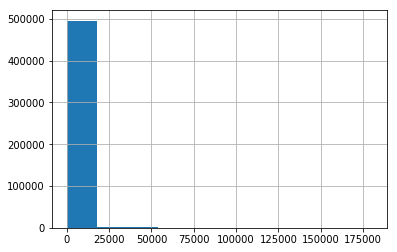


product_procurement_sla



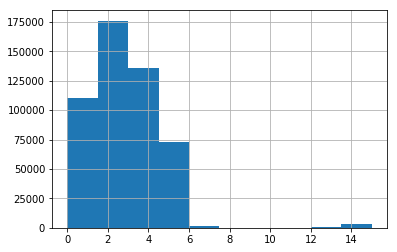


pay_flag



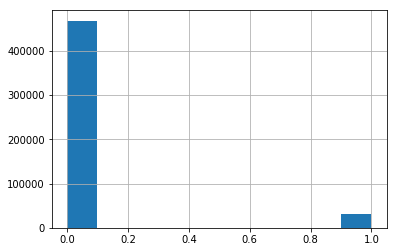


payment_type_code



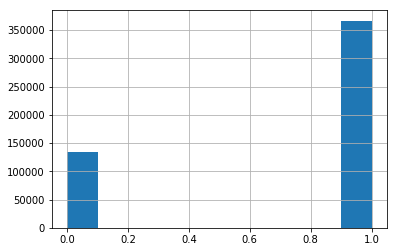


holiday_flag



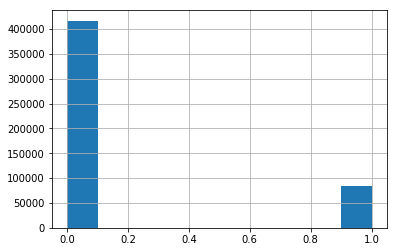


Selling_price



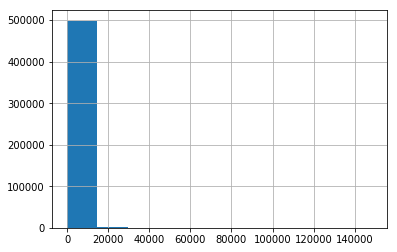


%Discount



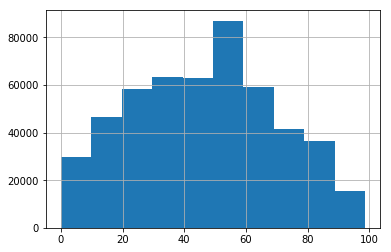

In [62]:
for col in CE_df_Hols.describe().columns:
    print( )
    print(col)
    print( )
    CE_df_Hols[col].hist()
    plt.show()

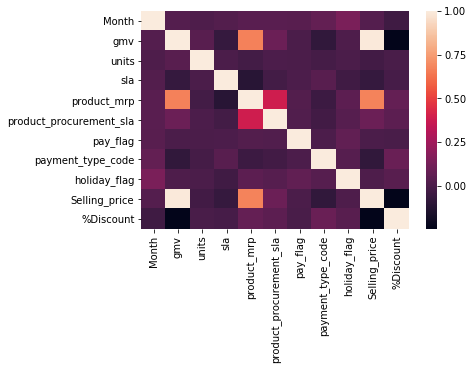

In [63]:
corr = CE_df_Hols.corr()

# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)

#We note that GMV and selling price are highly correlated, in the future we will remove Selling price

# Media,NPS,Sale Calendar and Climate Datasets

# Media 

In [64]:
#MEDIA investment

media= pd.read_excel(r"C:\Users\vishw\OneDrive\Desktop\New folder\UG\E Commerce\Eleckart project\Media data and other information.xlsx",sheet_name="Media Investment", skiprows=2)
media.head()

Unnamed: 0    Year  Month  Total Investment        TV    Digital  \
0         NaN  2015.0    7.0         17.061775  0.215330   2.533014   
1         NaN  2015.0    8.0          5.064306  0.006438   1.278074   
2         NaN  2015.0    9.0         96.254380  3.879504   1.356528   
3         NaN  2015.0   10.0        170.156297  6.144711  12.622480   
4         NaN  2015.0   11.0         51.216220  4.220630   1.275469   

   Sponsorship  Content Marketing  Online marketing   Affiliates        SEM  \
0     7.414270           0.000933          1.327278     0.547254   5.023697   
1     1.063332           0.000006          0.129244     0.073684   2.513528   
2    62.787651           0.610292         16.379990     5.038266   6.202149   
3    84.672532           3.444075         24.371778     6.973711  31.927011   
4    14.172116           0.168633         19.561574     6.595767   5.222032   

   Radio  Other  
0    NaN    NaN  
1    NaN    NaN  
2    NaN    NaN  
3    NaN    NaN  
4    NaN    NaN

In [65]:
media.drop(media.columns[0], axis=1, inplace = True)
media.head()

Year  Month  Total Investment        TV    Digital  Sponsorship  \
0  2015.0    7.0         17.061775  0.215330   2.533014     7.414270   
1  2015.0    8.0          5.064306  0.006438   1.278074     1.063332   
2  2015.0    9.0         96.254380  3.879504   1.356528    62.787651   
3  2015.0   10.0        170.156297  6.144711  12.622480    84.672532   
4  2015.0   11.0         51.216220  4.220630   1.275469    14.172116   

   Content Marketing  Online marketing   Affiliates        SEM  Radio  Other  
0           0.000933          1.327278     0.547254   5.023697    NaN    NaN  
1           0.000006          0.129244     0.073684   2.513528    NaN    NaN  
2           0.610292         16.379990     5.038266   6.202149    NaN    NaN  
3           3.444075         24.371778     6.973711  31.927011    NaN    NaN  
4           0.168633         19.561574     6.595767   5.222032    NaN    NaN

In [66]:
#media['Month'] = media['Month'].astype(int)
media 
#So there are some unwanted rows in Media investement

Year  Month  Total Investment         TV    Digital  Sponsorship  \
0   2015.0    7.0         17.061775   0.215330   2.533014     7.414270   
1   2015.0    8.0          5.064306   0.006438   1.278074     1.063332   
2   2015.0    9.0         96.254380   3.879504   1.356528    62.787651   
3   2015.0   10.0        170.156297   6.144711  12.622480    84.672532   
4   2015.0   11.0         51.216220   4.220630   1.275469    14.172116   
5   2015.0   12.0        106.745312   5.397502   3.063360    56.705419   
6   2016.0    1.0         74.196000   4.380000   0.456000     4.200000   
7   2016.0    2.0         48.052000   2.586008   1.912651    11.725555   
8   2016.0    3.0        100.024621   9.300000   2.100000    41.590000   
9   2016.0    4.0         56.848241   5.205196   0.871892    24.308354   
10  2016.0    5.0         78.057000   1.370000   0.770000    31.680000   
11  2016.0    6.0         42.834216   1.662717   1.420761    25.048541   
12     NaN    NaN               NaN        NaN        NaN          NaN   
13     NaN    NaN               NaN        NaN        NaN          NaN   
14     NaN    NaN               NaN        NaN        NaN          NaN   
15     NaN    NaN               NaN  18.549000        NaN          NaN   

    Content Marketing  Online marketing   Affiliates        SEM  Radio  \
0            0.000933          1.327278     0.547254   5.023697    NaN   
1            0.000006          0.129244     0.073684   2.513528    NaN   
2            0.610292         16.379990     5.038266   6.202149    NaN   
3            3.444075         24.371778     6.973711  31.927011    NaN   
4            0.168633         19.561574     6.595767   5.222032    NaN   
5            1.067307         22.503756     6.826938  11.181030    NaN   
6            0.900000         22.900000     7.370000   4.200000   2.70   
7            0.596771         19.892366     6.465019   4.873630    NaN   
8            0.370000         18.437818     6.217667   5.193591   0.87   
9            0.034876         16.514510     5.693456   4.219958    NaN   
10           0.790000         23.650000     6.800000   6.910000   1.10   
11           0.045081          7.971300     2.768023   3.735516    NaN   
12                NaN               NaN          NaN        NaN    NaN   
13                NaN               NaN          NaN        NaN    NaN   
14                NaN               NaN          NaN        NaN    NaN   
15                NaN               NaN          NaN        NaN    NaN   

        Other  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
5         NaN  
6   27.090000  
7         NaN  
8   15.945545  
9         NaN  
10   4.987000  
11        NaN  
12        NaN  
13        NaN  
14        NaN  
15        NaN

In [67]:
media  = media.iloc[0:12]

In [68]:
media

Year  Month  Total Investment        TV    Digital  Sponsorship  \
0   2015.0    7.0         17.061775  0.215330   2.533014     7.414270   
1   2015.0    8.0          5.064306  0.006438   1.278074     1.063332   
2   2015.0    9.0         96.254380  3.879504   1.356528    62.787651   
3   2015.0   10.0        170.156297  6.144711  12.622480    84.672532   
4   2015.0   11.0         51.216220  4.220630   1.275469    14.172116   
5   2015.0   12.0        106.745312  5.397502   3.063360    56.705419   
6   2016.0    1.0         74.196000  4.380000   0.456000     4.200000   
7   2016.0    2.0         48.052000  2.586008   1.912651    11.725555   
8   2016.0    3.0        100.024621  9.300000   2.100000    41.590000   
9   2016.0    4.0         56.848241  5.205196   0.871892    24.308354   
10  2016.0    5.0         78.057000  1.370000   0.770000    31.680000   
11  2016.0    6.0         42.834216  1.662717   1.420761    25.048541   

    Content Marketing  Online marketing   Affiliates        SEM  Radio  \
0            0.000933          1.327278     0.547254   5.023697    NaN   
1            0.000006          0.129244     0.073684   2.513528    NaN   
2            0.610292         16.379990     5.038266   6.202149    NaN   
3            3.444075         24.371778     6.973711  31.927011    NaN   
4            0.168633         19.561574     6.595767   5.222032    NaN   
5            1.067307         22.503756     6.826938  11.181030    NaN   
6            0.900000         22.900000     7.370000   4.200000   2.70   
7            0.596771         19.892366     6.465019   4.873630    NaN   
8            0.370000         18.437818     6.217667   5.193591   0.87   
9            0.034876         16.514510     5.693456   4.219958    NaN   
10           0.790000         23.650000     6.800000   6.910000   1.10   
11           0.045081          7.971300     2.768023   3.735516    NaN   

        Other  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
5         NaN  
6   27.090000  
7         NaN  
8   15.945545  
9         NaN  
10   4.987000  
11        NaN

In [69]:
#Most rows in Radio and Other are blanks, so filling with zeroes

media['Radio'].fillna(value=0, inplace=True)
media['Other'].fillna(value=0, inplace=True)

media.head()

Year  Month  Total Investment        TV    Digital  Sponsorship  \
0  2015.0    7.0         17.061775  0.215330   2.533014     7.414270   
1  2015.0    8.0          5.064306  0.006438   1.278074     1.063332   
2  2015.0    9.0         96.254380  3.879504   1.356528    62.787651   
3  2015.0   10.0        170.156297  6.144711  12.622480    84.672532   
4  2015.0   11.0         51.216220  4.220630   1.275469    14.172116   

   Content Marketing  Online marketing   Affiliates        SEM  Radio  Other  
0           0.000933          1.327278     0.547254   5.023697    0.0    0.0  
1           0.000006          0.129244     0.073684   2.513528    0.0    0.0  
2           0.610292         16.379990     5.038266   6.202149    0.0    0.0  
3           3.444075         24.371778     6.973711  31.927011    0.0    0.0  
4           0.168633         19.561574     6.595767   5.222032    0.0    0.0

In [70]:
media['Month'] = media['Month'].astype(int)
media 

Year  Month  Total Investment        TV    Digital  Sponsorship  \
0   2015.0      7         17.061775  0.215330   2.533014     7.414270   
1   2015.0      8          5.064306  0.006438   1.278074     1.063332   
2   2015.0      9         96.254380  3.879504   1.356528    62.787651   
3   2015.0     10        170.156297  6.144711  12.622480    84.672532   
4   2015.0     11         51.216220  4.220630   1.275469    14.172116   
5   2015.0     12        106.745312  5.397502   3.063360    56.705419   
6   2016.0      1         74.196000  4.380000   0.456000     4.200000   
7   2016.0      2         48.052000  2.586008   1.912651    11.725555   
8   2016.0      3        100.024621  9.300000   2.100000    41.590000   
9   2016.0      4         56.848241  5.205196   0.871892    24.308354   
10  2016.0      5         78.057000  1.370000   0.770000    31.680000   
11  2016.0      6         42.834216  1.662717   1.420761    25.048541   

    Content Marketing  Online marketing   Affiliates        SEM  Radio  \
0            0.000933          1.327278     0.547254   5.023697   0.00   
1            0.000006          0.129244     0.073684   2.513528   0.00   
2            0.610292         16.379990     5.038266   6.202149   0.00   
3            3.444075         24.371778     6.973711  31.927011   0.00   
4            0.168633         19.561574     6.595767   5.222032   0.00   
5            1.067307         22.503756     6.826938  11.181030   0.00   
6            0.900000         22.900000     7.370000   4.200000   2.70   
7            0.596771         19.892366     6.465019   4.873630   0.00   
8            0.370000         18.437818     6.217667   5.193591   0.87   
9            0.034876         16.514510     5.693456   4.219958   0.00   
10           0.790000         23.650000     6.800000   6.910000   1.10   
11           0.045081          7.971300     2.768023   3.735516   0.00   

        Other  
0    0.000000  
1    0.000000  
2    0.000000  
3    0.000000  
4    0.000000  
5    0.000000  
6   27.090000  
7    0.000000  
8   15.945545  
9    0.000000  
10   4.987000  
11   0.000000

In [71]:
media['Year'] = media['Year'].astype(int)
media 

Year  Month  Total Investment        TV    Digital  Sponsorship  \
0   2015      7         17.061775  0.215330   2.533014     7.414270   
1   2015      8          5.064306  0.006438   1.278074     1.063332   
2   2015      9         96.254380  3.879504   1.356528    62.787651   
3   2015     10        170.156297  6.144711  12.622480    84.672532   
4   2015     11         51.216220  4.220630   1.275469    14.172116   
5   2015     12        106.745312  5.397502   3.063360    56.705419   
6   2016      1         74.196000  4.380000   0.456000     4.200000   
7   2016      2         48.052000  2.586008   1.912651    11.725555   
8   2016      3        100.024621  9.300000   2.100000    41.590000   
9   2016      4         56.848241  5.205196   0.871892    24.308354   
10  2016      5         78.057000  1.370000   0.770000    31.680000   
11  2016      6         42.834216  1.662717   1.420761    25.048541   

    Content Marketing  Online marketing   Affiliates        SEM  Radio  \
0            0.000933          1.327278     0.547254   5.023697   0.00   
1            0.000006          0.129244     0.073684   2.513528   0.00   
2            0.610292         16.379990     5.038266   6.202149   0.00   
3            3.444075         24.371778     6.973711  31.927011   0.00   
4            0.168633         19.561574     6.595767   5.222032   0.00   
5            1.067307         22.503756     6.826938  11.181030   0.00   
6            0.900000         22.900000     7.370000   4.200000   2.70   
7            0.596771         19.892366     6.465019   4.873630   0.00   
8            0.370000         18.437818     6.217667   5.193591   0.87   
9            0.034876         16.514510     5.693456   4.219958   0.00   
10           0.790000         23.650000     6.800000   6.910000   1.10   
11           0.045081          7.971300     2.768023   3.735516   0.00   

        Other  
0    0.000000  
1    0.000000  
2    0.000000  
3    0.000000  
4    0.000000  
5    0.000000  
6   27.090000  
7    0.000000  
8   15.945545  
9    0.000000  
10   4.987000  
11   0.000000

In [72]:
#This is a generic function to get Week from Year
import calendar

def GetWeekFromYear(year):
      
        import datetime

        WEEK = {'MONDAY':0,'TUESDAY':1,'WEDNESDAY':2,'THURSDAY':3,'FRIDAY':4,'SATURDAY':5,'SUNDAY':6}
        MONTH = {'JANUARY':1,'FEBRUARY':2,'MARCH':3,'APRIL':4,'MAY':5,'JUNE':6,'JULY':7,'AUGUST':8,'SEPTEMBER':9,'OCTOBER':10,'NOVEMBER':11,'DECEMBER':12}

        year = int(year)
        month = MONTH['JANUARY']
        day = WEEK['MONDAY']

        dt = datetime.date(year, month, 1)
        dow_lst = []

        while dt.weekday() != day:
            dt = dt + datetime.timedelta(days = 1)

        lst_month = MONTH.values()

        for mont in lst_month:
         while dt.month == mont:
            dow_lst.append(dt)
            dt = dt + datetime.timedelta(days=7)
            
        month_number_week = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[], 10:[], 11:[], 12:[]}
        month_name_week = {'Jan':[], 'Feb':[], 'Mar':[], 'Apr':[], 'May':[], 'Jun':[], 'Jul':[], 'Aug':[], 'Sep':[], 'Oct':[], 'Nov':[], 'Dec':[]}

        for each in dow_lst:
            month_number_week[each.month].append(each.isocalendar()[1])
            month_name_week[calendar.month_abbr[each.month]].append(each.isocalendar()[1])

        return month_number_week, month_name_week
    
dict_number_2015, dict_name_2015 = GetWeekFromYear(2015)


dict_number_2016, dict_name_2016 = GetWeekFromYear(2016)


num_weeks_2015 = 0
num_weeks_2016 = 0

for i in dict_number_2015:
    if i >= 7:
        num_weeks_2015 += len(dict_number_2015[i])

for i in dict_number_2016:
    if i <= 6:
        num_weeks_2016 += len(dict_number_2016[i])

total_weeks = num_weeks_2015 + num_weeks_2016
total_weeks

52

In [73]:
# creating a temporary work DF for media investment to be used to calculate weeks 

media_investment1 = pd.DataFrame(index=range(total_weeks), columns=['Year', 'Month', 'Week', 'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'])

media_investment1.head()

Year Month Week Total Investment   TV Digital Sponsorship Content Marketing  \
0  NaN   NaN  NaN              NaN  NaN     NaN         NaN               NaN   
1  NaN   NaN  NaN              NaN  NaN     NaN         NaN               NaN   
2  NaN   NaN  NaN              NaN  NaN     NaN         NaN               NaN   
3  NaN   NaN  NaN              NaN  NaN     NaN         NaN               NaN   
4  NaN   NaN  NaN              NaN  NaN     NaN         NaN               NaN   

  Online marketing Affiliates  SEM Radio Other  
0              NaN        NaN  NaN   NaN   NaN  
1              NaN        NaN  NaN   NaN   NaN  
2              NaN        NaN  NaN   NaN   NaN  
3              NaN        NaN  NaN   NaN   NaN  
4              NaN        NaN  NaN   NaN   NaN

In [74]:
#Converting Year month data to Weekly data 
i = 0

for index, row in media.iterrows():

    if row.Year == 2015:

        num_weeks = len(dict_number_2015[row.Month])

        for week in dict_number_2015[row.Month]:
            
            media_investment1.iloc[i].Year = row.Year
            media_investment1.iloc[i].Month = row.Month
            media_investment1.iloc[i]['Week'] = week
            media_investment1.iloc[i]['Total Investment'] = round(row['Total Investment'] / num_weeks, 3)
            media_investment1.iloc[i]['TV'] = round(row['TV'] / num_weeks, 3)
            media_investment1.iloc[i]['Digital'] = round(row['Digital'] / num_weeks, 3)
            media_investment1.iloc[i]['Sponsorship'] = round(row['Sponsorship'] / num_weeks, 3)
            media_investment1.iloc[i]['Content Marketing'] = round(row['Content Marketing'] / num_weeks, 3)
            media_investment1.iloc[i]['Online marketing'] = round(row['Online marketing'] / num_weeks, 3)
            media_investment1.iloc[i]['Affiliates'] = round(row[' Affiliates'] / num_weeks, 3)
            media_investment1.iloc[i]['SEM'] = round(row['SEM'] / num_weeks, 3)
            media_investment1.iloc[i]['Radio'] = round(row['Radio'] / num_weeks, 3)
            media_investment1.iloc[i]['Other'] = round(row['Other'] / num_weeks, 3)
            
            i+=1

    elif row.Year == 2016:
        
        num_weeks = len(dict_number_2016[row.Month])

        for week in dict_number_2016[row.Month]:
            
            media_investment1.iloc[i].Year = row.Year
            media_investment1.iloc[i].Month = row.Month
            media_investment1.iloc[i]['Week'] = week
            media_investment1.iloc[i]['Total Investment'] = round(row['Total Investment'] / num_weeks, 3)
            media_investment1.iloc[i]['TV'] = round(row['TV'] / num_weeks, 3)
            media_investment1.iloc[i]['Digital'] = round(row['Digital'] / num_weeks, 3)
            media_investment1.iloc[i]['Sponsorship'] = round(row['Sponsorship'] / num_weeks, 3)
            media_investment1.iloc[i]['Content Marketing'] = round(row['Content Marketing'] / num_weeks, 3)
            media_investment1.iloc[i]['Online marketing'] = round(row['Online marketing'] / num_weeks, 3)
            media_investment1.iloc[i]['Affiliates'] = round(row[' Affiliates'] / num_weeks, 3)
            media_investment1.iloc[i]['SEM'] = round(row['SEM'] / num_weeks, 3)
            media_investment1.iloc[i]['Radio'] = round(row['Radio'] / num_weeks, 3)
            media_investment1.iloc[i]['Other'] = round(row['Other'] / num_weeks, 3)
            
            i+=1

media_investment1.head()

Year Month Week Total Investment     TV Digital Sponsorship  \
0  2015     7   28            4.265  0.054   0.633       1.854   
1  2015     7   29            4.265  0.054   0.633       1.854   
2  2015     7   30            4.265  0.054   0.633       1.854   
3  2015     7   31            4.265  0.054   0.633       1.854   
4  2015     8   32            1.013  0.001   0.256       0.213   

  Content Marketing Online marketing Affiliates    SEM Radio Other  
0                 0            0.332      0.137  1.256     0     0  
1                 0            0.332      0.137  1.256     0     0  
2                 0            0.332      0.137  1.256     0     0  
3                 0            0.332      0.137  1.256     0     0  
4                 0            0.026      0.015  0.503     0     0

In [75]:
media_investment = media_investment1

media_investment.head()
#Now we have added week to media investement, this will later be used to form a combined DF with consumer

Year Month Week Total Investment     TV Digital Sponsorship  \
0  2015     7   28            4.265  0.054   0.633       1.854   
1  2015     7   29            4.265  0.054   0.633       1.854   
2  2015     7   30            4.265  0.054   0.633       1.854   
3  2015     7   31            4.265  0.054   0.633       1.854   
4  2015     8   32            1.013  0.001   0.256       0.213   

  Content Marketing Online marketing Affiliates    SEM Radio Other  
0                 0            0.332      0.137  1.256     0     0  
1                 0            0.332      0.137  1.256     0     0  
2                 0            0.332      0.137  1.256     0     0  
3                 0            0.332      0.137  1.256     0     0  
4                 0            0.026      0.015  0.503     0     0

In [76]:
# Checking for duplicates - there are no duplicates 
media_investment.duplicated('Week').value_counts()

False    52
dtype: int64

In [77]:
# Checking for nulls - There are no nulls
media_investment.isnull().values.any()

#So we are good with Media investment data 

False

In [78]:
media_investment.shape

(52, 13)

In [79]:
media_investment.columns

Index(['Year', 'Month', 'Week', 'Total Investment', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', 'Affiliates',
       'SEM', 'Radio', 'Other'],
      dtype='object')

In [80]:
# Adstock - we will assume engagement factor of 0.5, meaning one minute after seeing the 
# ad 50% of the consumers are engaged through the commercial and two minutes after seeing 25% are still engaged and so on
# Since we are working on marketing we assume that only half customers engage and dont assume high engagement factor

adstock_df = pd.DataFrame()
def create_adstock(efactor, col):
    
    adstock = []
    for i in range(len(col)):
        if i == 0: 
            adstock.append(col.iloc[i])
        else:
            adstock.append(col.iloc[i] + efactor * col.iloc[i-1])            
    return adstock

adstock_df['TV_AS'] = create_adstock(0.5, media_investment['TV'])

adstock_df['Digital_AS'] = create_adstock( 0.5, media_investment['Digital'])

adstock_df['Sponsorship_AS'] = create_adstock( 0.5, media_investment['Sponsorship'])

adstock_df['Content_marketing_AS'] = create_adstock( 0.5, media_investment['Content Marketing'])

adstock_df['Online_marketing_AS'] = create_adstock( 0.5,media_investment['Online marketing'])

adstock_df['Affiliates_AS'] = create_adstock( 0.5, media_investment['Affiliates'])

adstock_df['SEM_AS'] = create_adstock( 0.5, media_investment['SEM'])

adstock_df['Radio_AS'] = create_adstock( 0.5,media_investment['Radio'])

adstock_df['Other_AS'] = create_adstock( 0.5, media_investment['Other'])





In [81]:
adstock_df

TV_AS  Digital_AS  Sponsorship_AS  Content_marketing_AS  \
0   0.0540      0.6330          1.8540                0.0000   
1   0.0810      0.9495          2.7810                0.0000   
2   0.0810      0.9495          2.7810                0.0000   
3   0.0810      0.9495          2.7810                0.0000   
4   0.0280      0.5725          1.1400                0.0000   
5   0.0015      0.3840          0.3195                0.0000   
6   0.0015      0.3840          0.3195                0.0000   
7   0.0015      0.3840          0.3195                0.0000   
8   0.0015      0.3840          0.3195                0.0000   
9   0.9705      0.4670         15.8035                0.1530   
10  1.4550      0.5085         23.5455                0.2295   
11  1.4550      0.5085         23.5455                0.2295   
12  1.4550      0.5085         23.5455                0.2295   
13  2.0210      3.3255         29.0165                0.9375   
14  2.3040      4.7340         31.7520                1.2915   
15  2.3040      4.7340         31.7520                1.2915   
16  2.3040      4.7340         31.7520                1.2915   
17  1.6120      1.8330         13.4180                0.4645   
18  1.2660      0.3825          4.2510                0.0510   
19  1.2660      0.3825          4.2510                0.0510   
20  1.2660      0.3825          4.2510                0.0510   
21  1.2660      0.3825          4.2510                0.0510   
22  1.7710      0.8935         15.5930                0.2840   
23  2.0235      1.1490         21.2640                0.4005   
24  2.0235      1.1490         21.2640                0.4005   
25  2.0235      1.1490         21.2640                0.4005   
26  1.7695      0.4970          8.1380                0.3585   
27  1.6425      0.1710          1.5750                0.3375   
28  1.6425      0.1710          1.5750                0.3375   
29  1.6425      0.1710          1.5750                0.3375   
30  1.0645      0.4400          2.8700                0.2315   
31  0.7755      0.5745          3.5175                0.1785   
32  0.7755      0.5745          3.5175                0.1785   
33  0.7755      0.5745          3.5175                0.1785   
34  0.7755      0.5745          3.5175                0.1785   
35  2.5835      0.7165         11.5695                0.1525   
36  3.4875      0.7875         15.5955                0.1395   
37  3.4875      0.7875         15.5955                0.1395   
38  3.4875      0.7875         15.5955                0.1395   
39  2.4635      0.4805         11.2755                0.0555   
40  1.9515      0.3270          9.1155                0.0135   
41  1.9515      0.3270          9.1155                0.0135   
42  1.9515      0.3270          9.1155                0.0135   
43  0.9245      0.2630          9.3745                0.1625   
44  0.4110      0.2310          9.5040                0.2370   
45  0.4110      0.2310          9.5040                0.2370   
46  0.4110      0.2310          9.5040                0.2370   
47  0.4110      0.2310          9.5040                0.2370   
48  0.5530      0.4320          9.4300                0.0900   
49  0.6240      0.5325          9.3930                0.0165   
50  0.6240      0.5325          9.3930                0.0165   
51  0.6240      0.5325          9.3930                0.0165   

    Online_marketing_AS  Affiliates_AS   SEM_AS  Radio_AS  Other_AS  
0                0.3320         0.1370   1.2560    0.0000    0.0000  
1                0.4980         0.2055   1.8840    0.0000    0.0000  
2                0.4980         0.2055   1.8840    0.0000    0.0000  
3                0.4980         0.2055   1.8840    0.0000    0.0000  
4                0.1920         0.0835   1.1310    0.0000    0.0000  
5                0.0390         0.0225   0.7545    0.0000    0.0000  
6                0.0390         0.0225   0.7545    0.0000    0.0000  
7                0.0390         0.0225   0.7545    0

In [82]:
#Now we will add this to our media Inv DF
media_investment = pd.concat([media_investment,adstock_df] ,axis=1)


In [83]:
media_investment.head()

Year Month Week Total Investment     TV Digital Sponsorship  \
0  2015     7   28            4.265  0.054   0.633       1.854   
1  2015     7   29            4.265  0.054   0.633       1.854   
2  2015     7   30            4.265  0.054   0.633       1.854   
3  2015     7   31            4.265  0.054   0.633       1.854   
4  2015     8   32            1.013  0.001   0.256       0.213   

  Content Marketing Online marketing Affiliates  ... Other  TV_AS Digital_AS  \
0                 0            0.332      0.137  ...     0  0.054     0.6330   
1                 0            0.332      0.137  ...     0  0.081     0.9495   
2                 0            0.332      0.137  ...     0  0.081     0.9495   
3                 0            0.332      0.137  ...     0  0.081     0.9495   
4                 0            0.026      0.015  ...     0  0.028     0.5725   

   Sponsorship_AS  Content_marketing_AS  Online_marketing_AS  Affiliates_AS  \
0           1.854                   0.0                0.332         0.1370   
1           2.781                   0.0                0.498         0.2055   
2           2.781                   0.0                0.498         0.2055   
3           2.781                   0.0                0.498         0.2055   
4           1.140                   0.0                0.192         0.0835   

   SEM_AS  Radio_AS  Other_AS  
0   1.256       0.0       0.0  
1   1.884       0.0       0.0  
2   1.884       0.0       0.0  
3   1.884       0.0       0.0  
4   1.131       0.0       0.0  

[5 rows x 22 columns]

In [84]:
#Checking nulls
media_investment.isnull().values.any()
#So there are no nulls 

False

# NPS 

In [85]:
#NET promoter Score
net_promoter_score = pd.read_excel(r"C:\Users\vishw\OneDrive\Desktop\New folder\UG\E Commerce\Eleckart project\Media data and other information.xlsx",sheet_name="Monthly NPS Score", skiprows=1)
net_promoter_score

Unnamed: 0      July'15       Aug'15      Sept'15       Oct'15  Nov'15  \
0          NPS    54.599588    59.987101    46.925419    44.398389    47.0   
1  Stock Index  1177.000000  1206.000000  1101.000000  1210.000000  1233.0   

   Dec'15       Jan'16       Feb'16      Mar'16       Apr'16       May'16  \
0    45.8    47.093031    50.327406    49.02055    51.827605    47.306951   
1  1038.0  1052.000000  1222.000000  1015.00000  1242.000000  1228.000000   

       June'16  
0    50.516687  
1  1194.000000

In [86]:
#We would need to transpose this dataset to make Year/months into columns 
net_promoter_score.reset_index(drop=True, inplace=True)

# Transposing
net_promoter_score = net_promoter_score.T

# reset index
net_promoter_score.reset_index(drop=False, inplace=True)

# renaming columns
net_promoter_score.columns = ['Month', 'NPS', 'Stock Index']
net_promoter_score.drop(net_promoter_score.index[0], inplace=True)
net_promoter_score

Month      NPS Stock Index
1   July'15  54.5996        1177
2    Aug'15  59.9871        1206
3   Sept'15  46.9254        1101
4    Oct'15  44.3984        1210
5    Nov'15       47        1233
6    Dec'15     45.8        1038
7    Jan'16   47.093        1052
8    Feb'16  50.3274        1222
9    Mar'16  49.0206        1015
10   Apr'16  51.8276        1242
11   May'16   47.307        1228
12  June'16  50.5167        1194

In [87]:
# Now we convert this Year/month data into weekly data using a temp dataset

nps_work = pd.DataFrame(index=range(total_weeks), columns=['Year', 'Month', 'Week', 'NPS', 'Stock Index'])

i = 0
import re
for index, row in net_promoter_score.iterrows():

    if '15' in row['Month']:
        
        month = re.split("[']", row['Month'])[0][0:3]
    
        for week in dict_name_2015[month]:        
            
            nps_work.iloc[i].Year = 2015
            nps_work.iloc[i].Month = month
            nps_work.iloc[i].Week = week
            nps_work.iloc[i].NPS = row['NPS']
            nps_work.iloc[i]['Stock Index'] = row['Stock Index']
            
            i+=1
        
    elif '16' in row['Month']:

        month = re.split("[']", row['Month'])[0][0:3]
    
        for week in dict_name_2016[month]:        
            
            nps_work.iloc[i].Year = 2016
            nps_work.iloc[i].Month = month
            nps_work.iloc[i].Week = week
            nps_work.iloc[i].NPS = row['NPS']
            nps_work.iloc[i]['Stock Index'] = row['Stock Index']
            
            i+=1

nps_work.head()

Year Month Week      NPS Stock Index
0  2015   Jul   28  54.5996        1177
1  2015   Jul   29  54.5996        1177
2  2015   Jul   30  54.5996        1177
3  2015   Jul   31  54.5996        1177
4  2015   Aug   32  59.9871        1206

In [88]:
#Putting temp dataset into main dataset - we see that Year and month are now splitted into weeks 
net_promoter_score = nps_work

net_promoter_score

Year Month Week      NPS Stock Index
0   2015   Jul   28  54.5996        1177
1   2015   Jul   29  54.5996        1177
2   2015   Jul   30  54.5996        1177
3   2015   Jul   31  54.5996        1177
4   2015   Aug   32  59.9871        1206
5   2015   Aug   33  59.9871        1206
6   2015   Aug   34  59.9871        1206
7   2015   Aug   35  59.9871        1206
8   2015   Aug   36  59.9871        1206
9   2015   Sep   37  46.9254        1101
10  2015   Sep   38  46.9254        1101
11  2015   Sep   39  46.9254        1101
12  2015   Sep   40  46.9254        1101
13  2015   Oct   41  44.3984        1210
14  2015   Oct   42  44.3984        1210
15  2015   Oct   43  44.3984        1210
16  2015   Oct   44  44.3984        1210
17  2015   Nov   45       47        1233
18  2015   Nov   46       47        1233
19  2015   Nov   47       47        1233
20  2015   Nov   48       47        1233
21  2015   Nov   49       47        1233
22  2015   Dec   50     45.8        1038
23  2015   Dec   51     45.8        1038
24  2015   Dec   52     45.8        1038
25  2015   Dec   53     45.8        1038
26  2016   Jan    1   47.093        1052
27  2016   Jan    2   47.093        1052
28  2016   Jan    3   47.093        1052
29  2016   Jan    4   47.093        1052
30  2016   Feb    5  50.3274        1222
31  2016   Feb    6  50.3274        1222
32  2016   Feb    7  50.3274        1222
33  2016   Feb    8  50.3274        1222
34  2016   Feb    9  50.3274        1222
35  2016   Mar   10  49.0206        1015
36  2016   Mar   11  49.0206        1015
37  2016   Mar   12  49.0206        1015
38  2016   Mar   13  49.0206        1015
39  2016   Apr   14  51.8276        1242
40  2016   Apr   15  51.8276        1242
41  2016   Apr   16  51.8276        1242
42  2016   Apr   17  51.8276        1242
43  2016   May   18   47.307        1228
44  2016   May   19   47.307        1228
45  2016   May   20   47.307        1228
46  2016   May   21   47.307        1228
47  2016   May   22   47.307        1228
48  2016   Jun   23  50.5167        1194
49  2016   Jun   24  50.5167        1194
50  2016   Jun   25  50.5167        1194
51  2016   Jun   26  50.5167        1194

In [89]:
net_promoter_score.isnull().values.any()
#There are no null values

False

# Sale Calendar 

In [90]:
#Sale Calendar
sale_calendar = pd.read_excel(r"C:\Users\vishw\OneDrive\Desktop\New folder\UG\E Commerce\Eleckart project\Media data and other information.xlsx",sheet_name="Special Sale Calendar", skiprows=1, skipfooter=2)
sale_calendar

Unnamed: 0  Unnamed: 1               Sales Calendar
0          NaN      2015.0               (18-19th July)
1          NaN         NaN                (15-17th Aug)
2          NaN         NaN                (28-30th Aug)
3          NaN         NaN                (17-15th Oct)
4          NaN         NaN                 (7-14th Nov)
5          NaN         NaN   (25th Dec'15 - 3rd Jan'16)
6          NaN      2016.0                  (20-22 Jan)
7          NaN         NaN                    (1-2 Feb)
8          NaN         NaN                  (20-21 Feb)
9          NaN         NaN                  (14-15 Feb)
10         NaN         NaN                    (7-9 Mar)
11         NaN         NaN                  (25-27 May)

In [91]:
#Removing leftmost column
sale_calendar = sale_calendar.iloc[:,1:]
sale_calendar

Unnamed: 1               Sales Calendar
0       2015.0               (18-19th July)
1          NaN                (15-17th Aug)
2          NaN                (28-30th Aug)
3          NaN                (17-15th Oct)
4          NaN                 (7-14th Nov)
5          NaN   (25th Dec'15 - 3rd Jan'16)
6       2016.0                  (20-22 Jan)
7          NaN                    (1-2 Feb)
8          NaN                  (20-21 Feb)
9          NaN                  (14-15 Feb)
10         NaN                    (7-9 Mar)
11         NaN                  (25-27 May)

In [92]:
#Pupulating Year into every row
sale_calendar.iloc[1:6, 0] = sale_calendar.iloc[0, 0]
sale_calendar.iloc[7:, 0] = sale_calendar.iloc[6, 0]

sale_calendar

Unnamed: 1               Sales Calendar
0       2015.0               (18-19th July)
1       2015.0                (15-17th Aug)
2       2015.0                (28-30th Aug)
3       2015.0                (17-15th Oct)
4       2015.0                 (7-14th Nov)
5       2015.0   (25th Dec'15 - 3rd Jan'16)
6       2016.0                  (20-22 Jan)
7       2016.0                    (1-2 Feb)
8       2016.0                  (20-21 Feb)
9       2016.0                  (14-15 Feb)
10      2016.0                    (7-9 Mar)
11      2016.0                  (25-27 May)

In [93]:
# Getting the data into required format

sale_calendar.columns = ['Year', 'Sale']

sale_calendar.Year = sale_calendar.Year.apply(lambda x: int(x))
sale_calendar.Sale = sale_calendar.Sale.apply(lambda x: x.replace('th','').strip())
sale_calendar.Sale = sale_calendar.Sale.apply(lambda x: x.replace('rd','').strip())
sale_calendar.Sale = sale_calendar.Sale.apply(lambda x: x.replace('(','').strip())
sale_calendar.Sale = sale_calendar.Sale.apply(lambda x: x.replace(')','').strip())

# Splitting 25-31 Dec into two different rows for the ease of weekly data generation

sale_calendar.iloc[5, sale_calendar.columns.get_loc('Sale')] = '25-31 Dec'
sale_calendar = sale_calendar.append({'Year' : 2016 , 'Sale' : '1-3 Jan'} , ignore_index=True)

sale_calendar.sort_values(by=['Year'], ascending = True, inplace = True)

sale_calendar

Year        Sale
0   2015  18-19 July
1   2015   15-17 Aug
2   2015   28-30 Aug
3   2015   17-15 Oct
4   2015    7-14 Nov
5   2015   25-31 Dec
6   2016   20-22 Jan
7   2016     1-2 Feb
8   2016   20-21 Feb
9   2016   14-15 Feb
10  2016     7-9 Mar
11  2016   25-27 May
12  2016     1-3 Jan

In [94]:
# Now we need to split this inot weeks so doing that by using temp DF 

sale_calendar1 = pd.DataFrame(index=range(total_weeks), columns=['Year', 'Month', 'Week', 'Sale'])

sale_calendar1

Year Month Week Sale
0   NaN   NaN  NaN  NaN
1   NaN   NaN  NaN  NaN
2   NaN   NaN  NaN  NaN
3   NaN   NaN  NaN  NaN
4   NaN   NaN  NaN  NaN
5   NaN   NaN  NaN  NaN
6   NaN   NaN  NaN  NaN
7   NaN   NaN  NaN  NaN
8   NaN   NaN  NaN  NaN
9   NaN   NaN  NaN  NaN
10  NaN   NaN  NaN  NaN
11  NaN   NaN  NaN  NaN
12  NaN   NaN  NaN  NaN
13  NaN   NaN  NaN  NaN
14  NaN   NaN  NaN  NaN
15  NaN   NaN  NaN  NaN
16  NaN   NaN  NaN  NaN
17  NaN   NaN  NaN  NaN
18  NaN   NaN  NaN  NaN
19  NaN   NaN  NaN  NaN
20  NaN   NaN  NaN  NaN
21  NaN   NaN  NaN  NaN
22  NaN   NaN  NaN  NaN
23  NaN   NaN  NaN  NaN
24  NaN   NaN  NaN  NaN
25  NaN   NaN  NaN  NaN
26  NaN   NaN  NaN  NaN
27  NaN   NaN  NaN  NaN
28  NaN   NaN  NaN  NaN
29  NaN   NaN  NaN  NaN
30  NaN   NaN  NaN  NaN
31  NaN   NaN  NaN  NaN
32  NaN   NaN  NaN  NaN
33  NaN   NaN  NaN  NaN
34  NaN   NaN  NaN  NaN
35  NaN   NaN  NaN  NaN
36  NaN   NaN  NaN  NaN
37  NaN   NaN  NaN  NaN
38  NaN   NaN  NaN  NaN
39  NaN   NaN  NaN  NaN
40  NaN   NaN  NaN  NaN
41  NaN   NaN  NaN  NaN
42  NaN   NaN  NaN  NaN
43  NaN   NaN  NaN  NaN
44  NaN   NaN  NaN  NaN
45  NaN   NaN  NaN  NaN
46  NaN   NaN  NaN  NaN
47  NaN   NaN  NaN  NaN
48  NaN   NaN  NaN  NaN
49  NaN   NaN  NaN  NaN
50  NaN   NaN  NaN  NaN
51  NaN   NaN  NaN  NaN

In [95]:
# We need to make data like 2015 18-19 July correspond to specific digits month and week like month = 7 and week = 3
i = 0
import datetime

for index, row in sale_calendar.iterrows():

    week_list = []
    month_list = []
    year_list = []

    date1, date2, month = re.split("[- ]", row.Sale)
    month = month[0:3] # Taking only the first 3 character of the month name
    year = row.Year
   
  
    date = int(date1)
    
    while date <= int(date2):
        
        # Extracting the week numbers of the range of dates in each month
        week = datetime.datetime.strptime('{}-{}-{}'.format(date, month, year), "%d-%b-%Y").strftime("%V")
        week_list.append(int(week))
        date+=1
    
    week_dict = dict.fromkeys(week_list, 0) # Generating a week list dictionary with default value as 0

    for j in week_list:
        week_dict[j] = week_dict[j] + 1

    for key, value in week_dict.items():
        sale_calendar1.iloc[i].Year = year
        sale_calendar1.iloc[i].Month = month
        sale_calendar1.iloc[i].Week = key
        sale_calendar1.iloc[i].Sale = value
        
        i+=1
    
sale_calendar1.dropna(axis=0, how='all', inplace=True) # Drop all rows which has all Nulls
sale_calendar1.sort_values(by=['Week'], ascending = True, inplace = True)

# Handling the special cases of 53 and 7 week numbers which appear twice
sale_calendar1.loc[sale_calendar1['Week'] == 53, 'Sale'] = sale_calendar1.loc[sale_calendar1['Week'] == 53, 'Sale'].sum()
sale_calendar1.loc[sale_calendar1['Week'] == 7, 'Sale'] = sale_calendar1.loc[sale_calendar1['Week'] == 7, 'Sale'].sum()

# Dropping the redundant 53 and 7 week numbers
sale_calendar1.drop_duplicates(subset=['Week'], keep='first', inplace=True)
sale_calendar1.reset_index(drop=True, inplace=True)

sale_calendar1.head()

Year Month Week Sale
0  2016   Jan    3    3
1  2016   Feb    5    2
2  2016   Feb    6    1
3  2016   Feb    7    3
4  2016   Mar   10    3

In [96]:
sale_calendar1['Week'] = sale_calendar1['Week'].astype('int')

In [97]:
#Putting the weekly spread data back to sale calendar dataset - NOTE this does not contain 
sale_calendar = sale_calendar1

sale_calendar.head()

Year Month  Week Sale
0  2016   Jan     3    3
1  2016   Feb     5    2
2  2016   Feb     6    1
3  2016   Feb     7    3
4  2016   Mar    10    3

In [98]:
sale_calendar.shape

(14, 4)

In [99]:
sale_calendar.isnull().values.any()

False

# CLimate Data 

In [100]:
#We are presented climate data in 2 files, we will work on both files one by one and then create a single DF with both years at the week level

In [101]:
# Skipping the first 24 rows while reading the data to ignore the metadata

climate2015 = pd.read_csv(r'C:\Users\vishw\OneDrive\Desktop\New folder\UG\E Commerce\Eleckart project\ONTARIO-2015.csv', skiprows=24)

climate2015.head()

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
0  2015-01-01  2015      1    1            †            0.0           NaN   
1  2015-01-02  2015      1    2            †            3.0           NaN   
2  2015-01-03  2015      1    3            †            2.5           NaN   
3  2015-01-04  2015      1    4            †            2.5           NaN   
4  2015-01-05  2015      1    5            †          -10.0           NaN   

   Min Temp (°C) Min Temp Flag  Mean Temp (°C)  ... Total Snow (cm)  \
0           -8.5           NaN            -4.3  ...             0.0   
1           -3.0           NaN             0.0  ...             0.0   
2           -4.0           NaN            -0.8  ...             0.0   
3            0.0           NaN             1.3  ...             1.0   
4          -13.5           NaN           -11.8  ...             3.0   

   Total Snow Flag Total Precip (mm)  Total Precip Flag Snow on Grnd (cm)  \
0              NaN               0.0                NaN               0.0   
1              NaN               0.0                NaN               0.0   
2              NaN              24.0                NaN               0.0   
3              NaN               1.0                NaN               0.0   
4              NaN               3.0                NaN               1.0   

   Snow on Grnd Flag Dir of Max Gust (10s deg)  Dir of Max Gust Flag  \
0                NaN                       NaN                   NaN   
1                NaN                       NaN                   NaN   
2                NaN                       NaN                   NaN   
3                NaN                       NaN                   NaN   
4                NaN                       NaN                   NaN   

  Spd of Max Gust (km/h)  Spd of Max Gust Flag  
0                    NaN                   NaN  
1                    NaN                   NaN  
2                    NaN                   NaN  
3                    NaN                   NaN  
4                    NaN                   NaN  

[5 rows x 27 columns]

In [102]:
#Dropping nulls
climate2015.dropna(axis=1, thresh=1, inplace=True)

climate2015.reset_index(drop=True, inplace=True)

climate2015.head()

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
0  2015-01-01  2015      1    1            †            0.0           NaN   
1  2015-01-02  2015      1    2            †            3.0           NaN   
2  2015-01-03  2015      1    3            †            2.5           NaN   
3  2015-01-04  2015      1    4            †            2.5           NaN   
4  2015-01-05  2015      1    5            †          -10.0           NaN   

   Min Temp (°C) Min Temp Flag  Mean Temp (°C)  ... Cool Deg Days (°C)  \
0           -8.5           NaN            -4.3  ...                0.0   
1           -3.0           NaN             0.0  ...                0.0   
2           -4.0           NaN            -0.8  ...                0.0   
3            0.0           NaN             1.3  ...                0.0   
4          -13.5           NaN           -11.8  ...                0.0   

   Cool Deg Days Flag Total Rain (mm)  Total Rain Flag Total Snow (cm)  \
0                 NaN             0.0              NaN             0.0   
1                 NaN             0.0              NaN             0.0   
2                 NaN            24.0              NaN             0.0   
3                 NaN             0.0              NaN             1.0   
4                 NaN             0.0              NaN             3.0   

   Total Snow Flag Total Precip (mm)  Total Precip Flag Snow on Grnd (cm)  \
0              NaN               0.0                NaN               0.0   
1              NaN               0.0                NaN               0.0   
2              NaN              24.0                NaN               0.0   
3              NaN               1.0                NaN               0.0   
4              NaN               3.0                NaN               1.0   

   Snow on Grnd Flag  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 23 columns]

In [103]:
#Data quality has special characters with no meaning - so drop
climate2015.drop(['Data Quality'], axis = 1,inplace = True) 



In [104]:
climate2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 22 columns):
Date/Time             365 non-null object
Year                  365 non-null int64
Month                 365 non-null int64
Day                   365 non-null int64
Max Temp (°C)         216 non-null float64
Max Temp Flag         13 non-null object
Min Temp (°C)         190 non-null float64
Min Temp Flag         39 non-null object
Mean Temp (°C)        190 non-null float64
Mean Temp Flag        39 non-null object
Heat Deg Days (°C)    190 non-null float64
Heat Deg Days Flag    39 non-null object
Cool Deg Days (°C)    190 non-null float64
Cool Deg Days Flag    39 non-null object
Total Rain (mm)       229 non-null float64
Total Rain Flag       7 non-null object
Total Snow (cm)       229 non-null float64
Total Snow Flag       9 non-null object
Total Precip (mm)     229 non-null float64
Total Precip Flag     12 non-null object
Snow on Grnd (cm)     229 non-null float64
Snow on Grnd Flag

In [105]:
climate2015.head()

Date/Time  Year  Month  Day  Max Temp (°C) Max Temp Flag  Min Temp (°C)  \
0  2015-01-01  2015      1    1            0.0           NaN           -8.5   
1  2015-01-02  2015      1    2            3.0           NaN           -3.0   
2  2015-01-03  2015      1    3            2.5           NaN           -4.0   
3  2015-01-04  2015      1    4            2.5           NaN            0.0   
4  2015-01-05  2015      1    5          -10.0           NaN          -13.5   

  Min Temp Flag  Mean Temp (°C) Mean Temp Flag  ...  Cool Deg Days (°C)  \
0           NaN            -4.3            NaN  ...                 0.0   
1           NaN             0.0            NaN  ...                 0.0   
2           NaN            -0.8            NaN  ...                 0.0   
3           NaN             1.3            NaN  ...                 0.0   
4           NaN           -11.8            NaN  ...                 0.0   

  Cool Deg Days Flag  Total Rain (mm) Total Rain Flag  Total Snow (cm)  \
0                NaN              0.0             NaN              0.0   
1                NaN              0.0             NaN              0.0   
2                NaN             24.0             NaN              0.0   
3                NaN              0.0             NaN              1.0   
4                NaN              0.0             NaN              3.0   

  Total Snow Flag  Total Precip (mm) Total Precip Flag  Snow on Grnd (cm)  \
0             NaN                0.0               NaN                0.0   
1             NaN                0.0               NaN                0.0   
2             NaN               24.0               NaN                0.0   
3             NaN                1.0               NaN                0.0   
4             NaN                3.0               NaN                1.0   

  Snow on Grnd Flag  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  

[5 rows x 22 columns]

In [106]:
round(100*(climate2015.isnull().sum()/len(climate2015.index)), 2)

Date/Time              0.00
Year                   0.00
Month                  0.00
Day                    0.00
Max Temp (°C)         40.82
Max Temp Flag         96.44
Min Temp (°C)         47.95
Min Temp Flag         89.32
Mean Temp (°C)        47.95
Mean Temp Flag        89.32
Heat Deg Days (°C)    47.95
Heat Deg Days Flag    89.32
Cool Deg Days (°C)    47.95
Cool Deg Days Flag    89.32
Total Rain (mm)       37.26
Total Rain Flag       98.08
Total Snow (cm)       37.26
Total Snow Flag       97.53
Total Precip (mm)     37.26
Total Precip Flag     96.71
Snow on Grnd (cm)     37.26
Snow on Grnd Flag     99.45
dtype: float64

In [107]:
#getting rid of degree C
climate2015.columns = [col.replace(' (°C)','').strip() for col in climate2015.columns]
# we will drop the flag columns as all of them have more than 85% nulls and we cannot impute anythinig on it

cols = ['Max Temp',
 'Min Temp',
 'Mean Temp',
 'Heat Deg Days',
 'Cool Deg Days',
 'Total Rain (mm)',
 'Total Snow (cm)',
 'Total Precip (mm)',
 'Snow on Grnd (cm)']

climate2015.dropna(subset=cols, inplace=True)

climate2015.reset_index(drop=True, inplace=True)


In [108]:
climate2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 22 columns):
Date/Time             190 non-null object
Year                  190 non-null int64
Month                 190 non-null int64
Day                   190 non-null int64
Max Temp              190 non-null float64
Max Temp Flag         0 non-null object
Min Temp              190 non-null float64
Min Temp Flag         0 non-null object
Mean Temp             190 non-null float64
Mean Temp Flag        0 non-null object
Heat Deg Days         190 non-null float64
Heat Deg Days Flag    0 non-null object
Cool Deg Days         190 non-null float64
Cool Deg Days Flag    0 non-null object
Total Rain (mm)       190 non-null float64
Total Rain Flag       7 non-null object
Total Snow (cm)       190 non-null float64
Total Snow Flag       7 non-null object
Total Precip (mm)     190 non-null float64
Total Precip Flag     10 non-null object
Snow on Grnd (cm)     190 non-null float64
Snow on Grnd Flag     

In [109]:
#We can drop the Flag columns
climate2015.drop(['Max Temp Flag','Min Temp Flag','Mean Temp Flag','Heat Deg Days Flag','Cool Deg Days Flag'
                  ,'Total Rain Flag','Total Snow Flag','Total Precip Flag','Snow on Grnd Flag'], axis = 1,inplace = True) 

In [110]:
climate2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 13 columns):
Date/Time            190 non-null object
Year                 190 non-null int64
Month                190 non-null int64
Day                  190 non-null int64
Max Temp             190 non-null float64
Min Temp             190 non-null float64
Mean Temp            190 non-null float64
Heat Deg Days        190 non-null float64
Cool Deg Days        190 non-null float64
Total Rain (mm)      190 non-null float64
Total Snow (cm)      190 non-null float64
Total Precip (mm)    190 non-null float64
Snow on Grnd (cm)    190 non-null float64
dtypes: float64(9), int64(3), object(1)
memory usage: 19.4+ KB


In [111]:
#Adding week column to 2015 climate
climate2015['Week'] = climate2015['Date/Time'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%V"))

climate2015['Week'] = climate2015['Week'].apply(lambda x: str(x).lstrip('0'))

climate2015.head()

Date/Time  Year  Month  Day  Max Temp  Min Temp  Mean Temp  Heat Deg Days  \
0  2015-01-01  2015      1    1       0.0      -8.5       -4.3           22.3   
1  2015-01-02  2015      1    2       3.0      -3.0        0.0           18.0   
2  2015-01-03  2015      1    3       2.5      -4.0       -0.8           18.8   
3  2015-01-04  2015      1    4       2.5       0.0        1.3           16.7   
4  2015-01-05  2015      1    5     -10.0     -13.5      -11.8           29.8   

   Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
0            0.0              0.0              0.0                0.0   
1            0.0              0.0              0.0                0.0   
2            0.0             24.0              0.0               24.0   
3            0.0              0.0              1.0                1.0   
4            0.0              0.0              3.0                3.0   

   Snow on Grnd (cm) Week  
0                0.0    1  
1                0.0    1  
2                0.0    1  
3                0.0    1  
4                1.0    2

In [112]:
# In 2015 we only need July and later, so getting rid of months before july
climate2015 = climate2015[climate2015['Month'] >= 7]
climate2015.reset_index(drop=True, inplace=True)

climate2015.head()

Date/Time  Year  Month  Day  Max Temp  Min Temp  Mean Temp  Heat Deg Days  \
0  2015-07-01  2015      7    1      24.5      17.0       20.8            0.0   
1  2015-07-02  2015      7    2      24.0      14.0       19.0            0.0   
2  2015-07-03  2015      7    3      25.0      10.0       17.5            0.5   
3  2015-07-04  2015      7    4      26.0      11.0       18.5            0.0   
4  2015-07-05  2015      7    5      28.0      14.0       21.0            0.0   

   Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
0            2.8              0.0              0.0                0.0   
1            1.0              0.0              0.0                0.0   
2            0.0              0.0              0.0                0.0   
3            0.5              0.0              0.0                0.0   
4            3.0              0.0              0.0                0.0   

   Snow on Grnd (cm) Week  
0                0.0   27  
1                0.0   27  
2                0.0   27  
3                0.0   27  
4                0.0   27

In [113]:
climate2015.sort_values(by=['Week'], ascending = True, inplace = True)

In [114]:
#Checking nulls
round(100*(climate2015.isnull().sum()/len(climate2015.index)), 2)

Date/Time            0.0
Year                 0.0
Month                0.0
Day                  0.0
Max Temp             0.0
Min Temp             0.0
Mean Temp            0.0
Heat Deg Days        0.0
Cool Deg Days        0.0
Total Rain (mm)      0.0
Total Snow (cm)      0.0
Total Precip (mm)    0.0
Snow on Grnd (cm)    0.0
Week                 0.0
dtype: float64

In [115]:
# Getting weekly data

climate2015 = climate2015.groupby(['Week']).agg({'Max Temp':"max", 'Min Temp':"min", 'Mean Temp':"mean", 'Heat Deg Days':"mean", 'Cool Deg Days':"mean", 'Total Rain (mm)':"mean", 'Total Snow (cm)':"mean", 'Total Precip (mm)':"mean", 'Snow on Grnd (cm)':"mean"}).reset_index(drop=False)

climate2015.head()

Week  Max Temp  Min Temp  Mean Temp  Heat Deg Days  Cool Deg Days  \
0   27      28.0      10.0  19.360000       0.100000       1.460000   
1   28      28.0      12.5  20.100000       0.283333       2.383333   
2   29      33.0      11.0  23.183333       0.000000       5.183333   
3   30      31.5      14.5  23.060000       0.000000       5.060000   
4   31      33.5      16.0  24.566667       0.000000       6.566667   

   Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  
0         0.000000              0.0           0.000000                0.0  
1         4.416667              0.0           4.416667                0.0  
2         1.400000              0.0           1.400000                0.0  
3         1.080000              0.0           1.080000                0.0  
4         4.633333              0.0           4.633333                0.0

In [116]:
#Week number 27 needs to be dropped
climate2015.drop(climate2015[climate2015['Week'] == '27'].index, inplace = True)

In [117]:
climate2015.isnull().values.any()
# SO there are no nulls remaining, we proceed to 2016 climate

False

In [118]:
#2016 Climate
# Skipping the first 24 rows while reading the data to ignore the metadata

climate2016 = pd.read_csv(r'C:\Users\vishw\OneDrive\Desktop\New folder\UG\E Commerce\Eleckart project\ONTARIO-2016.csv', skiprows=24)

climate2016.head()

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
0  2016-01-01  2016      1    1          NaN            NaN           NaN   
1  2016-01-02  2016      1    2          NaN            NaN           NaN   
2  2016-01-03  2016      1    3          NaN            NaN           NaN   
3  2016-01-04  2016      1    4          NaN            NaN           NaN   
4  2016-01-05  2016      1    5          NaN            NaN           NaN   

   Min Temp (°C) Min Temp Flag  Mean Temp (°C)  ... Total Snow (cm)  \
0            NaN           NaN             NaN  ...             NaN   
1            NaN           NaN             NaN  ...             NaN   
2            NaN           NaN             NaN  ...             NaN   
3            NaN           NaN             NaN  ...             NaN   
4            NaN           NaN             NaN  ...             NaN   

   Total Snow Flag Total Precip (mm)  Total Precip Flag Snow on Grnd (cm)  \
0              NaN               NaN                NaN               NaN   
1              NaN               NaN                NaN               NaN   
2              NaN               NaN                NaN               NaN   
3              NaN               NaN                NaN               NaN   
4              NaN               NaN                NaN               NaN   

   Snow on Grnd Flag Dir of Max Gust (10s deg)  Dir of Max Gust Flag  \
0                NaN                       NaN                   NaN   
1                NaN                       NaN                   NaN   
2                NaN                       NaN                   NaN   
3                NaN                       NaN                   NaN   
4                NaN                       NaN                   NaN   

  Spd of Max Gust (km/h)  Spd of Max Gust Flag  
0                    NaN                   NaN  
1                    NaN                   NaN  
2                    NaN                   NaN  
3                    NaN                   NaN  
4                    NaN                   NaN  

[5 rows x 27 columns]

In [119]:
#We can drop the Flag columns and data quality column as they dont give any information as to what they are or have special char
climate2016.drop(['Max Temp Flag','Min Temp Flag','Mean Temp Flag','Heat Deg Days Flag','Cool Deg Days Flag'
                  ,'Total Rain Flag','Total Snow Flag','Total Precip Flag','Snow on Grnd Flag','Data Quality',
                  'Dir of Max Gust Flag','Spd of Max Gust Flag'], axis = 1,inplace = True)

climate2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 15 columns):
Date/Time                    366 non-null object
Year                         366 non-null int64
Month                        366 non-null int64
Day                          366 non-null int64
Max Temp (°C)                226 non-null float64
Min Temp (°C)                219 non-null float64
Mean Temp (°C)               219 non-null float64
Heat Deg Days (°C)           219 non-null float64
Cool Deg Days (°C)           219 non-null float64
Total Rain (mm)              227 non-null float64
Total Snow (cm)              227 non-null float64
Total Precip (mm)            227 non-null float64
Snow on Grnd (cm)            227 non-null float64
Dir of Max Gust (10s deg)    0 non-null float64
Spd of Max Gust (km/h)       0 non-null float64
dtypes: float64(11), int64(3), object(1)
memory usage: 43.0+ KB


In [120]:
# Dropping the columns with all nulls

climate2016.dropna(axis=1, thresh=1, inplace=True)

climate2016.reset_index(drop=True, inplace=True)

climate2016.head()

Date/Time  Year  Month  Day  Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  \
0  2016-01-01  2016      1    1            NaN            NaN             NaN   
1  2016-01-02  2016      1    2            NaN            NaN             NaN   
2  2016-01-03  2016      1    3            NaN            NaN             NaN   
3  2016-01-04  2016      1    4            NaN            NaN             NaN   
4  2016-01-05  2016      1    5            NaN            NaN             NaN   

   Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  \
0                 NaN                 NaN              NaN              NaN   
1                 NaN                 NaN              NaN              NaN   
2                 NaN                 NaN              NaN              NaN   
3                 NaN                 NaN              NaN              NaN   
4                 NaN                 NaN              NaN              NaN   

   Total Precip (mm)  Snow on Grnd (cm)  
0                NaN                NaN  
1                NaN                NaN  
2                NaN                NaN  
3                NaN                NaN  
4                NaN                NaN

In [121]:
# Removing deg C 

climate2016.columns = [col.replace(' (°C)','').strip() for col in climate2016.columns]

climate2016.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp', 'Min Temp',
       'Mean Temp', 'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)'],
      dtype='object')

In [122]:
# Dropping rows where all the columns have nulls

cols = ['Max Temp',
 'Min Temp',
 'Mean Temp',
 'Heat Deg Days',
 'Cool Deg Days',
 'Total Rain (mm)',
 'Total Snow (cm)',
 'Total Precip (mm)',
 'Snow on Grnd (cm)']

climate2016.dropna(subset=cols, inplace=True)

climate2016.reset_index(drop=True, inplace=True)

climate2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 13 columns):
Date/Time            219 non-null object
Year                 219 non-null int64
Month                219 non-null int64
Day                  219 non-null int64
Max Temp             219 non-null float64
Min Temp             219 non-null float64
Mean Temp            219 non-null float64
Heat Deg Days        219 non-null float64
Cool Deg Days        219 non-null float64
Total Rain (mm)      219 non-null float64
Total Snow (cm)      219 non-null float64
Total Precip (mm)    219 non-null float64
Snow on Grnd (cm)    219 non-null float64
dtypes: float64(9), int64(3), object(1)
memory usage: 22.3+ KB


In [123]:
# Getting week from the date  

climate2016['Week'] = climate2016['Date/Time'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%V"))

climate2016['Week'] = climate2016['Week'].apply(lambda x: str(x).lstrip('0'))

climate2016.head()

Date/Time  Year  Month  Day  Max Temp  Min Temp  Mean Temp  Heat Deg Days  \
0  2016-01-08  2016      1    8       7.0     -14.0       -3.5           21.5   
1  2016-01-09  2016      1    9      11.0       3.0        7.0           11.0   
2  2016-01-10  2016      1   10      -1.5      -5.0       -3.3           21.3   
3  2016-01-12  2016      1   12      -5.0     -12.0       -8.5           26.5   
4  2016-01-14  2016      1   14       2.5     -10.5       -4.0           22.0   

   Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
0            0.0              9.0              0.0                9.0   
1            0.0             14.6              0.0               14.6   
2            0.0              0.0              7.0                7.0   
3            0.0              0.0              0.0                0.0   
4            0.0              0.0              0.0                0.0   

   Snow on Grnd (cm) Week  
0                0.0    1  
1                0.0    1  
2                0.0    1  
3               12.0    2  
4               11.0    2

In [124]:
# We only need data till June 2016, so getting rid of anything else

climate2016 = climate2016[climate2016['Month'] <= 6]
climate2016.reset_index(drop=True, inplace=True)

climate2016.head()

Date/Time  Year  Month  Day  Max Temp  Min Temp  Mean Temp  Heat Deg Days  \
0  2016-01-08  2016      1    8       7.0     -14.0       -3.5           21.5   
1  2016-01-09  2016      1    9      11.0       3.0        7.0           11.0   
2  2016-01-10  2016      1   10      -1.5      -5.0       -3.3           21.3   
3  2016-01-12  2016      1   12      -5.0     -12.0       -8.5           26.5   
4  2016-01-14  2016      1   14       2.5     -10.5       -4.0           22.0   

   Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
0            0.0              9.0              0.0                9.0   
1            0.0             14.6              0.0               14.6   
2            0.0              0.0              7.0                7.0   
3            0.0              0.0              0.0                0.0   
4            0.0              0.0              0.0                0.0   

   Snow on Grnd (cm) Week  
0                0.0    1  
1                0.0    1  
2                0.0    1  
3               12.0    2  
4               11.0    2

In [125]:
climate2016.sort_values(by=['Week'], ascending = True, inplace = True)

In [126]:
# Getting weekly data

climate2016 = climate2016.groupby(['Week']).agg({'Max Temp':"max", 'Min Temp':"min", 'Mean Temp':"mean", 'Heat Deg Days':"mean", 'Cool Deg Days':"mean", 'Total Rain (mm)':"mean", 'Total Snow (cm)':"mean", 'Total Precip (mm)':"mean", 'Snow on Grnd (cm)':"mean"}).reset_index(drop=False)

climate2016.head()

Week  Max Temp  Min Temp  Mean Temp  Heat Deg Days  Cool Deg Days  \
0    1      11.0     -14.0   0.066667      17.933333            0.0   
1   10      20.0      -2.0  10.166667       7.833333            0.0   
2   11      16.0      -2.5   8.900000       9.100000            0.0   
3   12      20.5      -3.5   5.720000      12.280000            0.0   
4   13      16.0      -5.0   6.871429      11.128571            0.0   

   Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  
0         7.866667         2.333333          10.200000                0.0  
1         9.000000         0.000000           9.000000                0.0  
2         0.500000         0.000000           0.500000                0.0  
3        12.800000         0.000000          12.800000                0.0  
4         2.828571         0.542857           3.371429                0.0

In [127]:
climate2016.isnull().values.any()

False

In [128]:
climate2016.duplicated().any()
#So no nulls or duplicates

False

In [129]:
print(climate2015.shape)
print(climate2016.shape)

(26, 10)
(25, 10)


In [130]:
climate_all = pd.concat([climate2015, climate2016], axis = 0)

climate_all.shape

(51, 10)

In [131]:
climate_all

Week  Max Temp  Min Temp  Mean Temp  Heat Deg Days  Cool Deg Days  \
1    28      28.0      12.5  20.100000       0.283333       2.383333   
2    29      33.0      11.0  23.183333       0.000000       5.183333   
3    30      31.5      14.5  23.060000       0.000000       5.060000   
4    31      33.5      16.0  24.566667       0.000000       6.566667   
5    32      28.5      15.0  21.650000       0.000000       3.650000   
6    33      31.0      14.5  23.950000       0.000000       5.950000   
7    34      31.5      15.0  23.450000       0.000000       5.450000   
8    35      29.0      14.0  20.250000       0.750000       3.000000   
9    36      32.0      17.5  24.460000       0.000000       6.460000   
10   37      32.5       9.0  19.240000       1.280000       2.520000   
11   38      27.5      13.0  20.550000       0.000000       2.550000   
12   39      25.5      14.5  20.000000       0.000000       2.000000   
13   40      26.5       8.0  17.725000       1.925000       1.650000   
14   41      23.0      10.0  16.620000       1.380000       0.000000   
15   42      24.5       4.5  14.300000       4.100000       0.400000   
16   43      22.0       9.0  15.680000       2.320000       0.000000   
17   44      16.0       2.0  10.900000       7.100000       0.000000   
18   45      23.0       5.0  13.920000       4.080000       0.000000   
19   46      17.0      -1.5   8.833333       9.166667       0.000000   
20   47      16.0      -4.0   6.075000      11.925000       0.000000   
21   48      12.0       3.5   7.800000      10.200000       0.000000   
22   49       7.5      -4.0   1.800000      16.200000       0.000000   
23   50      16.0      -2.5   8.525000       9.475000       0.000000   
24   51       5.5      -5.0  -0.100000      18.100000       0.000000   
25   52      15.5       1.0   8.050000       9.950000       0.000000   
26   53       6.5      -2.0   2.300000      15.700000       0.000000   
0     1      11.0     -14.0   0.066667      17.933333       0.000000   
1    10      20.0      -2.0  10.166667       7.833333       0.000000   
2    11      16.0      -2.5   8.900000       9.100000       0.000000   
3    12      20.5      -3.5   5.720000      12.280000       0.000000   
4    13      16.0      -5.0   6.871429      11.128571       0.000000   
5    14      11.5      -8.5   1.250000      16.750000       0.000000   
6    15      24.0      -2.0   9.920000       8.080000       0.000000   
7    16      25.0       4.0  12.625000       5.375000       0.000000   
8    17      22.5       4.0  10.433333       7.566667       0.000000   
9    18      22.5       3.5  11.920000       6.080000       0.000000   
10   19      25.5       2.5  12.850000       5.225000       0.075000   
11    2       4.5     -12.0  -3.733333      21.733333       0.000000   
12   20      21.0       4.0  12.400000       5.600000       0.000000   
13   21      31.0       9.5  23.150000       0.000000       5.150000   
14   22      30.0      14.0  21.433333       0.000000       3.433333   
15   23      35.0       9.0  20.700000       0.566667       3.266667   
16   24      33.0       8.5  21.300000       0.425000       3.725000   
17   25      34.5      13.0  24.080000       0.000000       6.080000   
18   26      34.5      13.0  24.400000       0.000000       6.400000   
19    4       5.5      -9.0  -1.800000      19.800000       0.000000   
20    5      13.0      -5.5   3.200000      14.800000       0.000000   
21    6       5.0     -18.0  -7.266667      25.266667       0.000000   
22    7      17.5     -12.0   5.166667      12.833333       0.000000   
23    8       1.0      -3.5  -0.650000      18.650000       0.000000   
24    9      10.5      -5.0   2.200000      15.800000       0.000000   

    Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  
1          4.416667         0.000000           4.416667           0.000000  
2          1.400000         0.000000           1.400000           0.000000  
3          1.080000        

                   Max Temp  Min Temp  Mean Temp  Heat Deg Days  \
Max Temp           1.000000  0.855982   0.957354      -0.943749   
Min Temp           0.855982  1.000000   0.952989      -0.940541   
Mean Temp          0.957354  0.952989   1.000000      -0.982561   
Heat Deg Days     -0.943749 -0.940541  -0.982561       1.000000   
Cool Deg Days      0.769114  0.762183   0.813474      -0.691143   
Total Rain (mm)   -0.187247 -0.078589  -0.157002       0.183289   
Total Snow (cm)   -0.474229 -0.478267  -0.489830       0.529093   
Total Precip (mm) -0.273014 -0.172345  -0.247988       0.280665   
Snow on Grnd (cm) -0.415331 -0.392873  -0.419571       0.461828   

                   Cool Deg Days  Total Rain (mm)  Total Snow (cm)  \
Max Temp                0.769114        -0.187247        -0.474229   
Min Temp                0.762183        -0.078589        -0.478267   
Mean Temp               0.813474        -0.157002        -0.489830   
Heat Deg Days          -0.691143         0.183289

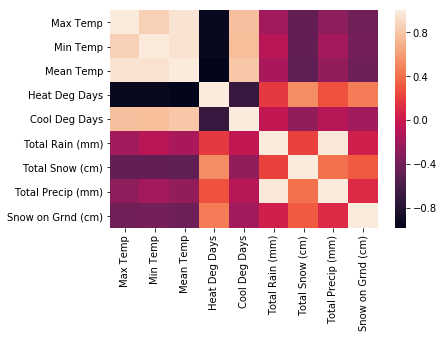

In [132]:
#Checking correlation
climate_all
corr = climate_all.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

print(corr)

# WE see that Heat Deg days is high corr with Max and min temp, and Total precip has high corr with Total Rain. So it means by precip 
# they are recording rain data only and snow is not considered as precip.

#We can drop these columns Heat deg days and Total precip

In [133]:
climate_all.shape

(51, 10)

In [134]:
climate_all.drop(['Heat Deg Days', 'Total Precip (mm)'], axis=1, inplace =True)
climate_all.shape

(51, 8)

# Segregating DF's by sub cat and Creating dummy variables for categorical 

In [135]:
CE_df_Hols['product_analytic_sub_category'].value_counts()

CameraAccessory    212022
GamingAccessory    182220
HomeAudio          106089
Name: product_analytic_sub_category, dtype: int64

In [136]:
# So we can see the row counts above for the 3 sub categories we are analyzing

In [137]:
camera_df = CE_df_Hols.loc[CE_df_Hols['product_analytic_sub_category']=='CameraAccessory']
gaming_df = CE_df_Hols.loc[CE_df_Hols['product_analytic_sub_category']=='GamingAccessory']
homeaudio_df = CE_df_Hols.loc[CE_df_Hols['product_analytic_sub_category']=='HomeAudio']
print('Total rows in Camera Accessory: {}'.format(camera_df.shape[0]))
print('Total rows in Gaming Accessory: {}'.format(gaming_df.shape[0]))
print('Total rows in HomeAudio Accessory: {}'.format(homeaudio_df.shape[0]))

#These are same as value counts we see above

Total rows in Camera Accessory: 212022
Total rows in Gaming Accessory: 182220
Total rows in HomeAudio Accessory: 106089


In [138]:
camera_df.head()

order_date  Year  Month Week     gmv  units  sla  \
0 2015-10-17  2015     10   42  6400.0      1    5   
1 2015-10-19  2015     10   43  6900.0      1    7   
2 2015-10-20  2015     10   43  1990.0      1   10   
3 2015-10-14  2015     10   42  1690.0      1    4   
4 2015-10-17  2015     10   42  1618.0      1    6   

  product_analytic_sub_category product_analytic_vertical  product_mrp  \
0               CameraAccessory              CameraTripod         7190   
1               CameraAccessory              CameraTripod         7190   
2               CameraAccessory              CameraTripod         2099   
3               CameraAccessory              CameraTripod         2099   
4               CameraAccessory              CameraTripod         2099   

   product_procurement_sla  pay_flag  payment_type_code  holiday_flag  \
0                        0         0                  1             1   
1                        0         0                  1             0   
2                        3         0                  1             0   
3                        3         0                  0             0   
4                        3         0                  0             1   

  item_class  Selling_price  %Discount  
0    Premium         6400.0      10.99  
1    Premium         6900.0       4.03  
2     Normal         1990.0       5.19  
3     Normal         1690.0      19.49  
4     Normal         1618.0      22.92

In [139]:
# Putting binaries for premium vs normal products -- remember premium is considered with GMV > 85th %ile
camera_df['item_class'] = camera_df['item_class'].apply(lambda x:1 if x=='Premium' else 0)
gaming_df['item_class'] = gaming_df['item_class'].apply(lambda x:1 if x=='Premium' else 0)
homeaudio_df['item_class'] = homeaudio_df['item_class'].apply(lambda x:1 if x=='Premium' else 0)

camera_df.head()

order_date  Year  Month Week     gmv  units  sla  \
0 2015-10-17  2015     10   42  6400.0      1    5   
1 2015-10-19  2015     10   43  6900.0      1    7   
2 2015-10-20  2015     10   43  1990.0      1   10   
3 2015-10-14  2015     10   42  1690.0      1    4   
4 2015-10-17  2015     10   42  1618.0      1    6   

  product_analytic_sub_category product_analytic_vertical  product_mrp  \
0               CameraAccessory              CameraTripod         7190   
1               CameraAccessory              CameraTripod         7190   
2               CameraAccessory              CameraTripod         2099   
3               CameraAccessory              CameraTripod         2099   
4               CameraAccessory              CameraTripod         2099   

   product_procurement_sla  pay_flag  payment_type_code  holiday_flag  \
0                        0         0                  1             1   
1                        0         0                  1             0   
2                        3         0                  1             0   
3                        3         0                  0             0   
4                        3         0                  0             1   

   item_class  Selling_price  %Discount  
0           1         6400.0      10.99  
1           1         6900.0       4.03  
2           0         1990.0       5.19  
3           0         1690.0      19.49  
4           0         1618.0      22.92

In [140]:
 camera_df.info()
    
    #We will create dummies for product_analytic_vertical  as it may help us identify high selling products

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212022 entries, 0 to 512034
Data columns (total 17 columns):
order_date                       212022 non-null datetime64[ns]
Year                             212022 non-null object
Month                            212022 non-null int64
Week                             212022 non-null object
gmv                              212022 non-null float64
units                            212022 non-null int64
sla                              212022 non-null int64
product_analytic_sub_category    212022 non-null object
product_analytic_vertical        212022 non-null object
product_mrp                      212022 non-null int64
product_procurement_sla          212022 non-null int64
pay_flag                         212022 non-null int32
payment_type_code                212022 non-null int32
holiday_flag                     212022 non-null int32
item_class                       212022 non-null int64
Selling_price                    212022 non-null 

In [141]:
# Dummy variables for verticals for each of the sub-categories - this will give the exact product 
dm1 = pd.get_dummies(camera_df[['product_analytic_vertical']], prefix='product_vertical', drop_first=True)
dm2 = pd.get_dummies(gaming_df[['product_analytic_vertical']], prefix='product_vertical', drop_first=True)
dm3 = pd.get_dummies(homeaudio_df[['product_analytic_vertical']], prefix='product_vertical', drop_first=True)

# Adding the results to the original dataframes
camera_df = pd.concat([camera_df, dm1], axis=1)
gaming_df = pd.concat([gaming_df, dm2], axis=1)
homeaudio_df = pd.concat([homeaudio_df, dm3], axis=1)

In [142]:
camera_df.head()

order_date  Year  Month Week     gmv  units  sla  \
0 2015-10-17  2015     10   42  6400.0      1    5   
1 2015-10-19  2015     10   43  6900.0      1    7   
2 2015-10-20  2015     10   43  1990.0      1   10   
3 2015-10-14  2015     10   42  1690.0      1    4   
4 2015-10-17  2015     10   42  1618.0      1    6   

  product_analytic_sub_category product_analytic_vertical  product_mrp  ...  \
0               CameraAccessory              CameraTripod         7190  ...   
1               CameraAccessory              CameraTripod         7190  ...   
2               CameraAccessory              CameraTripod         2099  ...   
3               CameraAccessory              CameraTripod         2099  ...   
4               CameraAccessory              CameraTripod         2099  ...   

   product_vertical_ExtensionTube  product_vertical_Filter  \
0                               0                        0   
1                               0                        0   
2                               0                        0   
3                               0                        0   
4                               0                        0   

   product_vertical_Flash  product_vertical_FlashShoeAdapter  \
0                       0                                  0   
1                       0                                  0   
2                       0                                  0   
3                       0                                  0   
4                       0                                  0   

   product_vertical_Lens  product_vertical_ReflectorUmbrella  \
0                      0                                   0   
1                      0                                   0   
2                      0                                   0   
3                      0                                   0   
4                      0                                   0   

   product_vertical_Softbox  product_vertical_Strap  \
0                         0                       0   
1                         0                       0   
2                         0                       0   
3                         0                       0   
4                         0                       0   

   product_vertical_Teleconverter  product_vertical_Telescope  
0                               0                           0  
1                               0                           0  
2                               0                           0  
3                               0                           0  
4                               0                           0  

[5 rows x 39 columns]

In [143]:
gaming_df.head()

order_date  Year  Month Week     gmv  units  sla  \
1559 2015-10-04  2015     10   40  3075.0      1    9   
1560 2015-10-14  2015     10   42  2750.0      1    7   
1561 2015-10-15  2015     10   42  2899.0      1    5   
1562 2015-10-17  2015     10   42  2609.0      1    5   
1563 2015-10-26  2015     10   44  2772.0      1    5   

     product_analytic_sub_category product_analytic_vertical  product_mrp  \
1559               GamingAccessory                   GamePad         3999   
1560               GamingAccessory                   GamePad         3999   
1561               GamingAccessory                   GamePad         3999   
1562               GamingAccessory                   GamePad         3999   
1563               GamingAccessory                   GamePad         3999   

      ...  product_vertical_GamingChargingStation  \
1559  ...                                       0   
1560  ...                                       0   
1561  ...                                       0   
1562  ...                                       0   
1563  ...                                       0   

      product_vertical_GamingHeadset  product_vertical_GamingKeyboard  \
1559                               0                                0   
1560                               0                                0   
1561                               0                                0   
1562                               0                                0   
1563                               0                                0   

      product_vertical_GamingMemoryCard  product_vertical_GamingMouse  \
1559                                  0                             0   
1560                                  0                             0   
1561                                  0                             0   
1562                                  0                             0   
1563                                  0                             0   

      product_vertical_GamingMousePad  product_vertical_GamingSpeaker  \
1559                                0                               0   
1560                                0                               0   
1561                                0                               0   
1562                                0                               0   
1563                                0                               0   

      product_vertical_JoystickGamingWheel  product_vertical_MotionController  \
1559                                     0                                  0   
1560                                     0                                  0   
1561                                     0                                  0   
1562                                     0                                  0   
1563                                     0                                  0   

      product_vertical_TVOutCableAccessory  
1559                                     0  
1560                                     0  
1561                                     0  
1562                                     0  
1563                                     0  

[5 rows x 31 columns]

In [144]:
homeaudio_df.head()

order_date  Year  Month Week     gmv  units  sla  \
2466 2015-10-03  2015     10   40  7049.0      1    5   
2467 2015-10-16  2015     10   42  5489.0      1    2   
2468 2015-10-16  2015     10   42  6255.0      1    9   
2469 2015-10-16  2015     10   42  6099.0      1    3   
2470 2015-10-20  2015     10   43  6850.0      1    9   

     product_analytic_sub_category product_analytic_vertical  product_mrp  \
2466                     HomeAudio          HomeAudioSpeaker         7499   
2467                     HomeAudio          HomeAudioSpeaker         7499   
2468                     HomeAudio          HomeAudioSpeaker         7499   
2469                     HomeAudio          HomeAudioSpeaker         7499   
2470                     HomeAudio          HomeAudioSpeaker         7499   

      ...  product_vertical_DJController  product_vertical_Dock  \
2466  ...                              0                      0   
2467  ...                              0                      0   
2468  ...                              0                      0   
2469  ...                              0                      0   
2470  ...                              0                      0   

      product_vertical_DockingStation  product_vertical_FMRadio  \
2466                                0                         0   
2467                                0                         0   
2468                                0                         0   
2469                                0                         0   
2470                                0                         0   

      product_vertical_HiFiSystem  product_vertical_HomeAudioSpeaker  \
2466                            0                                  1   
2467                            0                                  1   
2468                            0                                  1   
2469                            0                                  1   
2470                            0                                  1   

      product_vertical_KaraokePlayer  product_vertical_SlingBox  \
2466                               0                          0   
2467                               0                          0   
2468                               0                          0   
2469                               0                          0   
2470                               0                          0   

      product_vertical_SoundMixer  product_vertical_VoiceRecorder  
2466                            0                               0  
2467                            0                               0  
2468                            0                               0  
2469                            0                               0  
2470                            0                               0  

[5 rows x 27 columns]

In [145]:
# Dropping the vertical column as it has already been encoded
camera_df = camera_df.drop('product_analytic_vertical', axis=1)
gaming_df = gaming_df.drop('product_analytic_vertical', axis=1)
homeaudio_df = homeaudio_df.drop('product_analytic_vertical', axis=1)


In [146]:
# Now that each DF is made out of a specific sub cat, we can remove the sub cat itself from each DF

col = [  'product_analytic_sub_category']

camera_df.drop(col, axis=1, inplace=True)
gaming_df.drop(col, axis=1, inplace=True)
homeaudio_df.drop(col, axis=1, inplace=True)

In [147]:
#Checking if NUlls are present 
print(camera_df.isnull().values.any())

False


In [148]:
print(gaming_df.isnull().values.any())

False


In [149]:
print(homeaudio_df.isnull().values.any())

False


In [150]:
# SO above we verified that all 3 DF's dont have any nulls present 

In [151]:
# NOw we will roll up the dataframes one by one
camera_df.columns


Index(['order_date', 'Year', 'Month', 'Week', 'gmv', 'units', 'sla',
       'product_mrp', 'product_procurement_sla', 'pay_flag',
       'payment_type_code', 'holiday_flag', 'item_class', 'Selling_price',
       '%Discount', 'product_vertical_CameraAccessory',
       'product_vertical_CameraBag', 'product_vertical_CameraBattery',
       'product_vertical_CameraBatteryCharger',
       'product_vertical_CameraBatteryGrip', 'product_vertical_CameraEyeCup',
       'product_vertical_CameraFilmRolls', 'product_vertical_CameraHousing',
       'product_vertical_CameraMicrophone', 'product_vertical_CameraMount',
       'product_vertical_CameraRemoteControl', 'product_vertical_CameraTripod',
       'product_vertical_ExtensionTube', 'product_vertical_Filter',
       'product_vertical_Flash', 'product_vertical_FlashShoeAdapter',
       'product_vertical_Lens', 'product_vertical_ReflectorUmbrella',
       'product_vertical_Softbox', 'product_vertical_Strap',
       'product_vertical_Teleconverter',

In [152]:
camera_df1 = camera_df.groupby(['Week']).agg({  'gmv':"sum",   'sla':"mean",
         'product_procurement_sla':"mean", 'pay_flag':"sum",
       'payment_type_code':"sum", 'holiday_flag':"sum", 'item_class':"sum", 
       '%Discount':"mean", 'product_vertical_CameraAccessory':"sum",
       'product_vertical_CameraBag':"sum", 'product_vertical_CameraBattery':"sum",
       'product_vertical_CameraBatteryCharger':"sum",
       'product_vertical_CameraBatteryGrip':"sum", 'product_vertical_CameraEyeCup':"sum",
       'product_vertical_CameraFilmRolls':"sum", 'product_vertical_CameraHousing':"sum",
        'product_vertical_CameraMicrophone':"sum",'product_vertical_CameraMount':"sum", 
                                              'product_vertical_CameraRemoteControl':"sum",
       'product_vertical_CameraTripod':"sum", 'product_vertical_ExtensionTube':"sum",
       'product_vertical_Filter':"sum", 'product_vertical_Flash':"sum",
       'product_vertical_FlashShoeAdapter':"sum", 'product_vertical_Lens':"sum",
       'product_vertical_ReflectorUmbrella':"sum", 'product_vertical_Softbox':"sum",
       'product_vertical_Strap':"sum", 'product_vertical_Teleconverter':"sum",
       'product_vertical_Telescope':"sum"}).reset_index(drop=False)
camera_df1.shape

(51, 31)

In [153]:
gaming_df.columns

Index(['order_date', 'Year', 'Month', 'Week', 'gmv', 'units', 'sla',
       'product_mrp', 'product_procurement_sla', 'pay_flag',
       'payment_type_code', 'holiday_flag', 'item_class', 'Selling_price',
       '%Discount', 'product_vertical_GameControlMount',
       'product_vertical_GamePad', 'product_vertical_GamingAccessoryKit',
       'product_vertical_GamingAdapter',
       'product_vertical_GamingChargingStation',
       'product_vertical_GamingHeadset', 'product_vertical_GamingKeyboard',
       'product_vertical_GamingMemoryCard', 'product_vertical_GamingMouse',
       'product_vertical_GamingMousePad', 'product_vertical_GamingSpeaker',
       'product_vertical_JoystickGamingWheel',
       'product_vertical_MotionController',
       'product_vertical_TVOutCableAccessory'],
      dtype='object')

In [154]:
gaming_df1 = gaming_df.groupby(['Week']).agg({'gmv':"sum",'sla':"mean",
         'product_procurement_sla':"mean", 'pay_flag':"sum",
       'payment_type_code':"sum", 'holiday_flag':"sum", 'item_class':"sum", 
       '%Discount':"mean", 'product_vertical_GameControlMount':"sum",
       'product_vertical_GamePad':"sum", 'product_vertical_GamingAccessoryKit':"sum",
       'product_vertical_GamingAdapter':"sum",
       'product_vertical_GamingChargingStation':"sum", 
       'product_vertical_GamingHeadset':"sum", 'product_vertical_GamingKeyboard':"sum",
       'product_vertical_GamingMemoryCard':"sum", 'product_vertical_GamingMouse':"sum",
       'product_vertical_GamingMousePad':"sum", 'product_vertical_GamingSpeaker':"sum",
       'product_vertical_JoystickGamingWheel':"sum",
       'product_vertical_MotionController':"sum",
       'product_vertical_TVOutCableAccessory':"sum"}).reset_index(drop=False)
gaming_df1.shape

(52, 23)

In [155]:
homeaudio_df.columns


Index(['order_date', 'Year', 'Month', 'Week', 'gmv', 'units', 'sla',
       'product_mrp', 'product_procurement_sla', 'pay_flag',
       'payment_type_code', 'holiday_flag', 'item_class', 'Selling_price',
       '%Discount', 'product_vertical_DJController', 'product_vertical_Dock',
       'product_vertical_DockingStation', 'product_vertical_FMRadio',
       'product_vertical_HiFiSystem', 'product_vertical_HomeAudioSpeaker',
       'product_vertical_KaraokePlayer', 'product_vertical_SlingBox',
       'product_vertical_SoundMixer', 'product_vertical_VoiceRecorder'],
      dtype='object')

In [156]:
homeaudio_df1 = homeaudio_df.groupby(['Week']).agg({'gmv':"sum",'sla':"mean",
         'product_procurement_sla':"mean", 'pay_flag':"sum",
       'payment_type_code':"sum", 'holiday_flag':"sum", 'item_class':"sum",  
       '%Discount':"mean", 'product_vertical_DJController':"sum", 'product_vertical_Dock':"sum",
       'product_vertical_DockingStation':"sum", 'product_vertical_FMRadio':"sum",
       'product_vertical_HiFiSystem':"sum", 'product_vertical_HomeAudioSpeaker':"sum",
       'product_vertical_KaraokePlayer':"sum", 'product_vertical_SlingBox':"sum",
       'product_vertical_SoundMixer':"sum", 'product_vertical_VoiceRecorder':"sum"}).reset_index(drop=False)
homeaudio_df1.shape

(49, 19)

In [157]:
# Lets check nulls on the new DF's
print('Home: {}'.format(homeaudio_df1.isnull().values.any()))

print('Camera: {}'.format(camera_df1.isnull().values.any()))
print('Gaming: {}'.format(gaming_df1.isnull().values.any()))

# SO there are no nulls 

Home: False
Camera: False
Gaming: False


In [158]:
camera_df1.Week = camera_df1.Week.astype("int")

In [159]:
print(camera_df1.Week.unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28 29 30 31 32 33 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]


In [160]:
gaming_df1.Week = gaming_df1.Week.astype("int")
print(gaming_df1.Week.unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53]


In [161]:
homeaudio_df1.Week = homeaudio_df1.Week.astype("int")
print(homeaudio_df1.Week.unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28 29 30 31 32 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53]


# Merging with other datasets

In [162]:
# MErging with Media investments

In [163]:
#Merging Camera with Media 
camera_df2 = pd.merge(camera_df1, media_investment, how='left', on='Week')

In [164]:
camera_df2.isnull().values.any()
#There are no nulls after merging Cam acc and media inv

False

In [165]:
#MErging Gaming with Media 
gaming_df2 = pd.merge(gaming_df1, media_investment, how='left', on='Week')

In [166]:
gaming_df2.isnull().values.any()

False

In [167]:
#MErging HomeAudio with Media 
homeaudio_df2 = pd.merge(homeaudio_df1, media_investment, how='left', on='Week')
homeaudio_df2.isnull().values.any()

False

In [168]:
# SO NOW we have the 3 datasets suffixed with *_df2

In [169]:
# MERGING with Net Promoter Score dataset
net_promoter_score.Week  = net_promoter_score.Week.astype("int")

In [170]:
# Camera merged with Media Inv now merging with NPS
camera_df2 = pd.merge(camera_df2, net_promoter_score, how='left', on='Week')
 
camera_df2.isnull().values.any()
# SO there are no nulls after NPS merge

False

In [171]:
camera_df2.shape

(51, 56)

In [172]:
# GAming merged with Media Inv now merging with NPS
gaming_df2 = pd.merge(gaming_df2, net_promoter_score, how='left', on='Week')
 
gaming_df2.isnull().values.any()
# SO there are no nulls after NPS merge

False

In [173]:
gaming_df2.shape

(52, 48)

In [174]:
# HomeAudio merged with Media Inv now merging with NPS
homeaudio_df2 = pd.merge(homeaudio_df2, net_promoter_score, how='left', on='Week')
 
homeaudio_df2.isnull().values.any()
# SO there are no nulls after NPS merge

False

In [175]:
homeaudio_df2.shape

(49, 44)

In [176]:
# Merging with CLIMATE after merging with Media Inv and NPS

In [177]:
climate_all.shape
climate_all.Week = climate_all.Week.astype("int")

In [178]:
climate_all.shape

(51, 8)

In [179]:
climate_all.isnull().values.any()
#Climate doesnt have any nulls

False

In [180]:
#MERGING Camera with climate after merger with Media Inv and NPS
camera_df2 = pd.merge(camera_df2, climate_all, how='left', on='Week')
camera_df2.isnull().values.any()

True

In [181]:
camera_df2[camera_df2.isnull().any(axis=1)]
#There is one row having Nulls for Climate, we will drop this later

Week        gmv       sla  product_procurement_sla  pay_flag  \
2    3  6869844.5  6.407326                 2.692614         0   

   payment_type_code  holiday_flag  item_class  %Discount  \
2               3750          2986         590  48.794396   

   product_vertical_CameraAccessory  ...  Month_y     NPS  Stock Index  \
2                                39  ...      Jan  47.093         1052   

   Max Temp  Min Temp  Mean Temp  Cool Deg Days  Total Rain (mm)  \
2       NaN       NaN        NaN            NaN              NaN   

   Total Snow (cm)  Snow on Grnd (cm)  
2              NaN                NaN  

[1 rows x 63 columns]

In [182]:
#MERGING Gaming with climate after merger with Media Inv and NPS
gaming_df2 = pd.merge(gaming_df2, climate_all, how='left', on='Week')
gaming_df2.isnull().values.any()

True

In [183]:
gaming_df2[gaming_df2.isnull().any(axis=1)]
#There is one row having Nulls for Climate, we will drop this later

Week           gmv       sla  product_procurement_sla  pay_flag  \
2    3  4.666510e+06  5.925474                 2.712221         0   

   payment_type_code  holiday_flag  item_class  %Discount  \
2               4230          3012         438  46.197021   

   product_vertical_GameControlMount  ...  Month_y     NPS  Stock Index  \
2                                  0  ...      Jan  47.093         1052   

   Max Temp  Min Temp  Mean Temp  Cool Deg Days  Total Rain (mm)  \
2       NaN       NaN        NaN            NaN              NaN   

   Total Snow (cm)  Snow on Grnd (cm)  
2              NaN                NaN  

[1 rows x 55 columns]

In [184]:
#MERGING Home Audio with climate after merger with Media Inv and NPS
homeaudio_df2 = pd.merge(homeaudio_df2, climate_all, how='left', on='Week')
homeaudio_df2.isnull().values.any()

True

In [185]:
homeaudio_df2[homeaudio_df2.isnull().any(axis=1)]
#There is one row having Nulls for Climate, we will drop this later

Week           gmv       sla  product_procurement_sla  pay_flag  \
2    3  5.492472e+06  5.747674                 2.678682         0   

   payment_type_code  holiday_flag  item_class  %Discount  \
2               2055          1420        1225  41.554174   

   product_vertical_DJController  ...  Month_y     NPS  Stock Index  Max Temp  \
2                              1  ...      Jan  47.093         1052       NaN   

   Min Temp  Mean Temp  Cool Deg Days  Total Rain (mm)  Total Snow (cm)  \
2       NaN        NaN            NaN              NaN              NaN   

  Snow on Grnd (cm)  
2               NaN  

[1 rows x 51 columns]

In [186]:
#Dropping the row containing NULL because of Climate load
cols = climate_all.columns.tolist()

In [187]:
cols

['Week',
 'Max Temp',
 'Min Temp',
 'Mean Temp',
 'Cool Deg Days',
 'Total Rain (mm)',
 'Total Snow (cm)',
 'Snow on Grnd (cm)']

In [188]:
camera_df2.dropna(subset=cols, inplace=True)

In [189]:
camera_df2.dropna(subset=cols, inplace=True)
gaming_df2.dropna(subset=cols, inplace=True)
homeaudio_df2.dropna(subset=cols, inplace=True)

In [190]:
print(homeaudio_df2[homeaudio_df2.isnull().any(axis=1)])
print(camera_df2[camera_df2.isnull().any(axis=1)])
print(gaming_df2[gaming_df2.isnull().any(axis=1)])
#SO no NUll rows are left , we wil proceed with Sale data 

Empty DataFrame
Columns: [Week, gmv, sla, product_procurement_sla, pay_flag, payment_type_code, holiday_flag, item_class, %Discount, product_vertical_DJController, product_vertical_Dock, product_vertical_DockingStation, product_vertical_FMRadio, product_vertical_HiFiSystem, product_vertical_HomeAudioSpeaker, product_vertical_KaraokePlayer, product_vertical_SlingBox, product_vertical_SoundMixer, product_vertical_VoiceRecorder, Year_x, Month_x, Total Investment, TV, Digital, Sponsorship, Content Marketing, Online marketing, Affiliates, SEM, Radio, Other, TV_AS, Digital_AS, Sponsorship_AS, Content_marketing_AS, Online_marketing_AS, Affiliates_AS, SEM_AS, Radio_AS, Other_AS, Year_y, Month_y, NPS, Stock Index, Max Temp, Min Temp, Mean Temp, Cool Deg Days, Total Rain (mm), Total Snow (cm), Snow on Grnd (cm)]
Index: []

[0 rows x 51 columns]
Empty DataFrame
Columns: [Week, gmv, sla, product_procurement_sla, pay_flag, payment_type_code, holiday_flag, item_class, %Discount, product_vertical_Cam

In [191]:
# Merging with Sale Calendar  after merging with Media Inv,CLIMATE and NPS
#Now this is not a comprehensive dataset as it only has data when a Sale window was ON, so we will put 0's 
# for weeks when a sale was not ON

In [192]:
sale_calendar.Week = sale_calendar.Week.astype("int")

In [193]:
#Merging with Camera 
camera_df2 = pd.merge(camera_df2, sale_calendar, how='left', on='Week')
camera_df2.shape

(50, 66)

In [194]:
camera_df2.isnull().values.any()

True

In [195]:
camera_df2['Sale'].fillna(value=0, inplace=True)
del camera_df2['Year']
del camera_df2['Month']

In [196]:
camera_df2.isnull().values.any()

False

In [197]:
#camera_df2.info()

In [198]:
#Putting DF into order of week, weeks start from 28 which is 2015
camera_df2['Week'] = camera_df2['Week'].astype('int64')
camera_df2_1 = camera_df2.loc[camera_df2['Week'] >= 28]
camera_df2_2 = camera_df2.loc[camera_df2['Week'] < 28]
camera_df_final = camera_df2_1.append(camera_df2_2)
camera_df_final.isnull().values.any()

False

In [199]:
#Removing unwanted columns
del camera_df_final['Year_x']
del camera_df_final['Month_x']
del camera_df_final['Year_y']
del camera_df_final['Month_y']

#Selling price is highly correlated with GMV and discount, so dropping
#del camera_df_final['Selling_price']

In [200]:
camera_df_final

Week           gmv        sla  product_procurement_sla  pay_flag  \
25    28  3.800540e+06   7.056293                 2.779132         0   
26    29  4.274721e+06   6.400000                 2.809015       490   
27    30  4.297908e+06   6.414305                 2.868758         0   
28    31  2.738474e+06   6.373408                 2.826796         0   
29    32  6.990000e+02   5.000000                 4.000000         0   
30    33  2.990000e+02   6.000000                 1.000000         1   
31    35  1.190000e+03  10.333333                 2.000000         0   
32    36  3.685251e+06   6.580612                 2.874218       452   
33    37  4.853637e+06   6.426001                 2.959663         0   
34    38  4.612543e+06   6.662532                 2.926845       418   
35    39  4.449472e+06   6.262977                 3.150094         0   
36    40  4.857285e+06   5.676029                 2.597341       421   
37    41  3.916594e+06   6.259674                 2.759514         0   
38    42  1.286212e+07   6.349058                 3.075112      1025   
39    43  4.386854e+06   7.005207                 2.822665         0   
40    44  5.185848e+06   6.541722                 3.022296       498   
41    45  5.835462e+06   6.206940                 2.909908         0   
42    46  4.819836e+06   6.675871                 2.896000       451   
43    47  3.911392e+06   6.151627                 2.864810         0   
44    48  4.951880e+06   6.461685                 2.963268         0   
45    49  5.415138e+06   6.316309                 2.911782       567   
46    50  6.042430e+06   6.001963                 2.746503         0   
47    51  4.911690e+06   6.730630                 2.833838       482   
48    52  6.861917e+06   6.460977                 2.880192         0   
49    53  5.130659e+06   6.168741                 2.817571       561   
0      1  4.960054e+06   5.904449                 2.879497         0   
1      2  4.272703e+06   6.619227                 2.668367       471   
2      4  4.894515e+06   6.705848                 2.637475         0   
3      5  5.248059e+06   6.388484                 2.727613       543   
4      6  4.628308e+06   6.371036                 2.622622         0   
5      7  6.442419e+06   6.319783                 2.718317       590   
6      8  5.295487e+06   6.334044                 2.366756         0   
7      9  4.967494e+06   6.149805                 2.572266       869   
8     10  7.679790e+06   6.093199                 2.574782         0   
9     11  4.464673e+06   6.056332                 2.434686       625   
10    12  4.517840e+06   5.810732                 2.496542         0   
11    13  5.158038e+06   5.691212                 2.469927      1079   
12    14  5.352613e+06   5.970397                 2.423012         0   
13    15  4.286489e+06   5.776650                 2.457314       605   
14    16  2.572208e+06   4.788264                 2.535494         0   
15    17  8.939182e+06   6.397461                 2.576461       709   
16    18  5.623481e+06   5.800844                 2.395612         0   
17    19  5.441651e+06   5.720560                 2.448819       754   
18    20  5.904103e+06   5.499903                 2.516449         0   
19    21  8.050279e+06   5.574830                 2.412647         0   
20    22  4.841758e+06   5.921539                 2.392687       768   
21    23  4.865865e+06   5.753541                 2.373552         0   
22    24  4.937879e+06   5.713068                 2.550481       715   
23    25  3.952347e+06   6.114520                 2.577157         0   
24    26  2.569543e+06   5.619121                 2.614470         0   

    payment_type_code  holiday_flag  item_class  %Discount  \
25               1870             0         355  45.169290   
26               1989           847         383  45.563513   
27               2006             0         357  44.716859   
28               1375             0         231  44.080107   
29                  1

In [201]:
# We shall do the same above steps for Gaming and Home Audio also

In [202]:
#Merging Sale data with Gaming 
gaming_df2 = pd.merge(gaming_df2, sale_calendar, how='left', on='Week')
gaming_df2.shape

(51, 58)

In [203]:
gaming_df2.isnull().values.any()

True

In [204]:
gaming_df2['Sale'].fillna(value=0, inplace=True)
del gaming_df2['Year']
del gaming_df2['Month']

In [205]:
gaming_df2.isnull().values.any()

False

In [206]:
gaming_df2.shape

(51, 56)

In [207]:
#Putting DF into order of week, weeks start from 28 which is 2015
gaming_df2['Week'] = gaming_df2['Week'].astype('int64')
gaming_df2_1 = gaming_df2.loc[gaming_df2['Week'] >= 28]
gaming_df2_2 = gaming_df2.loc[gaming_df2['Week'] < 28]
gaming_df_final = gaming_df2_1.append(gaming_df2_2)
gaming_df_final.isnull().values.any()

False

In [208]:
#Removing unwanted columns
del gaming_df_final['Year_x']
del gaming_df_final['Month_x']
del gaming_df_final['Year_y']
del gaming_df_final['Month_y']

#Selling price is highly correlated with GMV and discount, so dropping
#del gaming_df_final['Selling_price']

In [209]:
gaming_df_final.shape

(51, 52)

In [210]:
gaming_df_final

Week           gmv       sla  product_procurement_sla  pay_flag  \
25    28  2.654733e+06  5.414220                 3.231341         0   
26    29  2.226007e+06  5.298393                 2.726090       309   
27    30  2.541974e+06  5.428693                 2.621541         0   
28    31  1.817588e+06  5.689408                 3.225015         1   
29    32  2.295000e+03  7.250000                 2.250000         0   
30    33  4.875000e+03  6.000000                 2.500000         0   
31    34  5.980000e+02  2.000000                 2.500000         0   
32    35  2.303000e+03  6.000000                 3.250000         0   
33    36  2.114240e+06  5.179156                 2.753138       402   
34    37  2.390242e+06  5.517994                 2.788112         0   
35    38  2.514829e+06  5.831905                 2.849857       293   
36    39  2.482630e+06  5.953010                 2.705631         0   
37    40  2.391309e+06  5.908425                 2.811152       302   
38    41  2.041877e+06  5.541102                 2.598464         0   
39    42  7.191845e+06  5.224589                 3.526417      2085   
40    43  2.259166e+06  6.118984                 2.565745         0   
41    44  2.732359e+06  5.793273                 2.207274       477   
42    45  3.413710e+06  5.142889                 2.424611         0   
43    46  2.593370e+06  6.079324                 2.387171       520   
44    47  2.088544e+06  5.703922                 2.507451         0   
45    48  2.805023e+06  5.849616                 2.607625         0   
46    49  2.946462e+06  6.026773                 2.537952       631   
47    50  3.387068e+06  5.475043                 2.699294         0   
48    51  2.729512e+06  6.434635                 2.585456       425   
49    52  4.246125e+06  5.721274                 2.600142         0   
50    53  3.213408e+06  5.915348                 2.630997       580   
0      1  3.374121e+06  5.871346                 2.680783         0   
1      2  2.997506e+06  5.865424                 2.611284       549   
2      4  2.970992e+06  6.034264                 2.664267         0   
3      5  3.105382e+06  5.902457                 2.549501       530   
4      6  2.954629e+06  5.644516                 2.580781         0   
5      7  3.792274e+06  5.460494                 2.738977       659   
6      8  3.248655e+06  6.009119                 2.516312         0   
7      9  3.511309e+06  5.851233                 2.420012       639   
8     10  4.540184e+06  5.340099                 2.590784         0   
9     11  3.028417e+06  5.765569                 2.576647       562   
10    12  3.165298e+06  5.968378                 2.542893         0   
11    13  3.506912e+06  5.795822                 2.483966       531   
12    14  3.695945e+06  6.065089                 2.541716         0   
13    15  2.988227e+06  5.880391                 2.515162       405   
14    16  1.812021e+06  4.584322                 2.310985         0   
15    17  5.891599e+06  6.366122                 2.389535       526   
16    18  3.533519e+06  5.821814                 2.382019         0   
17    19  3.762916e+06  5.627752                 2.237714       654   
18    20  3.774936e+06  5.596044                 2.147033         0   
19    21  5.153585e+06  5.259721                 2.001467         0   
20    22  4.069570e+06  5.491845                 2.089823       706   
21    23  3.567670e+06  5.620984                 2.163731         0   
22    24  3.365404e+06  5.813172                 2.190411       524   
23    25  3.103070e+06  5.731079                 2.228341         0   
24    26  1.771677e+06  5.010563                 2.263498         0   

    payment_type_code  holiday_flag  item_class  %Discount  \
25               2091             0         214  40.850071   
26               1992           692         235  43.891385   
27               1801             0         340  38.545641   
28               1327             0         378  44.823591   
2

In [211]:
#Merging Sale Data  with HomeAudio 
homeaudio_df2 = pd.merge(homeaudio_df2, sale_calendar, how='left', on='Week')
homeaudio_df2.shape


(48, 54)

In [212]:
homeaudio_df2.isnull().values.any()

True

In [213]:
homeaudio_df2['Sale'].fillna(value=0, inplace=True)
del homeaudio_df2['Year']
del homeaudio_df2['Month']

In [214]:
homeaudio_df2.isnull().values.any()

False

In [215]:
homeaudio_df2.shape

(48, 52)

In [216]:
#Putting DF into order of week, weeks start from 28 which is 2015
homeaudio_df2['Week'] = homeaudio_df2['Week'].astype('int64')
homeaudio_df2_1 = homeaudio_df2.loc[gaming_df2['Week'] >= 28]
homeaudio_df2_2 = homeaudio_df2.loc[gaming_df2['Week'] < 28]
homeaudio_df_final = homeaudio_df2_1.append(homeaudio_df2_2)
homeaudio_df_final.isnull().values.any()

False

In [217]:
#Removing unwanted columns
del homeaudio_df_final['Year_x']
del homeaudio_df_final['Month_x']
del homeaudio_df_final['Year_y']
del homeaudio_df_final['Month_y']

#Selling price is highly correlated with GMV and discount, so dropping
#del homeaudio_df_final['Selling_price']

In [218]:
homeaudio_df_final.isnull().values.any()

False

In [219]:
homeaudio_df_final.shape

(48, 48)

In [220]:
homeaudio_df_final

Week           gmv       sla  product_procurement_sla  pay_flag  \
25    28  4.478808e+06  7.532378                 2.864063         0   
26    29  5.290726e+06  7.078440                 2.759648       333   
27    30  4.537943e+06  7.098214                 2.839286         0   
28    31  3.370335e+06  7.274740                 2.718099         0   
29    32  2.599000e+03  9.000000                 2.000000         0   
30    36  3.747322e+06  5.556620                 2.785352       310   
31    37  4.034604e+06  5.505045                 2.877901         0   
32    38  3.616948e+06  6.195409                 2.684211       237   
33    39  4.134812e+06  6.311985                 2.673833         0   
34    40  4.018951e+06  6.326013                 2.518302       285   
35    41  3.562932e+06  5.953073                 2.594413         0   
36    42  1.918025e+07  5.935811                 2.354814       960   
37    43  5.678860e+06  6.574372                 2.655954         0   
38    44  6.090155e+06  6.518768                 2.517351       356   
39    45  7.317007e+06  5.042437                 2.775083         0   
40    46  5.071659e+06  6.432535                 2.471627       247   
41    47  3.722340e+06  5.915274                 2.654755         0   
42    48  3.808964e+06  6.424030                 2.521013         0   
43    49  4.320875e+06  5.753922                 2.788235       350   
44    50  6.818794e+06  4.963339                 2.971195         0   
45    51  4.812789e+06  5.921967                 2.814163       318   
46    52  6.480650e+06  5.207239                 2.548971         0   
47    53  5.056891e+06  5.882128                 2.477447       331   
0      1  6.997593e+06  4.790342                 2.859413         0   
1      2  4.865571e+06  5.456196                 2.861099       278   
2      4  4.691569e+06  5.678140                 2.676279         0   
3      5  6.900958e+06  4.871771                 2.798992       386   
4      6  4.675811e+06  5.307830                 2.808501         0   
5      7  6.550745e+06  5.064974                 2.608509       300   
6      8  5.220226e+06  5.685407                 2.608929         0   
7      9  4.781039e+06  5.776554                 2.686646       346   
8     10  6.651659e+06  5.277045                 2.674802         0   
9     11  4.630780e+06  5.326755                 2.578247       362   
10    12  3.550259e+06  5.613636                 2.613636         0   
11    13  3.547960e+06  5.405041                 2.699883       252   
12    14  3.356788e+06  5.790727                 2.710526         0   
13    15  2.827283e+06  5.607782                 2.599222       155   
14    16  1.745745e+06  4.595620                 2.760584         0   
15    17  5.842308e+06  5.933666                 2.664765       235   
16    18  3.657196e+06  5.128685                 2.528912         0   
17    19  3.596910e+06  5.050858                 2.609069       243   
18    20  3.253443e+06  5.024005                 2.644719         0   
19    21  3.800323e+06  4.308248                 2.537628         0   
20    22  3.430796e+06  5.003966                 2.636484       209   
21    23  3.535285e+06  5.560099                 2.587980         0   
22    24  3.565467e+06  4.954486                 2.707412       246   
23    25  3.158024e+06  4.188462                 2.540769         0   
24    26  1.529929e+06  3.953101                 2.562784         0   

    payment_type_code  holiday_flag  item_class  %Discount  \
25               1537             0         526  32.473253   
26               1834           652         711  33.796355   
27               1682             0         602  33.850329   
28               1198             0         467  33.528542   
29                  0             0           0  16.130000   
30               1367             0         649  37.917718   
31               1560             0         717  37.900742   
32               1398       

In [221]:
# SO now we have all three datasets merged with media inv, NPS,climate and sale data

In [222]:
media_investmentx = media_investment

In [223]:
media_investmentx = media_investmentx.iloc[:,2:]
media_investmentx

Week Total Investment     TV Digital Sponsorship Content Marketing  \
0    28            4.265  0.054   0.633       1.854                 0   
1    29            4.265  0.054   0.633       1.854                 0   
2    30            4.265  0.054   0.633       1.854                 0   
3    31            4.265  0.054   0.633       1.854                 0   
4    32            1.013  0.001   0.256       0.213                 0   
5    33            1.013  0.001   0.256       0.213                 0   
6    34            1.013  0.001   0.256       0.213                 0   
7    35            1.013  0.001   0.256       0.213                 0   
8    36            1.013  0.001   0.256       0.213                 0   
9    37           24.064   0.97   0.339      15.697             0.153   
10   38           24.064   0.97   0.339      15.697             0.153   
11   39           24.064   0.97   0.339      15.697             0.153   
12   40           24.064   0.97   0.339      15.697             0.153   
13   41           42.539  1.536   3.156      21.168             0.861   
14   42           42.539  1.536   3.156      21.168             0.861   
15   43           42.539  1.536   3.156      21.168             0.861   
16   44           42.539  1.536   3.156      21.168             0.861   
17   45           10.243  0.844   0.255       2.834             0.034   
18   46           10.243  0.844   0.255       2.834             0.034   
19   47           10.243  0.844   0.255       2.834             0.034   
20   48           10.243  0.844   0.255       2.834             0.034   
21   49           10.243  0.844   0.255       2.834             0.034   
22   50           26.686  1.349   0.766      14.176             0.267   
23   51           26.686  1.349   0.766      14.176             0.267   
24   52           26.686  1.349   0.766      14.176             0.267   
25   53           26.686  1.349   0.766      14.176             0.267   
26    1           18.549  1.095   0.114        1.05             0.225   
27    2           18.549  1.095   0.114        1.05             0.225   
28    3           18.549  1.095   0.114        1.05             0.225   
29    4           18.549  1.095   0.114        1.05             0.225   
30    5             9.61  0.517   0.383       2.345             0.119   
31    6             9.61  0.517   0.383       2.345             0.119   
32    7             9.61  0.517   0.383       2.345             0.119   
33    8             9.61  0.517   0.383       2.345             0.119   
34    9             9.61  0.517   0.383       2.345             0.119   
35   10           25.006  2.325   0.525      10.397             0.093   
36   11           25.006  2.325   0.525      10.397             0.093   
37   12           25.006  2.325   0.525      10.397             0.093   
38   13           25.006  2.325   0.525      10.397             0.093   
39   14           14.212  1.301   0.218       6.077             0.009   
40   15           14.212  1.301   0.218       6.077             0.009   
41   16           14.212  1.301   0.218       6.077             0.009   
42   17           14.212  1.301   0.218       6.077             0.009   
43   18           15.611  0.274   0.154       6.336             0.158   
44   19           15.611  0.274   0.154       6.336             0.158   
45   20           15.611  0.274   0.154       6.336             0.158   
46   21           15.611  0.274   0.154       6.336             0.158   
47   22           15.611  0.274   0.154       6.336             0.158   
48   23           10.709  0.416   0.355       6.262             0.011   
49   24           10.709  0.416   0.355       6.262             0.011   
50   25           10.709  0.416   0.355       6.262             0.011   
51   26           10.709  0.416   0.355       6.262             0.011   

   Online marketing Affiliates    SEM  Radio  Other   TV_AS  Digital_AS  \
0             0.332      0.137  1.256      0      0  0.054

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


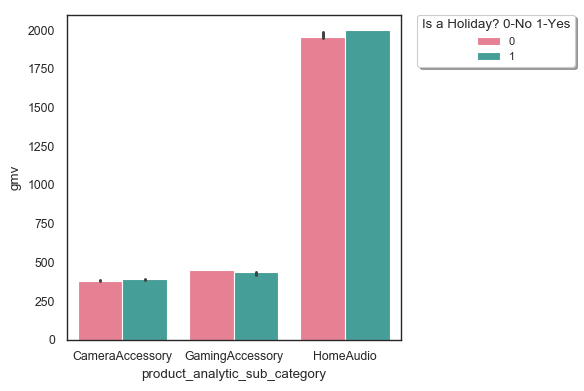

In [225]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(6,4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("white") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster

sns.barplot(y='gmv', x='product_analytic_sub_category', hue ='holiday_flag', 
            palette='husl', data=CE_df_Hols, estimator=np.median)

# plot legend
plt.legend(frameon=True, fontsize='small', shadow='True', title='Is a Holiday? 0-No 1-Yes', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

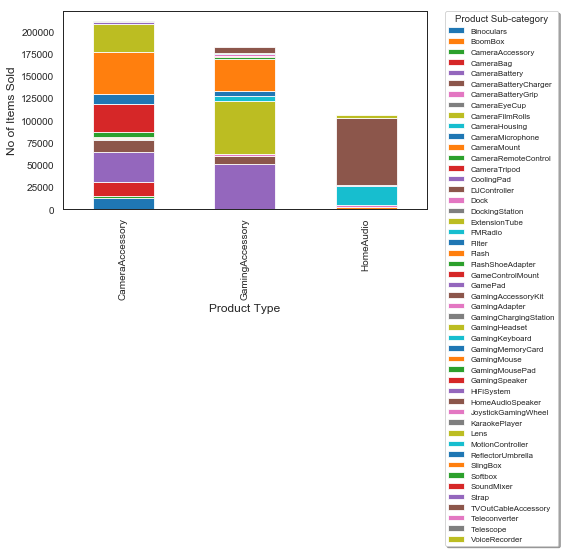

In [226]:
CE_df_Hols.groupby(["product_analytic_sub_category", "product_analytic_vertical" ]).size().unstack().plot(kind='bar',  stacked=True, figsize=(8,6), fontsize = 10) 
# plot x axis label
plt.xlabel('Product Type', fontsize = 12)
# plot y axis label
plt.ylabel('No of Items Sold', fontsize = 12)
# plot legend
plt.legend(frameon=True, fontsize='small', shadow='True', title='Product Sub-category', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

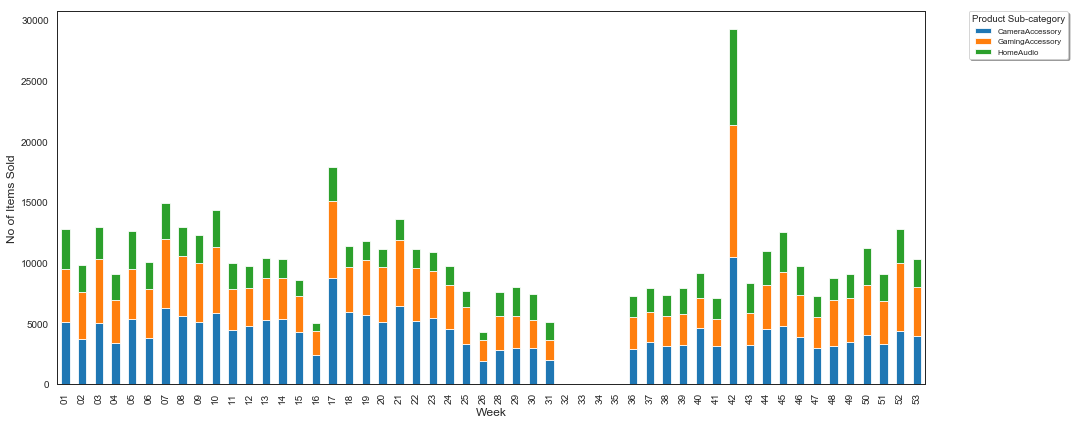

In [227]:
CE_df_Hols.groupby(["Week", "product_analytic_sub_category"]).size().unstack().plot(kind='bar', \
                                                                                             stacked=True, figsize=(15,6), \
                                                                                           fontsize = 10) 
# plot x axis label
plt.xlabel('Week', fontsize = 12)
# plot y axis label
plt.ylabel('No of Items Sold', fontsize = 12)
# plot legend
plt.legend(frameon=True, fontsize='small', shadow='True', title='Product Sub-category', \
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

In [228]:

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) 
pd.set_option('display.precision',1)

# Modelling 1 

In [ ]:
# LINEAR model - BASIC

In [229]:
# making a copy of original dataframes for LR
camera_LR= camera_df_final.copy()
gaming_LR = gaming_df_final.copy()
homeaudio_LR = homeaudio_df_final.copy()
homeaudio_LR.head()

Week         gmv   sla  product_procurement_sla  pay_flag  \
25    28 4478808.133 7.532                    2.864         0   
26    29 5290726.000 7.078                    2.760       333   
27    30 4537943.000 7.098                    2.839         0   
28    31 3370335.000 7.275                    2.718         0   
29    32    2599.000 9.000                    2.000         0   

    payment_type_code  holiday_flag  item_class  %Discount  \
25               1537             0         526     32.473   
26               1834           652         711     33.796   
27               1682             0         602     33.850   
28               1198             0         467     33.529   
29                  0             0           0     16.130   

    product_vertical_DJController  ...    NPS  Stock Index  Max Temp  \
25                              8  ... 54.600     1177.000    28.000   
26                              7  ... 54.600     1177.000    33.000   
27                              4  ... 54.600     1177.000    31.500   
28                              2  ... 54.600     1177.000    33.500   
29                              0  ... 59.987     1206.000    28.500   

    Min Temp  Mean Temp  Cool Deg Days  Total Rain (mm)  Total Snow (cm)  \
25    12.500     20.100          2.383            4.417            0.000   
26    11.000     23.183          5.183            1.400            0.000   
27    14.500     23.060          5.060            1.080            0.000   
28    16.000     24.567          6.567            4.633            0.000   
29    15.000     21.650          3.650            0.350            0.000   

    Snow on Grnd (cm) Sale  
25              0.000    0  
26              0.000    2  
27              0.000    0  
28              0.000    0  
29              0.000    0  

[5 rows x 48 columns]

In [230]:
#Week is not needed 
camera_LR= camera_LR.drop('Week', axis=1)
homeaudio_LR= homeaudio_LR.drop('Week', axis=1)
gaming_LR= gaming_LR.drop('Week', axis=1)

In [231]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

camera_LR[camera_LR.columns]=scaler.fit_transform(camera_LR[camera_LR.columns])
gaming_LR[gaming_LR.columns]=scaler.fit_transform(gaming_LR[gaming_LR.columns])
homeaudio_LR[homeaudio_LR.columns]=scaler.fit_transform(homeaudio_LR[homeaudio_LR.columns])

camera_LR.head()

gmv    sla  product_procurement_sla  pay_flag  payment_type_code  \
25 -0.511  1.122                    0.278    -0.793             -0.684   
26 -0.277  0.228                    0.357     0.691             -0.603   
27 -0.265  0.248                    0.516    -0.793             -0.592   
28 -1.037  0.192                    0.404    -0.793             -1.017   
29 -2.393 -1.677                    3.526    -0.793             -1.943   

    holiday_flag  item_class  %Discount  product_vertical_CameraAccessory  \
25        -0.405      -0.127     -0.806                             0.599   
26         0.188       0.029     -0.745                            -0.325   
27        -0.405      -0.116     -0.876                             0.599   
28        -0.405      -0.818     -0.975                             0.445   
29        -0.405      -2.106      0.222                            -2.633   

    product_vertical_CameraBag  ...   NPS  Stock Index  Max Temp  Min Temp  \
25                       0.154  ... 1.241        0.139     0.738     1.052   
26                       0.291  ... 1.241        0.139     1.270     0.883   
27                      -0.149  ... 1.241        0.139     1.110     1.277   
28                      -0.897  ... 1.241        0.139     1.323     1.446   
29                      -2.222  ... 2.562        0.507     0.791     1.333   

    Mean Temp  Cool Deg Days  Total Rain (mm)  Total Snow (cm)  \
25      0.904          0.393            0.452           -0.360   
26      1.256          1.652           -0.413           -0.360   
27      1.242          1.596           -0.505           -0.360   
28      1.414          2.274            0.514           -0.360   
29      1.081          0.962           -0.714           -0.360   

    Snow on Grnd (cm)   Sale  
25             -0.269 -0.478  
26             -0.269  0.815  
27             -0.269 -0.478  
28             -0.269 -0.478  
29             -0.269 -0.478  

[5 rows x 59 columns]

In [232]:
#TEST -TRAIN SPLIT

In [233]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

camera_LR_train, camera_LR_test = train_test_split(camera_LR,train_size = 0.7, test_size = 0.3, random_state = 42)

gaming_LR_train, gaming_LR_test = train_test_split(gaming_LR, train_size = 0.7, test_size = 0.3, random_state = 42)

homeaudio_LR_train, homeaudio_LR_test = train_test_split(homeaudio_LR,  train_size = 0.7, test_size = 0.3, random_state = 42)

In [ ]:
#TRAIN 
y_camera_LR_train = camera_LR_train.pop('gmv')
X_camera_LR_train = camera_LR_train

y_gaming_LR_train = gaming_LR_train.pop('gmv')
X_gaming_LR_train= gaming_LR_train

y_homeaudio_LR_train = homeaudio_LR_train.pop('gmv')
X_homeaudio_LR_train = homeaudio_LR_train

 

In [236]:
#TEST
y_camera_LR_test = camera_LR_test.pop('gmv')
X_camera_LR_test = camera_LR_test

y_gaming_LR_test = gaming_LR_test.pop('gmv')
X_gaming_LR_test = gaming_LR_test

y_homeaudio_LR_test = homeaudio_LR_test.pop('gmv')
X_homeaudio_LR_test = homeaudio_LR_test

In [237]:
# LR - CAMERA

In [238]:
# CAMERA  - R2 and MSE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

camera_LR_model = LinearRegression().fit(X_camera_LR_train, y_camera_LR_train)
y_camera_test_pred = camera_LR_model.predict(X_camera_LR_test)

print('R2 Score: {}'.format(r2_score(y_camera_LR_test, y_camera_test_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_camera_LR_test, y_camera_test_pred)))

R2 Score: 0.9021252712633485
Mean Squared Error: 0.1633560794543393


In [239]:
camera_lr_model_parameters = list(camera_LR_model.coef_)
camera_lr_model_parameters.insert(0, camera_LR_model.intercept_)
camera_lr_model_parameters = [round(x, 3) for x in camera_lr_model_parameters]
cols = X_camera_LR_test.columns
cols = cols.insert(0, "constant")
camera_lr_coef = list(zip(cols, camera_lr_model_parameters))
camera_lr_coef

[('constant', 0.022),
 ('sla', 0.07),
 ('product_procurement_sla', -0.025),
 ('pay_flag', 0.013),
 ('payment_type_code', 0.117),
 ('holiday_flag', -0.095),
 ('item_class', 0.4),
 ('%Discount', 0.024),
 ('product_vertical_CameraAccessory', 0.012),
 ('product_vertical_CameraBag', -0.038),
 ('product_vertical_CameraBattery', 0.134),
 ('product_vertical_CameraBatteryCharger', 0.151),
 ('product_vertical_CameraBatteryGrip', 0.041),
 ('product_vertical_CameraEyeCup', -0.1),
 ('product_vertical_CameraFilmRolls', 0.115),
 ('product_vertical_CameraHousing', -0.028),
 ('product_vertical_CameraMicrophone', -0.018),
 ('product_vertical_CameraMount', 0.039),
 ('product_vertical_CameraRemoteControl', 0.017),
 ('product_vertical_CameraTripod', 0.026),
 ('product_vertical_ExtensionTube', 0.013),
 ('product_vertical_Filter', 0.156),
 ('product_vertical_Flash', -0.038),
 ('product_vertical_FlashShoeAdapter', -0.0),
 ('product_vertical_Lens', 0.312),
 ('product_vertical_ReflectorUmbrella', -0.007),
 ('pr

In [240]:
# CAMERA - coefficients sorted by values 
camera_lr_coef_df = pd.DataFrame(camera_lr_coef)
col_rename = {0:'Features',1: 'Coefficients'}
camera_lr_coef_df = camera_lr_coef_df.rename(columns=col_rename)
camera_lr_coef_df = camera_lr_coef_df.iloc[1:,:]
camera_lr_coef_df = camera_lr_coef_df.loc[camera_lr_coef_df['Coefficients']!=0.0]
camera_lr_coef_df = camera_lr_coef_df.sort_values(by=['Coefficients'], ascending = False)
camera_lr_coef_df

Features  Coefficients
6                              item_class         0.400
24                  product_vertical_Lens         0.312
54                          Cool Deg Days         0.160
21                product_vertical_Filter         0.156
11  product_vertical_CameraBatteryCharger         0.151
10         product_vertical_CameraBattery         0.134
4                       payment_type_code         0.117
14       product_vertical_CameraFilmRolls         0.115
35                       Online marketing         0.091
36                             Affiliates         0.084
1                                     sla         0.070
58                                   Sale         0.054
53                              Mean Temp         0.053
31                                     TV         0.044
12     product_vertical_CameraBatteryGrip         0.041
17           product_vertical_CameraMount         0.039
45                          Affiliates_AS         0.038
27                 product_vertical_Strap         0.034
44                    Online_marketing_AS         0.033
41                             Digital_AS         0.030
46                                 SEM_AS         0.027
19          product_vertical_CameraTripod         0.026
26               product_vertical_Softbox         0.025
7                               %Discount         0.024
18   product_vertical_CameraRemoteControl         0.017
20         product_vertical_ExtensionTube         0.013
3                                pay_flag         0.013
8        product_vertical_CameraAccessory         0.012
52                               Min Temp         0.009
38                                  Radio         0.009
34                      Content Marketing        -0.001
57                      Snow on Grnd (cm)        -0.004
55                        Total Rain (mm)        -0.006
25     product_vertical_ReflectorUmbrella        -0.007
28         product_vertical_Teleconverter        -0.011
16      product_vertical_CameraMicrophone        -0.018
30                       Total Investment        -0.020
50                            Stock Index        -0.021
37                                    SEM        -0.022
2                 product_procurement_sla        -0.025
15         product_vertical_CameraHousing        -0.028
56                        Total Snow (cm)        -0.032
49                                    NPS        -0.034
9              product_vertical_CameraBag        -0.038
22                 product_vertical_Flash        -0.038
43                   Content_marketing_AS        -0.040
51                               Max Temp        -0.047
32                                Digital        -0.059
33                            Sponsorship        -0.060
48                               Other_AS        -0.061
29             product_vertical_Telescope        -0.063
47                               Radio_AS        -0.067
42                         Sponsorship_AS        -0.071
5                            holiday_flag        -0.095
13          product_vertical_CameraEyeCup        -0.100

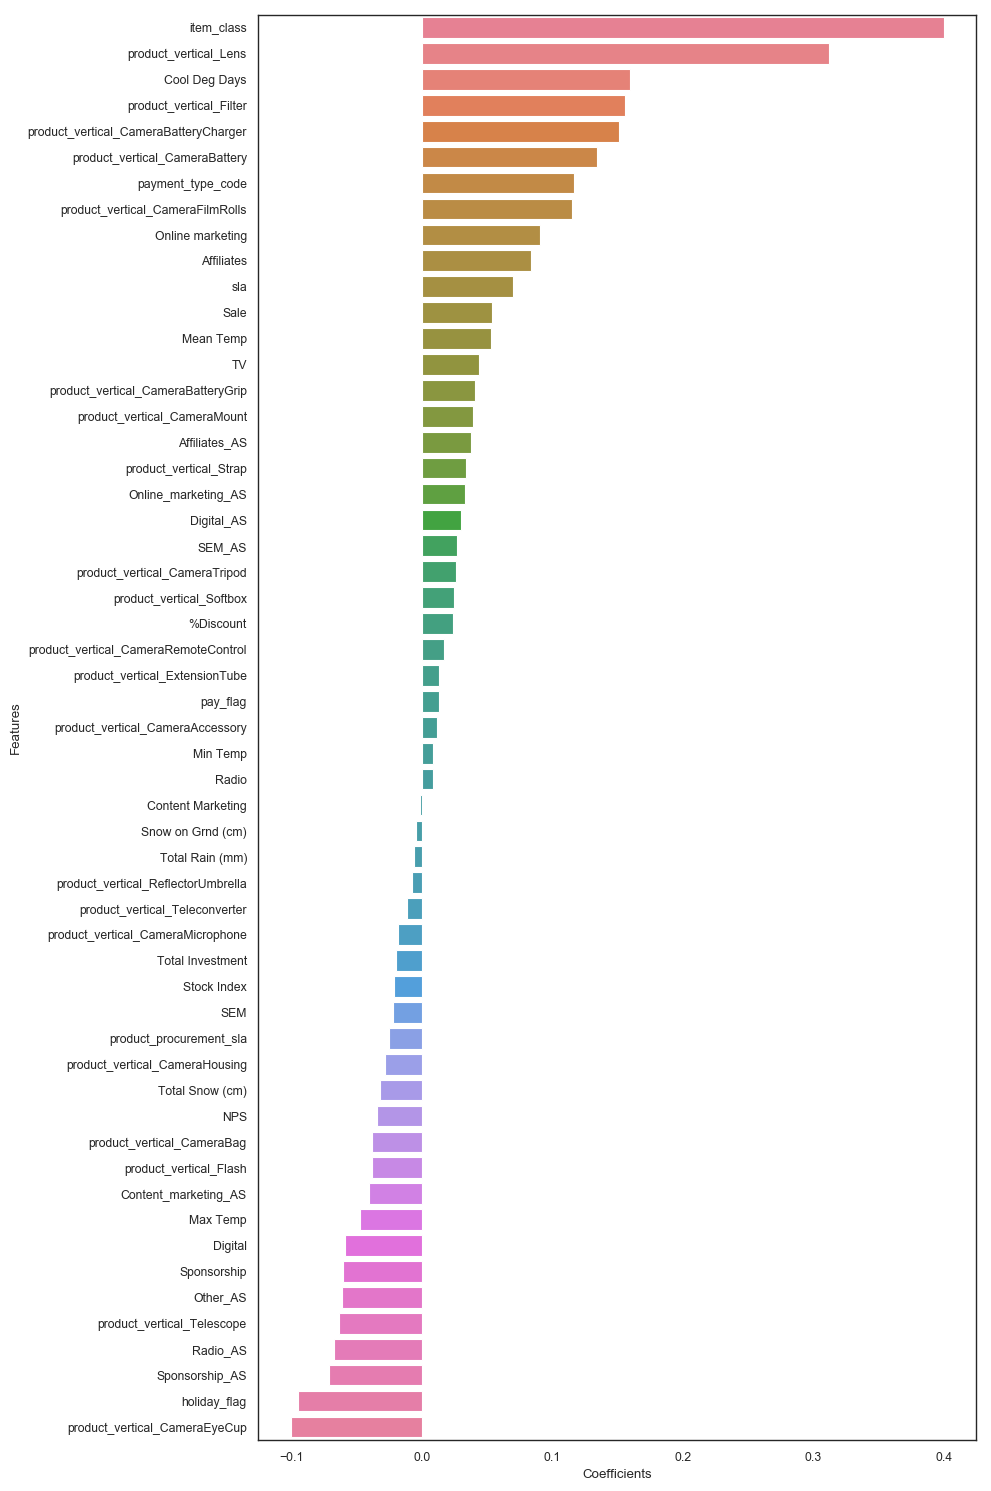

In [241]:
# Camera - significatnt features PLOT
plt.figure(figsize=(10, 15), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.barplot(y='Features', x='Coefficients', palette='husl', data=camera_lr_coef_df, estimator=np.sum)
plt.tight_layout()
plt.show()

In [ ]:
# GAMING - LR

In [242]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

gaming_model = LinearRegression().fit(X_gaming_LR_train, y_gaming_LR_train )
y_gaming_test_pred = gaming_model.predict(X_gaming_LR_test )

print('R2 Score: {}'.format(r2_score(y_gaming_LR_test , y_gaming_test_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_gaming_LR_test , y_gaming_test_pred)))

R2 Score: 0.6975731224994024
Mean Squared Error: 0.28587439418977995


In [243]:
gaming_lr_model_parameters = list(gaming_model.coef_)
gaming_lr_model_parameters.insert(0, gaming_model.intercept_)
gaming_lr_model_parameters = [round(x, 3) for x in gaming_lr_model_parameters]
cols = X_gaming_LR_test.columns
cols = cols.insert(0, "constant")
gaming_lr_coef = list(zip(cols, gaming_lr_model_parameters))
gaming_lr_coef

[('constant', -0.068),
 ('sla', -0.072),
 ('product_procurement_sla', 0.049),
 ('pay_flag', 0.149),
 ('payment_type_code', -0.263),
 ('holiday_flag', 0.04),
 ('item_class', 0.058),
 ('%Discount', -0.256),
 ('product_vertical_GameControlMount', -0.013),
 ('product_vertical_GamePad', 0.38),
 ('product_vertical_GamingAccessoryKit', 0.035),
 ('product_vertical_GamingAdapter', -0.26),
 ('product_vertical_GamingChargingStation', 0.056),
 ('product_vertical_GamingHeadset', 0.335),
 ('product_vertical_GamingKeyboard', -0.042),
 ('product_vertical_GamingMemoryCard', -0.231),
 ('product_vertical_GamingMouse', 0.146),
 ('product_vertical_GamingMousePad', 0.219),
 ('product_vertical_GamingSpeaker', 0.291),
 ('product_vertical_JoystickGamingWheel', 0.046),
 ('product_vertical_MotionController', 0.349),
 ('product_vertical_TVOutCableAccessory', -0.083),
 ('Total Investment', 0.06),
 ('TV', 0.015),
 ('Digital', 0.097),
 ('Sponsorship', 0.082),
 ('Content Marketing', 0.03),
 ('Online marketing', 0.007

In [244]:
gaming_lr_coef_df = pd.DataFrame(gaming_lr_coef)
col_rename = {0:'Features',1: 'Coefficients'}
gaming_lr_coef_df = gaming_lr_coef_df.rename(columns=col_rename)
gaming_lr_coef_df = gaming_lr_coef_df.iloc[1:,:]
gaming_lr_coef_df = gaming_lr_coef_df.loc[gaming_lr_coef_df['Coefficients']!=0.0]
gaming_lr_coef_df = gaming_lr_coef_df.sort_values(by=['Coefficients'], ascending = False)
gaming_lr_coef_df

Features  Coefficients
9                 product_vertical_GamePad         0.380
20       product_vertical_MotionController         0.349
13          product_vertical_GamingHeadset         0.335
18          product_vertical_GamingSpeaker         0.291
17         product_vertical_GamingMousePad         0.219
31                                   Other         0.200
3                                 pay_flag         0.149
16            product_vertical_GamingMouse         0.146
33                              Digital_AS         0.105
24                                 Digital         0.097
25                             Sponsorship         0.082
47                         Total Rain (mm)         0.073
22                        Total Investment         0.060
6                               item_class         0.058
12  product_vertical_GamingChargingStation         0.056
35                    Content_marketing_AS         0.050
2                  product_procurement_sla         0.049
19    product_vertical_JoystickGamingWheel         0.046
5                             holiday_flag         0.040
10     product_vertical_GamingAccessoryKit         0.035
26                       Content Marketing         0.030
42                             Stock Index         0.028
40                                Other_AS         0.021
49                       Snow on Grnd (cm)         0.021
23                                      TV         0.015
44                                Min Temp         0.015
27                        Online marketing         0.007
28                              Affiliates        -0.008
8        product_vertical_GameControlMount        -0.013
14         product_vertical_GamingKeyboard        -0.042
48                         Total Snow (cm)        -0.043
36                     Online_marketing_AS        -0.049
37                           Affiliates_AS        -0.055
30                                   Radio        -0.060
34                          Sponsorship_AS        -0.061
43                                Max Temp        -0.063
50                                    Sale        -0.068
1                                      sla        -0.072
21    product_vertical_TVOutCableAccessory        -0.083
38                                  SEM_AS        -0.131
45                               Mean Temp        -0.140
39                                Radio_AS        -0.147
32                                   TV_AS        -0.155
29                                     SEM        -0.158
46                           Cool Deg Days        -0.212
15       product_vertical_GamingMemoryCard        -0.231
41                                     NPS        -0.245
7                                %Discount        -0.256
11          product_vertical_GamingAdapter        -0.260
4                        payment_type_code        -0.263

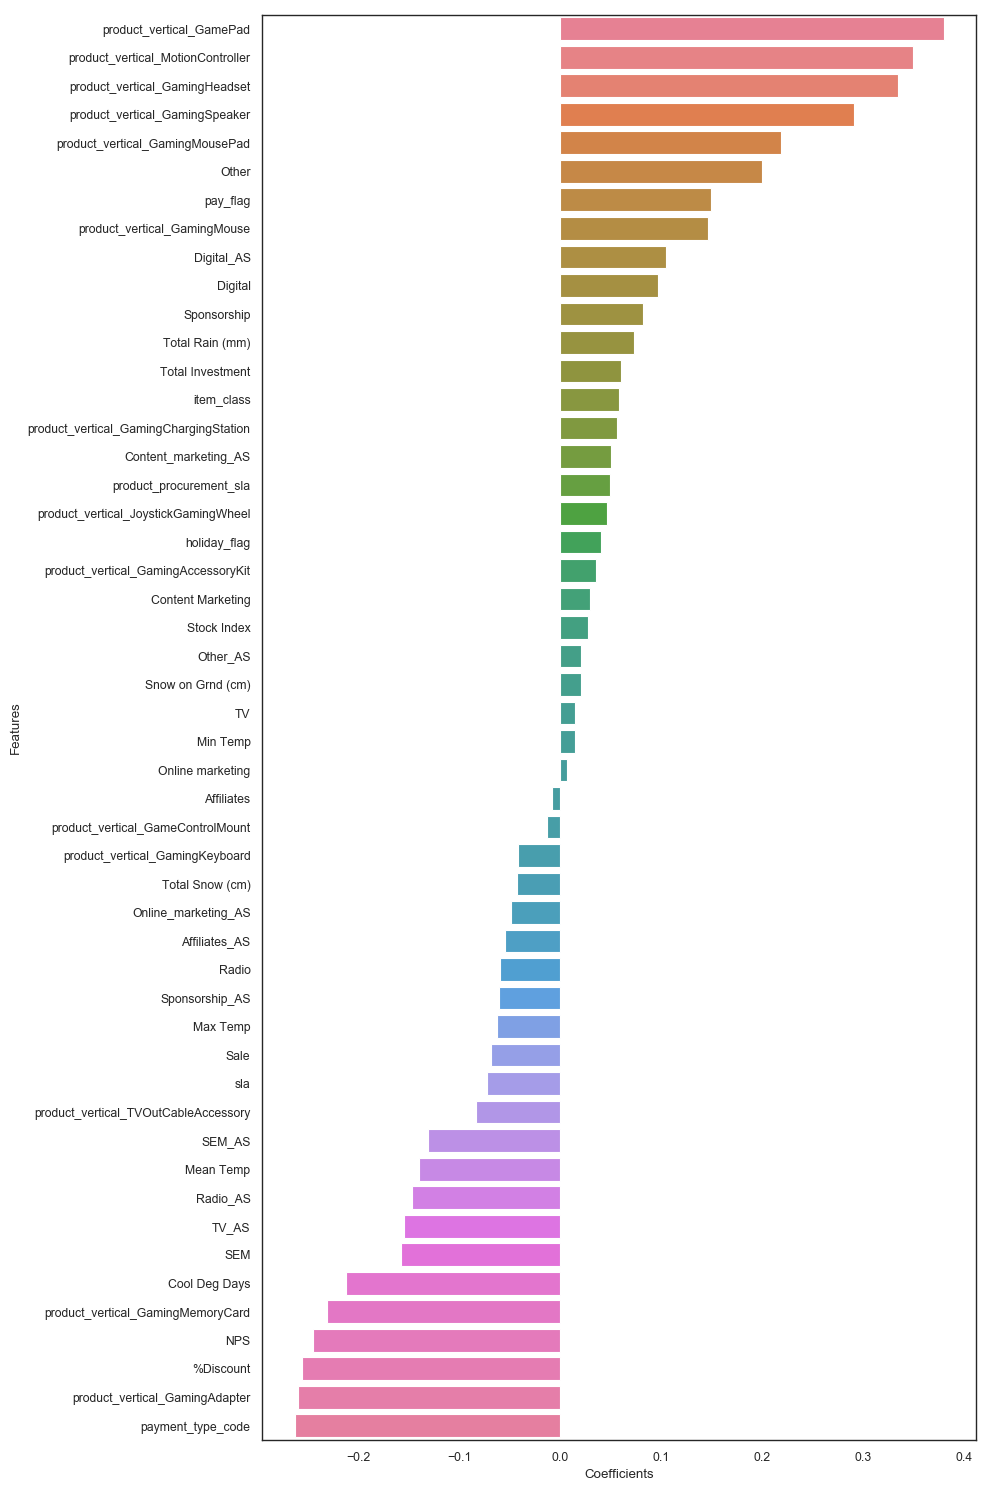

In [245]:
# Features importance plot
plt.figure(figsize=(10, 15), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.barplot(y='Features', x='Coefficients', palette='husl', data=gaming_lr_coef_df, estimator=np.sum)
plt.tight_layout()
plt.show()

In [ ]:
# LR for HOME AUDIO

In [246]:
homeaudio_model = LinearRegression().fit(X_homeaudio_LR_train , y_homeaudio_LR_train )
y_homeaudio_test_pred = homeaudio_model.predict(X_homeaudio_LR_test )

print('R2 Score: {}'.format(r2_score(y_homeaudio_LR_test , y_homeaudio_test_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_homeaudio_LR_test , y_homeaudio_test_pred)))

R2 Score: 0.5734599043132949
Mean Squared Error: 0.18618835100659073


In [247]:
# linear regression model parameters - homeaudio
homeaudio_lr_model_parameters = list(homeaudio_model.coef_)
homeaudio_lr_model_parameters.insert(0, homeaudio_model.intercept_)
homeaudio_lr_model_parameters = [round(x, 3) for x in homeaudio_lr_model_parameters]
cols = homeaudio_LR_test.columns
cols = cols.insert(0, "constant")
homeaudio_lr_coef = list(zip(cols, homeaudio_lr_model_parameters))
homeaudio_lr_coef

[('constant', -0.001),
 ('sla', 0.195),
 ('product_procurement_sla', 0.126),
 ('pay_flag', 0.084),
 ('payment_type_code', 0.107),
 ('holiday_flag', -0.009),
 ('item_class', 0.419),
 ('%Discount', -0.023),
 ('product_vertical_DJController', -0.121),
 ('product_vertical_Dock', -0.176),
 ('product_vertical_DockingStation', -0.006),
 ('product_vertical_FMRadio', -0.083),
 ('product_vertical_HiFiSystem', 0.057),
 ('product_vertical_HomeAudioSpeaker', 0.452),
 ('product_vertical_KaraokePlayer', 0.263),
 ('product_vertical_SlingBox', 0.008),
 ('product_vertical_SoundMixer', -0.045),
 ('product_vertical_VoiceRecorder', 0.092),
 ('Total Investment', 0.119),
 ('TV', -0.054),
 ('Digital', -0.178),
 ('Sponsorship', 0.189),
 ('Content Marketing', 0.179),
 ('Online marketing', 0.213),
 ('Affiliates', 0.096),
 ('SEM', -0.077),
 ('Radio', 0.029),
 ('Other', -0.024),
 ('TV_AS', 0.0),
 ('Digital_AS', 0.213),
 ('Sponsorship_AS', -0.107),
 ('Content_marketing_AS', -0.348),
 ('Online_marketing_AS', -0.13),

In [248]:
homeaudio_lr_coef_df = pd.DataFrame(homeaudio_lr_coef)
col_rename = {0:'Features',1: 'Coefficients'}
homeaudio_lr_coef_df = homeaudio_lr_coef_df.rename(columns=col_rename)
homeaudio_lr_coef_df = homeaudio_lr_coef_df.iloc[1:,:]
homeaudio_lr_coef_df = homeaudio_lr_coef_df.loc[homeaudio_lr_coef_df['Coefficients']!=0.0]
homeaudio_lr_coef_df = homeaudio_lr_coef_df.sort_values(by=['Coefficients'], ascending = False)
homeaudio_lr_coef_df

Features  Coefficients
13  product_vertical_HomeAudioSpeaker         0.452
6                          item_class         0.419
14     product_vertical_KaraokePlayer         0.263
41                          Mean Temp         0.259
23                   Online marketing         0.213
29                         Digital_AS         0.213
1                                 sla         0.195
21                        Sponsorship         0.189
22                  Content Marketing         0.179
38                        Stock Index         0.131
2             product_procurement_sla         0.126
18                   Total Investment         0.119
4                   payment_type_code         0.107
24                         Affiliates         0.096
17     product_vertical_VoiceRecorder         0.092
3                            pay_flag         0.084
44                    Total Snow (cm)         0.079
36                           Other_AS         0.067
37                                NPS         0.060
12        product_vertical_HiFiSystem         0.057
46                               Sale         0.055
34                             SEM_AS         0.035
26                              Radio         0.029
40                           Min Temp         0.023
15          product_vertical_SlingBox         0.008
10    product_vertical_DockingStation        -0.006
43                    Total Rain (mm)        -0.008
5                        holiday_flag        -0.009
7                           %Discount        -0.023
27                              Other        -0.024
16        product_vertical_SoundMixer        -0.045
33                      Affiliates_AS        -0.049
42                      Cool Deg Days        -0.052
19                                 TV        -0.054
25                                SEM        -0.077
11           product_vertical_FMRadio        -0.083
35                           Radio_AS        -0.102
30                     Sponsorship_AS        -0.107
39                           Max Temp        -0.107
45                  Snow on Grnd (cm)        -0.107
8       product_vertical_DJController        -0.121
32                Online_marketing_AS        -0.130
9               product_vertical_Dock        -0.176
20                            Digital        -0.178
31               Content_marketing_AS        -0.348

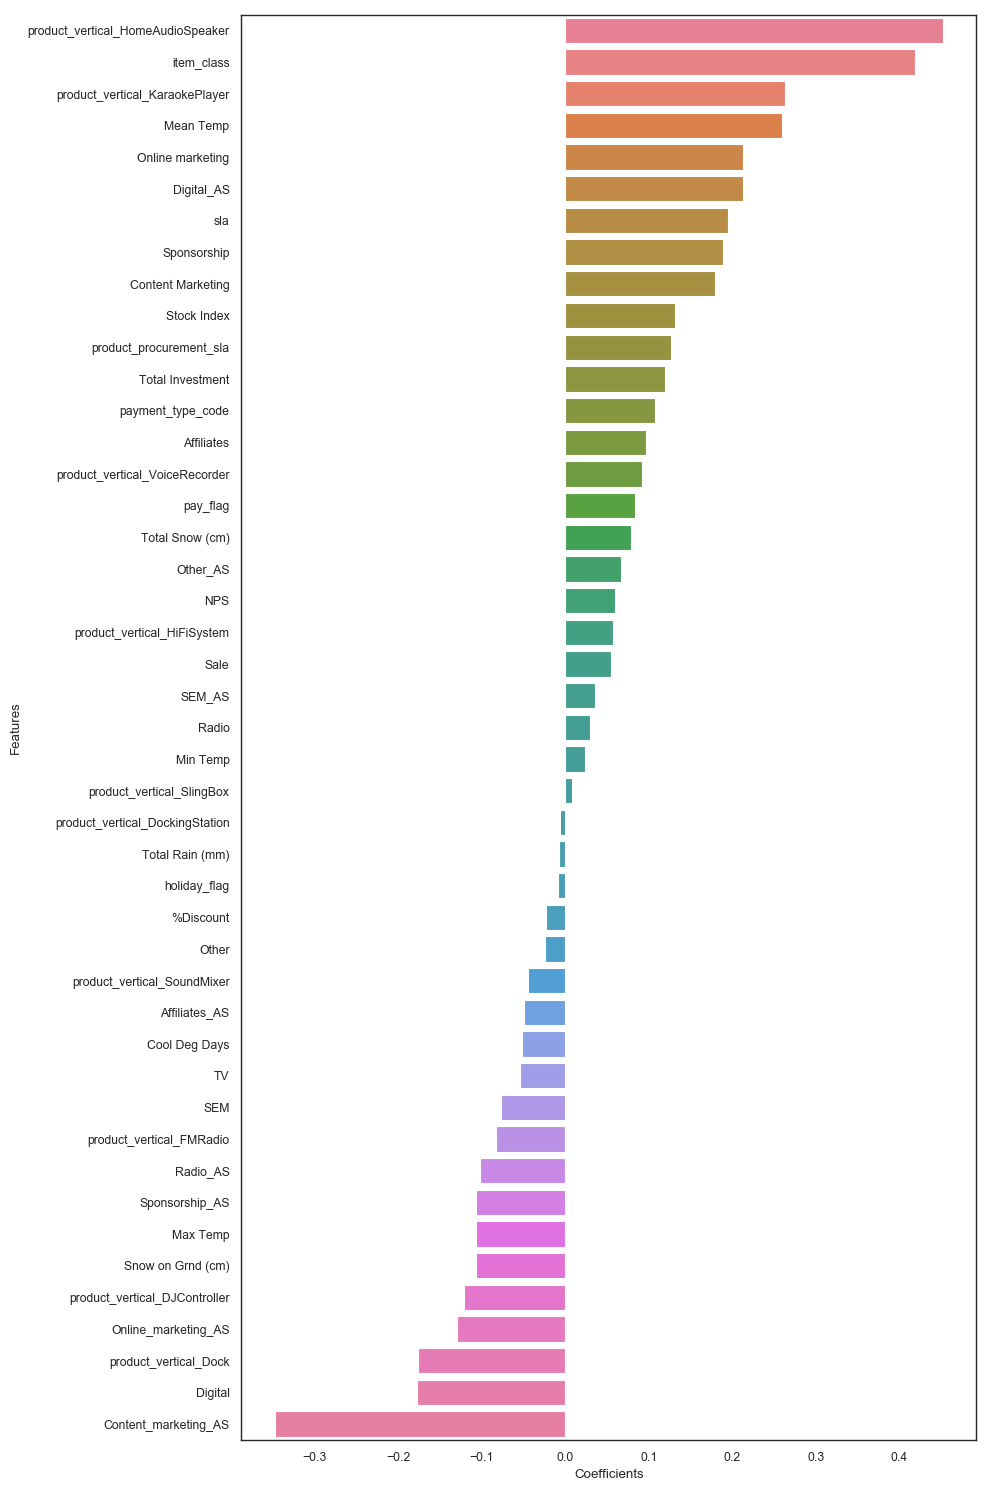

In [249]:
# Featiure importance plot
plt.figure(figsize=(10, 15), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.barplot(y='Features', x='Coefficients', palette='husl', data=homeaudio_lr_coef_df, estimator=np.sum)
plt.tight_layout()
plt.show()

# Modelling 2 - koyck

In [250]:
# Creating Dataframe to be used in Koyck
camera_kdf =   camera_df_final.copy()
gaming_kdf =  gaming_df_final.copy()
homeaudio_kdf =  homeaudio_df_final.copy()
 
print(camera_kdf.shape)
print(gaming_kdf.shape)
print(homeaudio_kdf.shape)

(50, 60)
(51, 52)
(48, 48)


In [251]:
#Creating 1 week Lag variable on GMV
camera_kdf['gmv_lag1'] = camera_kdf['gmv'].shift(1)
gaming_kdf['gmv_lag1'] = gaming_kdf['gmv'].shift(1)
homeaudio_kdf['gmv_lag1'] = homeaudio_kdf['gmv'].shift(1)

camera_kdf.head(10)

Week         gmv    sla  product_procurement_sla  pay_flag  \
25    28 3800540.000  7.056                    2.779         0   
26    29 4274721.000  6.400                    2.809       490   
27    30 4297908.000  6.414                    2.869         0   
28    31 2738474.000  6.373                    2.827         0   
29    32     699.000  5.000                    4.000         0   
30    33     299.000  6.000                    1.000         1   
31    35    1190.000 10.333                    2.000         0   
32    36 3685251.000  6.581                    2.874       452   
33    37 4853637.000  6.426                    2.960         0   
34    38 4612543.000  6.663                    2.927       418   

    payment_type_code  holiday_flag  item_class  %Discount  \
25               1870             0         355     45.169   
26               1989           847         383     45.564   
27               2006             0         357     44.717   
28               1375             0         231     44.080   
29                  1             0           0     51.790   
30                  1             1           0     84.970   
31                  1             2           0     40.963   
32               2020             0         289     45.105   
33               2388             0         392     45.865   
34               2218             0         375     45.600   

    product_vertical_CameraAccessory  ...  Stock Index  Max Temp  Min Temp  \
25                                42  ...     1177.000    28.000    12.500   
26                                30  ...     1177.000    33.000    11.000   
27                                42  ...     1177.000    31.500    14.500   
28                                40  ...     1177.000    33.500    16.000   
29                                 0  ...     1206.000    28.500    15.000   
30                                 0  ...     1206.000    31.000    14.500   
31                                 0  ...     1206.000    29.000    14.000   
32                                35  ...     1206.000    32.000    17.500   
33                                41  ...     1101.000    32.500     9.000   
34                                50  ...     1101.000    27.500    13.000   

    Mean Temp  Cool Deg Days  Total Rain (mm)  Total Snow (cm)  \
25     20.100          2.383            4.417            0.000   
26     23.183          5.183            1.400            0.000   
27     23.060          5.060            1.080            0.000   
28     24.567          6.567            4.633            0.000   
29     21.650          3.650            0.350            0.000   
30     23.950          5.950            2.900            0.000   
31     20.250          3.000            0.000            0.000   
32     24.460          6.460           12.120            0.000   
33     19.240          2.520            0.960            0.000   
34     20.550          2.550            1.100            0.000   

    Snow on Grnd (cm)  Sale    gmv_lag1  
25              0.000     0         nan  
26              0.000     2 3800540.000  
27              0.000     0 4274721.000  
28              0.000     0 4297908.000  
29              0.000     0 2738474.000  
30              0.000     2     699.000  
31              0.000     3     299.000  
32              0.000     0    1190.000  
33              0.000     0 3685251.000  
34              0.000     0 4853637.000  

[10 rows x 61 columns]

In [252]:
#There are null values on lag variable as for 1st row there wont be a preceding lag so imputing them with 0 
camera_kdf.fillna(value=0, inplace=True)
gaming_kdf.fillna(value=0, inplace=True)
homeaudio_kdf.fillna(value=0, inplace=True)

In [253]:
#Removing week 
camera_kdf = camera_kdf.drop('Week', axis=1)
gaming_kdf = gaming_kdf.drop('Week', axis=1)
homeaudio_kdf = homeaudio_kdf.drop('Week', axis=1)
gaming_kdf.head()

gmv   sla  product_procurement_sla  pay_flag  payment_type_code  \
25 2654733.000 5.414                    3.231         0               2091   
26 2226007.359 5.298                    2.726       309               1992   
27 2541974.500 5.429                    2.622         0               1801   
28 1817588.000 5.689                    3.225         1               1327   
29    2295.000 7.250                    2.250         0                  3   

    holiday_flag  item_class  %Discount  product_vertical_GameControlMount  \
25             0         214     40.850                                  0   
26           692         235     43.891                                  0   
27             0         340     38.546                                  0   
28             0         378     44.824                                  0   
29             0           1     62.938                                  0   

    product_vertical_GamePad  ...  Stock Index  Max Temp  Min Temp  Mean Temp  \
25                   891.000  ...     1177.000    28.000    12.500     20.100   
26                  1494.000  ...     1177.000    33.000    11.000     23.183   
27                   965.000  ...     1177.000    31.500    14.500     23.060   
28                   621.000  ...     1177.000    33.500    16.000     24.567   
29                     2.000  ...     1206.000    28.500    15.000     21.650   

    Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Snow on Grnd (cm)  Sale  \
25          2.383            4.417            0.000              0.000     0   
26          5.183            1.400            0.000              0.000     2   
27          5.060            1.080            0.000              0.000     0   
28          6.567            4.633            0.000              0.000     0   
29          3.650            0.350            0.000              0.000     0   

      gmv_lag1  
25       0.000  
26 2654733.000  
27 2226007.359  
28 2541974.500  
29 1817588.000  

[5 rows x 52 columns]

In [254]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

camera_kdf[camera_kdf.columns]=scaler.fit_transform(camera_kdf[camera_kdf.columns])
gaming_kdf[gaming_kdf.columns]=scaler.fit_transform(gaming_kdf[gaming_kdf.columns])
homeaudio_kdf[homeaudio_kdf.columns]=scaler.fit_transform(homeaudio_kdf[homeaudio_kdf.columns])

homeaudio_kdf.head()

gmv   sla  product_procurement_sla  pay_flag  payment_type_code  \
25 -0.086 2.029                    1.326    -0.743             -0.112   
26  0.231 1.526                    0.664     1.019              0.215   
27 -0.063 1.548                    1.169    -0.743              0.048   
28 -0.518 1.743                    0.401    -0.743             -0.486   
29 -1.831 3.658                   -4.149    -0.743             -1.806   

    holiday_flag  item_class  %Discount  product_vertical_DJController  \
25        -0.397      -0.604     -1.099                          1.670   
26         0.294      -0.310     -0.814                          1.267   
27        -0.397      -0.483     -0.802                          0.059   
28        -0.397      -0.698     -0.872                         -0.747   
29        -0.397      -1.441     -4.619                         -1.552   

    product_vertical_Dock  ...  Stock Index  Max Temp  Min Temp  Mean Temp  \
25                 -0.311  ...        0.157     0.776     1.118      0.959   
26                  0.490  ...        0.157     1.308     0.947      1.314   
27                  0.690  ...        0.157     1.149     1.347      1.300   
28                  0.209  ...        0.157     1.361     1.518      1.473   
29                 -1.512  ...        0.520     0.830     1.404      1.137   

    Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Snow on Grnd (cm)   Sale  \
25          0.461            0.430           -0.368             -0.275 -0.435   
26          1.755           -0.424           -0.368             -0.275  0.870   
27          1.698           -0.515           -0.368             -0.275 -0.435   
28          2.395            0.491           -0.368             -0.275 -0.435   
29          1.046           -0.721           -0.368             -0.275 -0.435   

    gmv_lag1  
25    -1.786  
26    -0.072  
27     0.239  
28    -0.049  
29    -0.496  

[5 rows x 48 columns]

In [255]:
#TEST TRAIN SPLIT 

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

cam_kdf_train, cam_kdf_test = train_test_split(camera_kdf,train_size = 0.7, test_size = 0.3, random_state = 42)

game_kdf_train, game_kdf_test = train_test_split(gaming_kdf,train_size = 0.7, test_size = 0.3, random_state = 42)

home_kdf_train, home_kdf_test = train_test_split(homeaudio_kdf, train_size = 0.7, test_size = 0.3, random_state = 42)

In [256]:
#Making X and Y train for kdf 
y_cam_kdf_train = cam_kdf_train.pop('gmv')
X_cam_kdf_train = cam_kdf_train

y_game_kdf_train = game_kdf_train.pop('gmv')
X_game_kdf_train = game_kdf_train

y_home_kdf_train = home_kdf_train.pop('gmv')
X_home_kdf_train = home_kdf_train 

In [257]:
# MAING X and Y TEST for KDF

y_cam_kdf_test = cam_kdf_test.pop('gmv')
X_cam_kdf_test = cam_kdf_test

y_game_kdf_test = game_kdf_test.pop('gmv')
X_game_kdf_test = game_kdf_test

y_home_kdf_test = home_kdf_test.pop('gmv')
X_home_kdf_test = home_kdf_test

 

In [258]:
# Regression for Camera 
koy_camera_mod = LinearRegression().fit(X_cam_kdf_train, y_cam_kdf_train)
y_koy_camera_test_pred = koy_camera_mod.predict(X_cam_kdf_test)

print('R2 Score: {}'.format(r2_score(y_cam_kdf_test, y_koy_camera_test_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_cam_kdf_test, y_koy_camera_test_pred)))

R2 Score: 0.9007817894337331
Mean Squared Error: 0.1655983939653162


In [259]:
#Regression for Gaming
koy_game_mod = LinearRegression().fit(X_game_kdf_train, y_game_kdf_train)
y_koy_game_test_pred = koy_game_mod.predict(X_game_kdf_test)

print('R2 Score: {}'.format(r2_score(y_game_kdf_test, y_koy_game_test_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_game_kdf_test, y_koy_game_test_pred)))

R2 Score: 0.7013422149442423
Mean Squared Error: 0.2823115924037126


In [260]:
#Regression for HomeAudio
koy_home_mod = LinearRegression().fit(X_home_kdf_train, y_home_kdf_train)
y_koy_home_test_pred = koy_home_mod.predict(X_home_kdf_test)

print('R2 Score: {}'.format(r2_score(y_home_kdf_test, y_koy_home_test_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_home_kdf_test, y_koy_home_test_pred)))

R2 Score: 0.5355021796234917
Mean Squared Error: 0.20275721812933722


In [261]:
# Feature inportance for KOYCK Camera
# linear regression model parameters
camera_koy_lr_model_parameters = list(koy_camera_mod.coef_)
camera_koy_lr_model_parameters.insert(0, koy_camera_mod.intercept_)
camera_koy_lr_model_parameters = [round(x, 3) for x in camera_koy_lr_model_parameters]
cols = X_cam_kdf_test.columns
cols = cols.insert(0, "constant")
camera_koy_lr_coef = list(zip(cols, camera_koy_lr_model_parameters))
camera_koy_lr_coef

[('constant', 0.022),
 ('sla', 0.066),
 ('product_procurement_sla', -0.026),
 ('pay_flag', 0.011),
 ('payment_type_code', 0.117),
 ('holiday_flag', -0.085),
 ('item_class', 0.399),
 ('%Discount', 0.021),
 ('product_vertical_CameraAccessory', 0.011),
 ('product_vertical_CameraBag', -0.047),
 ('product_vertical_CameraBattery', 0.136),
 ('product_vertical_CameraBatteryCharger', 0.152),
 ('product_vertical_CameraBatteryGrip', 0.032),
 ('product_vertical_CameraEyeCup', -0.087),
 ('product_vertical_CameraFilmRolls', 0.112),
 ('product_vertical_CameraHousing', -0.034),
 ('product_vertical_CameraMicrophone', -0.008),
 ('product_vertical_CameraMount', 0.041),
 ('product_vertical_CameraRemoteControl', 0.023),
 ('product_vertical_CameraTripod', 0.031),
 ('product_vertical_ExtensionTube', 0.019),
 ('product_vertical_Filter', 0.147),
 ('product_vertical_Flash', -0.058),
 ('product_vertical_FlashShoeAdapter', -0.0),
 ('product_vertical_Lens', 0.314),
 ('product_vertical_ReflectorUmbrella', -0.001),


In [262]:
camera_koy_lr_coef_df = pd.DataFrame(camera_koy_lr_coef)
col_rename = {0:'Features',1: 'Coefficients'}
camera_koy_lr_coef_df = camera_koy_lr_coef_df.rename(columns=col_rename)
camera_koy_lr_coef_df = camera_koy_lr_coef_df.iloc[1:,:]
camera_koy_lr_coef_df = camera_koy_lr_coef_df.loc[camera_koy_lr_coef_df['Coefficients']!=0.0]
camera_koy_lr_coef_df = camera_koy_lr_coef_df.sort_values(by=['Coefficients'], ascending = False)
camera_koy_lr_coef_df

Features  Coefficients
6                              item_class         0.399
24                  product_vertical_Lens         0.314
54                          Cool Deg Days         0.155
11  product_vertical_CameraBatteryCharger         0.152
21                product_vertical_Filter         0.147
10         product_vertical_CameraBattery         0.136
4                       payment_type_code         0.117
14       product_vertical_CameraFilmRolls         0.112
35                       Online marketing         0.094
36                             Affiliates         0.085
1                                     sla         0.066
53                              Mean Temp         0.055
58                                   Sale         0.052
45                          Affiliates_AS         0.044
17           product_vertical_CameraMount         0.041
44                    Online_marketing_AS         0.040
41                             Digital_AS         0.036
31                                     TV         0.036
27                 product_vertical_Strap         0.033
12     product_vertical_CameraBatteryGrip         0.032
46                                 SEM_AS         0.032
19          product_vertical_CameraTripod         0.031
26               product_vertical_Softbox         0.026
18   product_vertical_CameraRemoteControl         0.023
7                               %Discount         0.021
20         product_vertical_ExtensionTube         0.019
52                               Min Temp         0.019
8        product_vertical_CameraAccessory         0.011
3                                pay_flag         0.011
38                                  Radio         0.005
25     product_vertical_ReflectorUmbrella        -0.001
40                                  TV_AS        -0.003
39                                  Other        -0.004
57                      Snow on Grnd (cm)        -0.006
16      product_vertical_CameraMicrophone        -0.008
55                        Total Rain (mm)        -0.010
59                               gmv_lag1        -0.011
28         product_vertical_Teleconverter        -0.014
50                            Stock Index        -0.019
37                                    SEM        -0.022
30                       Total Investment        -0.026
2                 product_procurement_sla        -0.026
15         product_vertical_CameraHousing        -0.034
43                   Content_marketing_AS        -0.036
56                        Total Snow (cm)        -0.038
49                                    NPS        -0.045
9              product_vertical_CameraBag        -0.047
51                               Max Temp        -0.047
29             product_vertical_Telescope        -0.051
32                                Digital        -0.058
22                 product_vertical_Flash        -0.058
48                               Other_AS        -0.059
47                               Radio_AS        -0.065
33                            Sponsorship        -0.069
42                         Sponsorship_AS        -0.076
5                            holiday_flag        -0.085
13          product_vertical_CameraEyeCup        -0.087

In [263]:
#Effect of LAG - all coeff will be coeff + effct = coeff+  coeff*lag/(1-lag) = coeff/(1-lag)
camera_koy_lr_coef_df.loc[camera_koy_lr_coef_df['Features'] == 'gmv_lag1'].Coefficients

59   -0.011
Name: Coefficients, dtype: float64

In [269]:
camera_koy_lr_coef_df['Lag Effect'] = camera_koy_lr_coef_df['Coefficients']/(1-(-0.011))
camera_koy_lr_coef_df

Features  Coefficients  Lag Effect
6                              item_class         0.399       0.395
24                  product_vertical_Lens         0.314       0.311
54                          Cool Deg Days         0.155       0.153
11  product_vertical_CameraBatteryCharger         0.152       0.150
21                product_vertical_Filter         0.147       0.145
10         product_vertical_CameraBattery         0.136       0.135
4                       payment_type_code         0.117       0.116
14       product_vertical_CameraFilmRolls         0.112       0.111
35                       Online marketing         0.094       0.093
36                             Affiliates         0.085       0.084
1                                     sla         0.066       0.065
53                              Mean Temp         0.055       0.054
58                                   Sale         0.052       0.051
45                          Affiliates_AS         0.044       0.044
17           product_vertical_CameraMount         0.041       0.041
44                    Online_marketing_AS         0.040       0.040
41                             Digital_AS         0.036       0.036
31                                     TV         0.036       0.036
27                 product_vertical_Strap         0.033       0.033
12     product_vertical_CameraBatteryGrip         0.032       0.032
46                                 SEM_AS         0.032       0.032
19          product_vertical_CameraTripod         0.031       0.031
26               product_vertical_Softbox         0.026       0.026
18   product_vertical_CameraRemoteControl         0.023       0.023
7                               %Discount         0.021       0.021
20         product_vertical_ExtensionTube         0.019       0.019
52                               Min Temp         0.019       0.019
8        product_vertical_CameraAccessory         0.011       0.011
3                                pay_flag         0.011       0.011
38                                  Radio         0.005       0.005
25     product_vertical_ReflectorUmbrella        -0.001      -0.001
40                                  TV_AS        -0.003      -0.003
39                                  Other        -0.004      -0.004
57                      Snow on Grnd (cm)        -0.006      -0.006
16      product_vertical_CameraMicrophone        -0.008      -0.008
55                        Total Rain (mm)        -0.010      -0.010
59                               gmv_lag1        -0.011      -0.011
28         product_vertical_Teleconverter        -0.014      -0.014
50                            Stock Index        -0.019      -0.019
37                                    SEM        -0.022      -0.022
30                       Total Investment        -0.026      -0.026
2                 product_procurement_sla        -0.026      -0.026
15         product_vertical_CameraHousing        -0.034      -0.034
43                   Content_marketing_AS        -0.036      -0.036
56                        Total Snow (cm)        -0.038      -0.038
49                                    NPS        -0.045      -0.045
9              product_vertical_CameraBag        -0.047      -0.046
51                               Max Temp        -0.047      -0.046
29             product_vertical_Telescope        -0.051      -0.050
32                                Digital        -0.058      -0.057
22                 product_vertical_Flash        -0.058      -0.057
48                               Other_AS        -0.059      -0.058
47                               Radio_AS        -0.065      -0.064
33                            Sponsorship        -0.069      -0.068
42                         Sponsorship_AS        -0.076      -0.075
5                            holiday_flag        -0.085      -0.084
13          product_vertical_CameraEyeCup        -0.087      -0.086

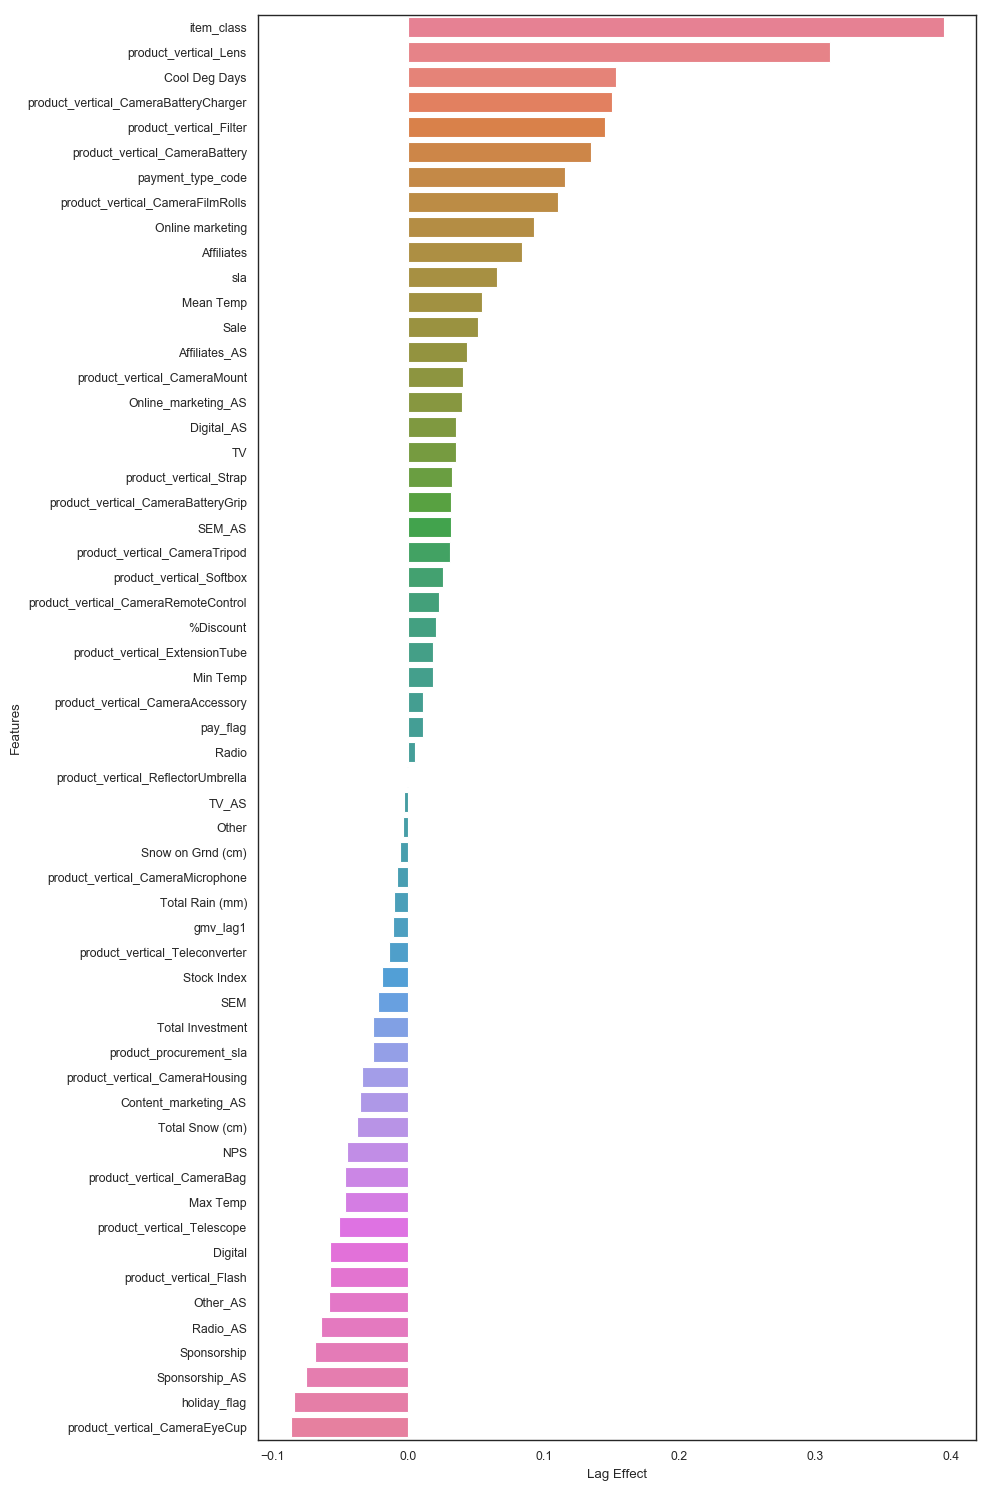

In [270]:
#Feature importance plot after accounting lag effect
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(10, 15), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.barplot(y='Features', x='Lag Effect', palette='husl', data=camera_koy_lr_coef_df, estimator=np.sum)
# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

In [ ]:
#KOYCK for Gaming 

In [273]:
gaming_koy_lr_model_parameters = list(koy_game_mod.coef_)
gaming_koy_lr_model_parameters.insert(0, koy_game_mod.intercept_)
gaming_koy_lr_model_parameters = [round(x, 3) for x in gaming_koy_lr_model_parameters]
cols = X_game_kdf_test.columns
cols = cols.insert(0, "constant")
gaming_koy_lr_coef = list(zip(cols, gaming_koy_lr_model_parameters))
gaming_koy_lr_coef

[('constant', -0.069),
 ('sla', -0.071),
 ('product_procurement_sla', 0.048),
 ('pay_flag', 0.147),
 ('payment_type_code', -0.26),
 ('holiday_flag', 0.039),
 ('item_class', 0.062),
 ('%Discount', -0.256),
 ('product_vertical_GameControlMount', -0.013),
 ('product_vertical_GamePad', 0.381),
 ('product_vertical_GamingAccessoryKit', 0.029),
 ('product_vertical_GamingAdapter', -0.259),
 ('product_vertical_GamingChargingStation', 0.054),
 ('product_vertical_GamingHeadset', 0.334),
 ('product_vertical_GamingKeyboard', -0.042),
 ('product_vertical_GamingMemoryCard', -0.228),
 ('product_vertical_GamingMouse', 0.144),
 ('product_vertical_GamingMousePad', 0.221),
 ('product_vertical_GamingSpeaker', 0.291),
 ('product_vertical_JoystickGamingWheel', 0.048),
 ('product_vertical_MotionController', 0.349),
 ('product_vertical_TVOutCableAccessory', -0.085),
 ('Total Investment', 0.059),
 ('TV', 0.013),
 ('Digital', 0.098),
 ('Sponsorship', 0.081),
 ('Content Marketing', 0.029),
 ('Online marketing', 0

In [275]:

gaming_koy_coef_df = pd.DataFrame(gaming_koy_lr_coef)
col_rename = {0:'Features',1: 'Coefficients'}
gaming_koy_coef_df = gaming_koy_coef_df.rename(columns=col_rename)
gaming_koy_coef_df = gaming_koy_coef_df.iloc[1:,:]
gaming_koy_coef_df = gaming_koy_coef_df.loc[gaming_koy_coef_df['Coefficients']!=0.0]
gaming_koy_coef_df = gaming_koy_coef_df.sort_values(by=['Coefficients'], ascending = False)
gaming_koy_coef_df

Features  Coefficients
9                 product_vertical_GamePad         0.381
20       product_vertical_MotionController         0.349
13          product_vertical_GamingHeadset         0.334
18          product_vertical_GamingSpeaker         0.291
17         product_vertical_GamingMousePad         0.221
31                                   Other         0.200
3                                 pay_flag         0.147
16            product_vertical_GamingMouse         0.144
33                              Digital_AS         0.110
24                                 Digital         0.098
25                             Sponsorship         0.081
47                         Total Rain (mm)         0.071
6                               item_class         0.062
22                        Total Investment         0.059
12  product_vertical_GamingChargingStation         0.054
35                    Content_marketing_AS         0.049
19    product_vertical_JoystickGamingWheel         0.048
2                  product_procurement_sla         0.048
5                             holiday_flag         0.039
10     product_vertical_GamingAccessoryKit         0.029
26                       Content Marketing         0.029
42                             Stock Index         0.028
40                                Other_AS         0.024
49                       Snow on Grnd (cm)         0.022
44                                Min Temp         0.016
23                                      TV         0.013
27                        Online marketing         0.007
51                                gmv_lag1        -0.002
28                              Affiliates        -0.006
8        product_vertical_GameControlMount        -0.013
14         product_vertical_GamingKeyboard        -0.042
48                         Total Snow (cm)        -0.043
36                     Online_marketing_AS        -0.051
37                           Affiliates_AS        -0.056
34                          Sponsorship_AS        -0.061
30                                   Radio        -0.063
43                                Max Temp        -0.063
50                                    Sale        -0.066
1                                      sla        -0.071
21    product_vertical_TVOutCableAccessory        -0.085
38                                  SEM_AS        -0.131
45                               Mean Temp        -0.137
39                                Radio_AS        -0.150
32                                   TV_AS        -0.150
29                                     SEM        -0.161
46                           Cool Deg Days        -0.216
15       product_vertical_GamingMemoryCard        -0.228
41                                     NPS        -0.249
7                                %Discount        -0.256
11          product_vertical_GamingAdapter        -0.259
4                        payment_type_code        -0.260

In [276]:
#Lag effect in Koyck Gaming
gaming_koy_coef_df.loc[gaming_koy_coef_df['Features'] == 'gmv_lag1'].Coefficients

51   -0.002
Name: Coefficients, dtype: float64

In [277]:
gaming_koy_coef_df['Lag Effect'] = gaming_koy_coef_df['Coefficients']/(1-(-0.002))
gaming_koy_coef_df

Features  Coefficients  Lag Effect
9                 product_vertical_GamePad         0.381       0.380
20       product_vertical_MotionController         0.349       0.348
13          product_vertical_GamingHeadset         0.334       0.333
18          product_vertical_GamingSpeaker         0.291       0.290
17         product_vertical_GamingMousePad         0.221       0.221
31                                   Other         0.200       0.200
3                                 pay_flag         0.147       0.147
16            product_vertical_GamingMouse         0.144       0.144
33                              Digital_AS         0.110       0.110
24                                 Digital         0.098       0.098
25                             Sponsorship         0.081       0.081
47                         Total Rain (mm)         0.071       0.071
6                               item_class         0.062       0.062
22                        Total Investment         0.059       0.059
12  product_vertical_GamingChargingStation         0.054       0.054
35                    Content_marketing_AS         0.049       0.049
19    product_vertical_JoystickGamingWheel         0.048       0.048
2                  product_procurement_sla         0.048       0.048
5                             holiday_flag         0.039       0.039
10     product_vertical_GamingAccessoryKit         0.029       0.029
26                       Content Marketing         0.029       0.029
42                             Stock Index         0.028       0.028
40                                Other_AS         0.024       0.024
49                       Snow on Grnd (cm)         0.022       0.022
44                                Min Temp         0.016       0.016
23                                      TV         0.013       0.013
27                        Online marketing         0.007       0.007
51                                gmv_lag1        -0.002      -0.002
28                              Affiliates        -0.006      -0.006
8        product_vertical_GameControlMount        -0.013      -0.013
14         product_vertical_GamingKeyboard        -0.042      -0.042
48                         Total Snow (cm)        -0.043      -0.043
36                     Online_marketing_AS        -0.051      -0.051
37                           Affiliates_AS        -0.056      -0.056
34                          Sponsorship_AS        -0.061      -0.061
30                                   Radio        -0.063      -0.063
43                                Max Temp        -0.063      -0.063
50                                    Sale        -0.066      -0.066
1                                      sla        -0.071      -0.071
21    product_vertical_TVOutCableAccessory        -0.085      -0.085
38                                  SEM_AS        -0.131      -0.131
45                               Mean Temp        -0.137      -0.137
39                                Radio_AS        -0.150      -0.150
32                                   TV_AS        -0.150      -0.150
29                                     SEM        -0.161      -0.161
46                           Cool Deg Days        -0.216      -0.216
15       product_vertical_GamingMemoryCard        -0.228      -0.228
41                                     NPS        -0.249      -0.249
7                                %Discount        -0.256      -0.255
11          product_vertical_GamingAdapter        -0.259      -0.258
4                        payment_type_code        -0.260      -0.259

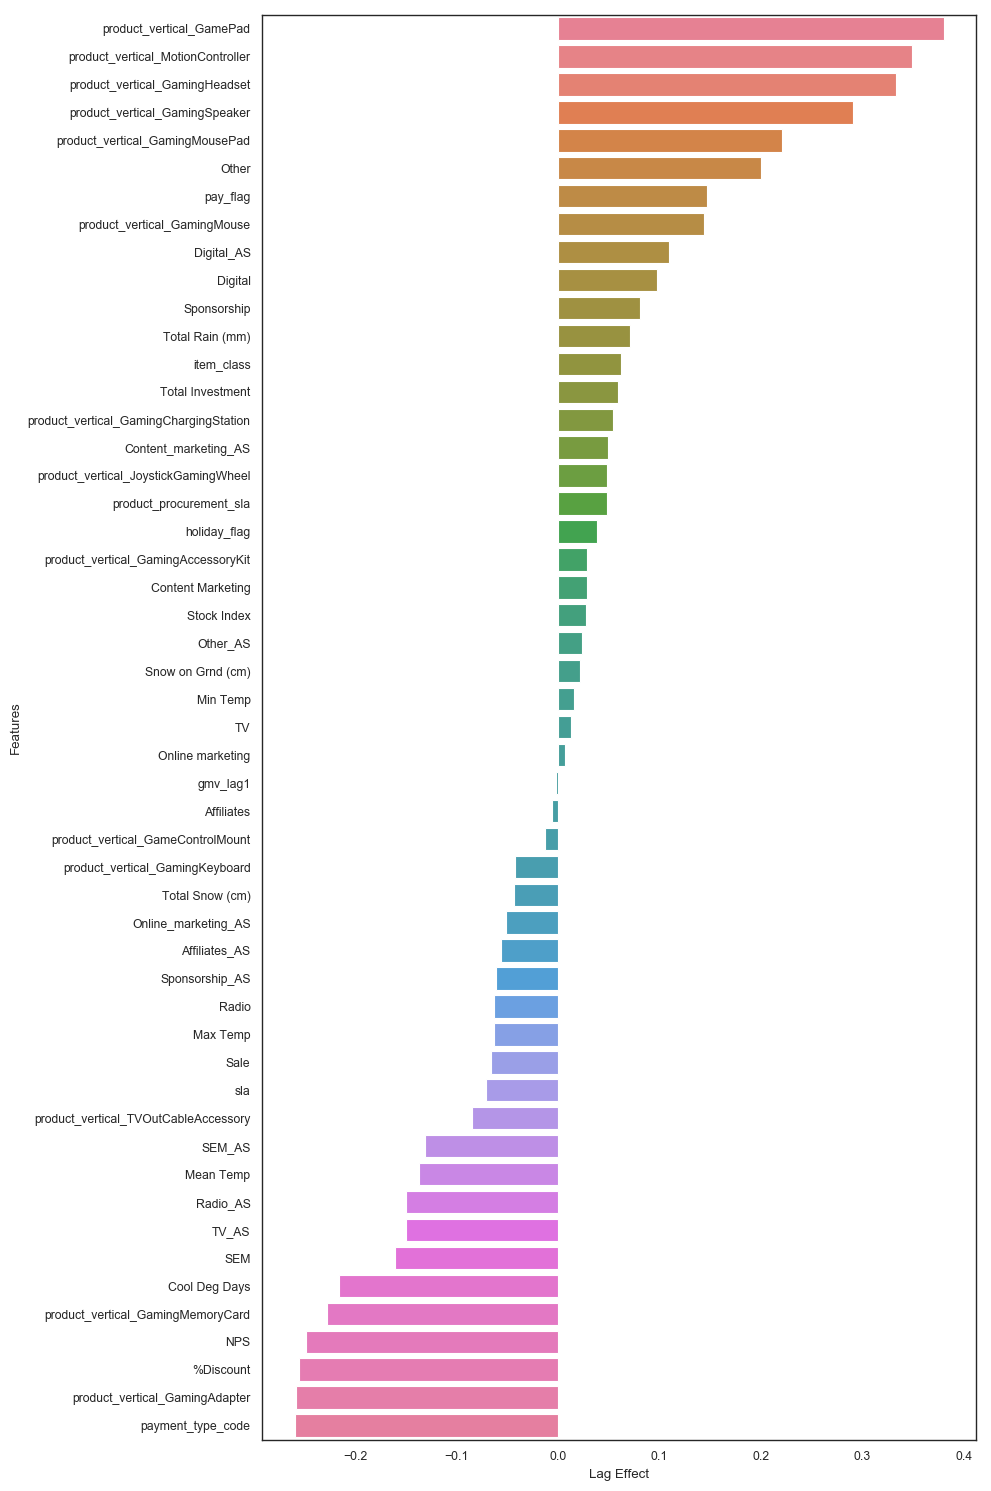

In [279]:
# Plotting features as per impirtance for Koyck gaming
plt.figure(figsize=(10, 15), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.barplot(y='Features', x='Lag Effect', palette='husl', data=gaming_koy_coef_df, estimator=np.sum)
plt.tight_layout()

plt.show()

In [ ]:
#Koyck for HOMEAUDIO

koy_home_mod = LinearRegression().fit(X_home_kdf_train, y_home_kdf_train)
y_koy_home_test_pred = koy_home_mod.predict(X_home_kdf_test)

print('R2 Score: {}'.format(r2_score(y_home_kdf_test, y_koy_home_test_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_home_kdf_test, y_koy_home_test_pred)))

In [281]:
#Koyck Homeaudio model parameters 
homeaudio_koy_model_parameters = list(koy_home_mod.coef_)
homeaudio_koy_model_parameters.insert(0, koy_home_mod.intercept_)
homeaudio_koy_model_parameters = [round(x, 3) for x in homeaudio_koy_model_parameters]
cols = X_home_kdf_test.columns
cols = cols.insert(0, "constant")
homeaudio_koy_coef = list(zip(cols, homeaudio_koy_model_parameters))
homeaudio_koy_coef

[('constant', 0.006),
 ('sla', 0.182),
 ('product_procurement_sla', 0.128),
 ('pay_flag', 0.08),
 ('payment_type_code', 0.083),
 ('holiday_flag', 0.018),
 ('item_class', 0.454),
 ('%Discount', -0.058),
 ('product_vertical_DJController', -0.111),
 ('product_vertical_Dock', -0.16),
 ('product_vertical_DockingStation', -0.023),
 ('product_vertical_FMRadio', -0.108),
 ('product_vertical_HiFiSystem', 0.057),
 ('product_vertical_HomeAudioSpeaker', 0.488),
 ('product_vertical_KaraokePlayer', 0.208),
 ('product_vertical_SlingBox', -0.003),
 ('product_vertical_SoundMixer', -0.047),
 ('product_vertical_VoiceRecorder', 0.104),
 ('Total Investment', 0.134),
 ('TV', -0.028),
 ('Digital', -0.192),
 ('Sponsorship', 0.23),
 ('Content Marketing', 0.166),
 ('Online marketing', 0.193),
 ('Affiliates', 0.062),
 ('SEM', -0.049),
 ('Radio', 0.009),
 ('Other', -0.071),
 ('TV_AS', 0.043),
 ('Digital_AS', 0.112),
 ('Sponsorship_AS', -0.164),
 ('Content_marketing_AS', -0.216),
 ('Online_marketing_AS', -0.126),


In [282]:
homeaudio_koy_coef_df = pd.DataFrame(homeaudio_koy_coef)
col_rename = {0:'Features',1: 'Coefficients'}
homeaudio_koy_coef_df = homeaudio_koy_coef_df.rename(columns=col_rename)
homeaudio_koy_coef_df = homeaudio_koy_coef_df.iloc[1:,:]
homeaudio_koy_coef_df = homeaudio_koy_coef_df.loc[homeaudio_koy_coef_df['Coefficients']!=0.0]
homeaudio_koy_coef_df = homeaudio_koy_coef_df.sort_values(by=['Coefficients'], ascending = False)
homeaudio_koy_coef_df

Features  Coefficients
13  product_vertical_HomeAudioSpeaker         0.488
6                          item_class         0.454
21                        Sponsorship         0.230
41                          Mean Temp         0.224
14     product_vertical_KaraokePlayer         0.208
23                   Online marketing         0.193
1                                 sla         0.182
22                  Content Marketing         0.166
38                        Stock Index         0.159
18                   Total Investment         0.134
2             product_procurement_sla         0.128
29                         Digital_AS         0.112
17     product_vertical_VoiceRecorder         0.104
44                    Total Snow (cm)         0.087
36                           Other_AS         0.084
4                   payment_type_code         0.083
3                            pay_flag         0.080
24                         Affiliates         0.062
12        product_vertical_HiFiSystem         0.057
28                              TV_AS         0.043
37                                NPS         0.038
46                               Sale         0.035
40                           Min Temp         0.030
47                           gmv_lag1         0.024
5                        holiday_flag         0.018
34                             SEM_AS         0.010
26                              Radio         0.009
15          product_vertical_SlingBox        -0.003
43                    Total Rain (mm)        -0.008
10    product_vertical_DockingStation        -0.023
19                                 TV        -0.028
42                      Cool Deg Days        -0.045
16        product_vertical_SoundMixer        -0.047
25                                SEM        -0.049
35                           Radio_AS        -0.058
7                           %Discount        -0.058
27                              Other        -0.071
39                           Max Temp        -0.092
33                      Affiliates_AS        -0.092
11           product_vertical_FMRadio        -0.108
8       product_vertical_DJController        -0.111
32                Online_marketing_AS        -0.126
45                  Snow on Grnd (cm)        -0.132
9               product_vertical_Dock        -0.160
30                     Sponsorship_AS        -0.164
20                            Digital        -0.192
31               Content_marketing_AS        -0.216

In [283]:
#Lag effect
homeaudio_koy_coef_df.loc[homeaudio_koy_coef_df['Features'] == 'gmv_lag1'].Coefficients

47   0.024
Name: Coefficients, dtype: float64

In [286]:
homeaudio_koy_coef_df['Lag Effect'] = homeaudio_koy_coef_df['Coefficients']/(1-(0.024))
homeaudio_koy_coef_df

Features  Coefficients  Lag Effect
13  product_vertical_HomeAudioSpeaker         0.488       0.500
6                          item_class         0.454       0.465
21                        Sponsorship         0.230       0.236
41                          Mean Temp         0.224       0.230
14     product_vertical_KaraokePlayer         0.208       0.213
23                   Online marketing         0.193       0.198
1                                 sla         0.182       0.186
22                  Content Marketing         0.166       0.170
38                        Stock Index         0.159       0.163
18                   Total Investment         0.134       0.137
2             product_procurement_sla         0.128       0.131
29                         Digital_AS         0.112       0.115
17     product_vertical_VoiceRecorder         0.104       0.107
44                    Total Snow (cm)         0.087       0.089
36                           Other_AS         0.084       0.086
4                   payment_type_code         0.083       0.085
3                            pay_flag         0.080       0.082
24                         Affiliates         0.062       0.064
12        product_vertical_HiFiSystem         0.057       0.058
28                              TV_AS         0.043       0.044
37                                NPS         0.038       0.039
46                               Sale         0.035       0.036
40                           Min Temp         0.030       0.031
47                           gmv_lag1         0.024       0.025
5                        holiday_flag         0.018       0.018
34                             SEM_AS         0.010       0.010
26                              Radio         0.009       0.009
15          product_vertical_SlingBox        -0.003      -0.003
43                    Total Rain (mm)        -0.008      -0.008
10    product_vertical_DockingStation        -0.023      -0.024
19                                 TV        -0.028      -0.029
42                      Cool Deg Days        -0.045      -0.046
16        product_vertical_SoundMixer        -0.047      -0.048
25                                SEM        -0.049      -0.050
35                           Radio_AS        -0.058      -0.059
7                           %Discount        -0.058      -0.059
27                              Other        -0.071      -0.073
39                           Max Temp        -0.092      -0.094
33                      Affiliates_AS        -0.092      -0.094
11           product_vertical_FMRadio        -0.108      -0.111
8       product_vertical_DJController        -0.111      -0.114
32                Online_marketing_AS        -0.126      -0.129
45                  Snow on Grnd (cm)        -0.132      -0.135
9               product_vertical_Dock        -0.160      -0.164
30                     Sponsorship_AS        -0.164      -0.168
20                            Digital        -0.192      -0.197
31               Content_marketing_AS        -0.216      -0.221

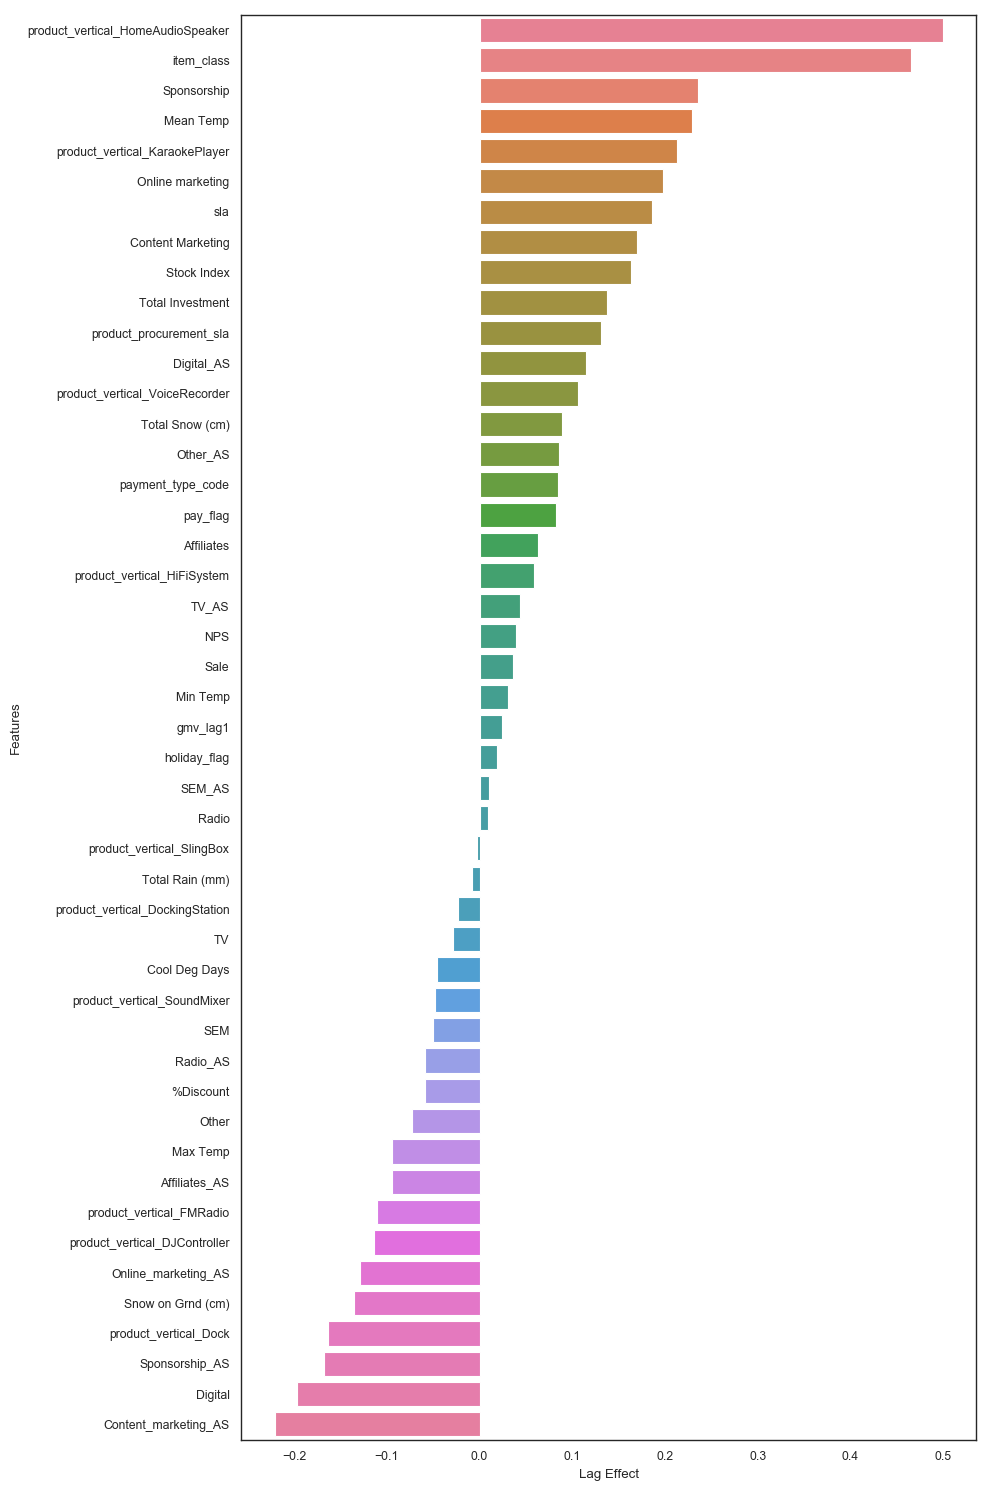

In [289]:
# Feature importance plot - Koyck - Homeaudio
plt.figure(figsize=(10, 15), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.barplot(y='Features', x='Lag Effect', palette='husl', data=homeaudio_koy_coef_df, estimator=np.sum)
plt.tight_layout()
plt.show()

# Multiplicative model 

In [290]:
camera_mult_df = camera_df_final.copy()
gaming_mult_df =  gaming_df_final.copy()
homeaudio_mult_df = homeaudio_df_final.copy()
 
print(camera_mult_df.shape)
print(gaming_mult_df.shape)
print(homeaudio_mult_df.shape)    

(50, 60)
(51, 52)
(48, 48)


In [291]:
# removing week
camera_mult_df = camera_mult_df.drop('Week', axis=1)
gaming_mult_df = gaming_mult_df.drop('Week', axis=1)
homeaudio_mult_df = homeaudio_mult_df.drop('Week', axis=1)
print(camera_mult_df.shape)
print(gaming_mult_df.shape)
print(homeaudio_mult_df.shape)   

(50, 59)
(51, 51)
(48, 47)


In [292]:
# we will take log on all variables, log0 is indeterminate/inf, so we will convert that back to 0
camera_mult_df = camera_mult_df.applymap(lambda x: np.log(x))
camera_mult_df = camera_mult_df.replace([np.inf, -np.inf], 0)
camera_mult_df = camera_mult_df.replace(np.nan, 0)

gaming_mult_df = gaming_mult_df.applymap(lambda x: np.log(x))
gaming_mult_df = gaming_mult_df.replace([np.inf, -np.inf], 0)
gaming_mult_df = gaming_mult_df.replace(np.nan, 0)

homeaudio_mult_df = homeaudio_mult_df.applymap(lambda x: np.log(x))
homeaudio_mult_df = homeaudio_mult_df.replace([np.inf, -np.inf], 0)
homeaudio_mult_df = homeaudio_mult_df.replace(np.nan, 0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


In [293]:
#scaling features
camera_mult_df[camera_mult_df.columns]=scaler.fit_transform(camera_mult_df[camera_mult_df.columns])
gaming_mult_df[gaming_mult_df.columns]=scaler.fit_transform(gaming_mult_df[gaming_mult_df.columns])
homeaudio_mult_df[homeaudio_mult_df.columns]=scaler.fit_transform(homeaudio_mult_df[homeaudio_mult_df.columns])

 

In [294]:
#TEST TRAIN SPLIT

from sklearn.model_selection import train_test_split

camera_mult_df_train, camera_mult_df_test = train_test_split(camera_mult_df, train_size = 0.7, test_size = 0.3, random_state = 42)

gaming_mult_df_train, gaming_mult_df_test = train_test_split(gaming_mult_df,train_size = 0.7, test_size = 0.3, random_state = 42)

homeaudio_mult_df_train, homeaudio_mult_df_test = train_test_split(homeaudio_mult_df,train_size = 0.7, test_size = 0.3, random_state = 42)

In [295]:
#Preparing Train dataframes
y_camera_mult_df_train = camera_mult_df_train.pop('gmv')
X_camera_mult_df_train = camera_mult_df_train

y_gaming_mult_df_train = gaming_mult_df_train.pop('gmv')
X_gaming_mult_df_train = gaming_mult_df_train

y_homeaudio_mult_df_train = homeaudio_mult_df_train.pop('gmv')
X_homeaudio_mult_df_train = homeaudio_mult_df_train

 

In [296]:
#Preparing Test Dataframes

y_camera_mult_df_test = camera_mult_df_test.pop('gmv')
X_camera_mult_df_test = camera_mult_df_test

y_gaming_mult_df_test = gaming_mult_df_test.pop('gmv')
X_gaming_mult_df_test = gaming_mult_df_test

y_homeaudio_mult_df_test = homeaudio_mult_df_test.pop('gmv')
X_homeaudio_mult_df_test = homeaudio_mult_df_test

 

In [297]:
# LR - multiplicative - Camera 
camera_mult_model = LinearRegression().fit(X_camera_mult_df_train, y_camera_mult_df_train)
y_camera_mult_test_pred = camera_mult_model.predict(X_camera_mult_df_test)

print('R2 Score: {}'.format(r2_score(y_camera_mult_df_test, y_camera_mult_test_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_camera_mult_df_test, y_camera_mult_test_pred)))

R2 Score: 0.988946184325785
Mean Squared Error: 0.01186045884210569


In [298]:
# LR - multiplicative - Gaming
gaming_mult_model = LinearRegression().fit(X_gaming_mult_df_train, y_gaming_mult_df_train)
y_gaming_mult_test_pred = gaming_mult_model.predict(X_gaming_mult_df_test)

print('R2 Score: {}'.format(r2_score(y_gaming_mult_df_test, y_gaming_mult_test_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_gaming_mult_df_test, y_gaming_mult_test_pred)))

R2 Score: 0.8922386686668216
Mean Squared Error: 0.1829417590872743


In [299]:
#LR - multiplicative -Homeaudio R2
homeaudio_mult_model = LinearRegression().fit(X_homeaudio_mult_df_train, y_homeaudio_mult_df_train)
y_homeaudio_mult_test_pred = homeaudio_mult_model.predict(X_homeaudio_mult_df_test)

print('R2 Score: {}'.format(r2_score(y_homeaudio_mult_df_test, y_homeaudio_mult_test_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_homeaudio_mult_df_test, y_homeaudio_mult_test_pred)))

R2 Score: 0.95310177888034
Mean Squared Error: 0.12850863359676928


In [ ]:
# This is promising R2 score - CV

In [301]:
# Finding model parameters for Camera
camera_mult_coef_df = pd.DataFrame(camera_mult_coef)
col_rename = {0:'Features',1: 'Coefficients'}
camera_mult_coef_df = camera_mult_coef_df.rename(columns=col_rename)
camera_mult_coef_df = camera_mult_coef_df.iloc[1:,:]
camera_mult_coef_df = camera_mult_coef_df.loc[camera_mult_coef_df['Coefficients']!=0.0]
camera_mult_coef_df = camera_mult_coef_df.sort_values(by=['Coefficients'], ascending = False)
camera_mult_coef_df

Features  Coefficients
19          product_vertical_CameraTripod         0.260
24                  product_vertical_Lens         0.239
9              product_vertical_CameraBag         0.146
10         product_vertical_CameraBattery         0.112
6                              item_class         0.106
27                 product_vertical_Strap         0.103
11  product_vertical_CameraBatteryCharger         0.092
54                          Cool Deg Days         0.071
53                              Mean Temp         0.053
13          product_vertical_CameraEyeCup         0.049
8        product_vertical_CameraAccessory         0.040
35                       Online marketing         0.036
21                product_vertical_Filter         0.035
43                   Content_marketing_AS         0.029
55                        Total Rain (mm)         0.028
37                                    SEM         0.028
36                             Affiliates         0.027
14       product_vertical_CameraFilmRolls         0.024
20         product_vertical_ExtensionTube         0.020
30                       Total Investment         0.020
48                               Other_AS         0.019
22                 product_vertical_Flash         0.017
33                            Sponsorship         0.016
17           product_vertical_CameraMount         0.012
50                            Stock Index         0.005
38                                  Radio         0.005
5                            holiday_flag         0.002
25     product_vertical_ReflectorUmbrella        -0.001
44                    Online_marketing_AS        -0.003
42                         Sponsorship_AS        -0.003
26               product_vertical_Softbox        -0.007
52                               Min Temp        -0.007
57                      Snow on Grnd (cm)        -0.009
46                                 SEM_AS        -0.013
58                                   Sale        -0.015
32                                Digital        -0.015
3                                pay_flag        -0.016
45                          Affiliates_AS        -0.016
12     product_vertical_CameraBatteryGrip        -0.017
31                                     TV        -0.018
18   product_vertical_CameraRemoteControl        -0.020
40                                  TV_AS        -0.020
39                                  Other        -0.021
56                        Total Snow (cm)        -0.022
4                       payment_type_code        -0.022
41                             Digital_AS        -0.024
34                      Content Marketing        -0.028
2                 product_procurement_sla        -0.029
1                                     sla        -0.034
51                               Max Temp        -0.036
15         product_vertical_CameraHousing        -0.042
47                               Radio_AS        -0.046
16      product_vertical_CameraMicrophone        -0.051
7                               %Discount        -0.132
29             product_vertical_Telescope        -0.140

In [302]:
#Ordering important features
camera_mult_coef_df = pd.DataFrame(camera_mult_coef)
col_rename = {0:'Features',1: 'Coefficients'}
camera_mult_coef_df = camera_mult_coef_df.rename(columns=col_rename)
camera_mult_coef_df = camera_mult_coef_df.iloc[1:,:]
camera_mult_coef_df = camera_mult_coef_df.loc[camera_mult_coef_df['Coefficients']!=0.0]
camera_mult_coef_df = camera_mult_coef_df.sort_values(by=['Coefficients'], ascending = False)
camera_mult_coef_df

Features  Coefficients
19          product_vertical_CameraTripod         0.260
24                  product_vertical_Lens         0.239
9              product_vertical_CameraBag         0.146
10         product_vertical_CameraBattery         0.112
6                              item_class         0.106
27                 product_vertical_Strap         0.103
11  product_vertical_CameraBatteryCharger         0.092
54                          Cool Deg Days         0.071
53                              Mean Temp         0.053
13          product_vertical_CameraEyeCup         0.049
8        product_vertical_CameraAccessory         0.040
35                       Online marketing         0.036
21                product_vertical_Filter         0.035
43                   Content_marketing_AS         0.029
55                        Total Rain (mm)         0.028
37                                    SEM         0.028
36                             Affiliates         0.027
14       product_vertical_CameraFilmRolls         0.024
20         product_vertical_ExtensionTube         0.020
30                       Total Investment         0.020
48                               Other_AS         0.019
22                 product_vertical_Flash         0.017
33                            Sponsorship         0.016
17           product_vertical_CameraMount         0.012
50                            Stock Index         0.005
38                                  Radio         0.005
5                            holiday_flag         0.002
25     product_vertical_ReflectorUmbrella        -0.001
44                    Online_marketing_AS        -0.003
42                         Sponsorship_AS        -0.003
26               product_vertical_Softbox        -0.007
52                               Min Temp        -0.007
57                      Snow on Grnd (cm)        -0.009
46                                 SEM_AS        -0.013
58                                   Sale        -0.015
32                                Digital        -0.015
3                                pay_flag        -0.016
45                          Affiliates_AS        -0.016
12     product_vertical_CameraBatteryGrip        -0.017
31                                     TV        -0.018
18   product_vertical_CameraRemoteControl        -0.020
40                                  TV_AS        -0.020
39                                  Other        -0.021
56                        Total Snow (cm)        -0.022
4                       payment_type_code        -0.022
41                             Digital_AS        -0.024
34                      Content Marketing        -0.028
2                 product_procurement_sla        -0.029
1                                     sla        -0.034
51                               Max Temp        -0.036
15         product_vertical_CameraHousing        -0.042
47                               Radio_AS        -0.046
16      product_vertical_CameraMicrophone        -0.051
7                               %Discount        -0.132
29             product_vertical_Telescope        -0.140

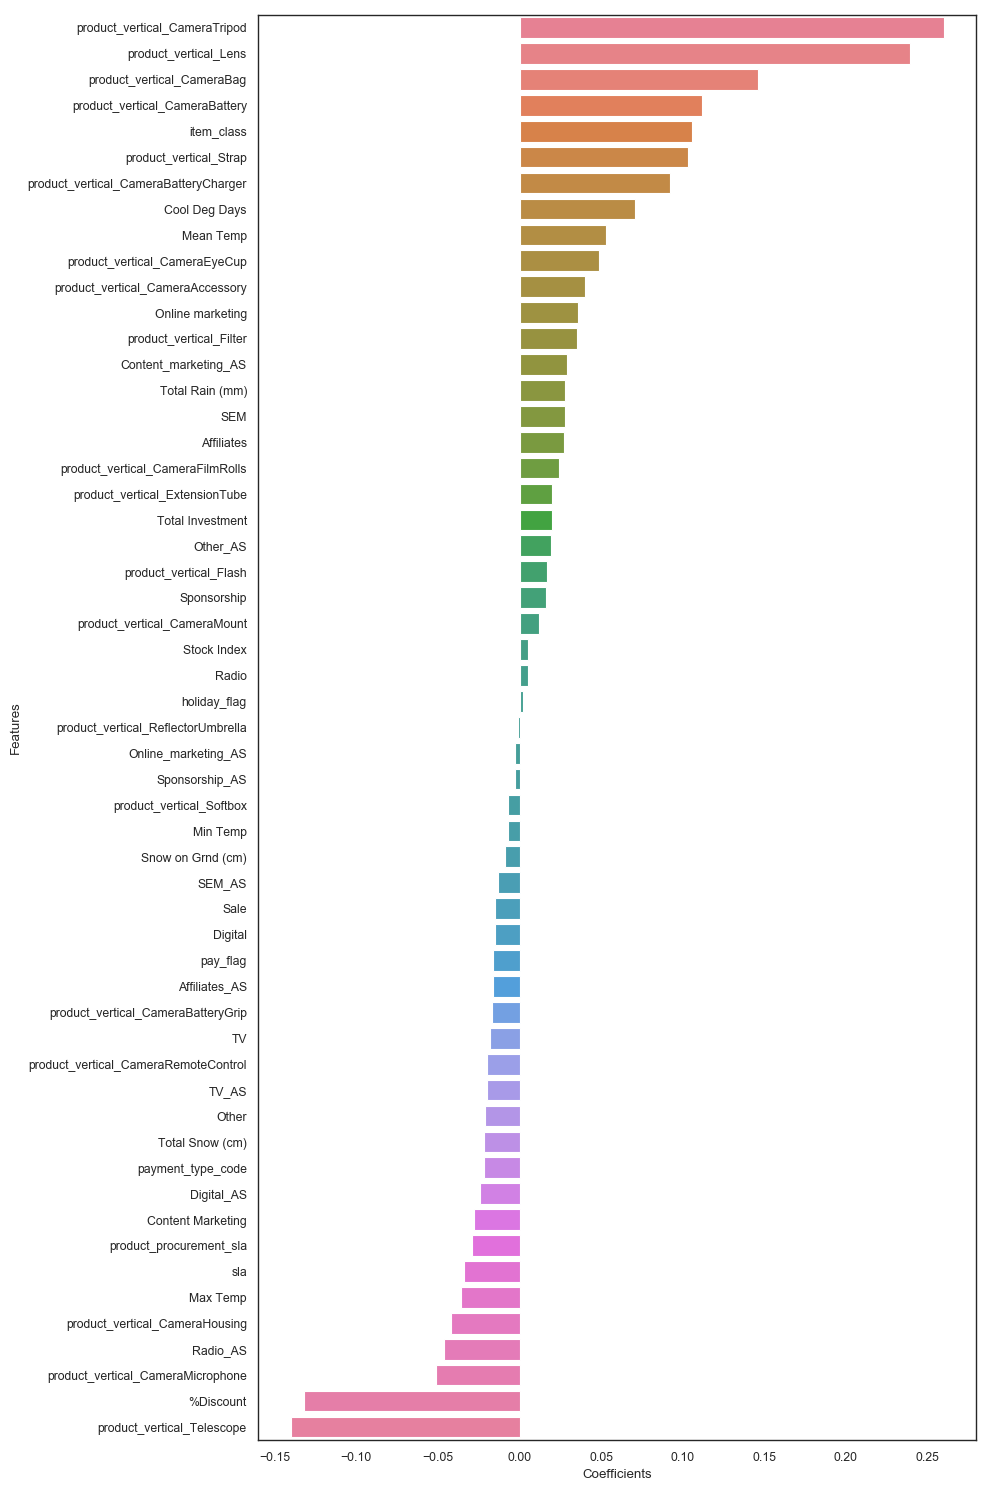

In [303]:
#Camera Features plot
plt.figure(figsize=(10, 15), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.barplot(y='Features', x='Coefficients', palette='husl', data=camera_mult_coef_df, estimator=np.sum)
plt.tight_layout()
plt.show()

In [304]:
# Model parametesr - multiplicative - Gaming
#Feature importance 
gaming_mult_model_parameters = list(gaming_mult_model.coef_)
gaming_mult_model_parameters.insert(0, gaming_mult_model.intercept_)
gaming_mult_model_parameters = [round(x, 3) for x in gaming_mult_model_parameters]
cols = X_gaming_mult_df_test.columns
cols = cols.insert(0, "constant")
gaming_mult_coef = list(zip(cols, gaming_mult_model_parameters))
gaming_mult_coef

[('constant', 0.032),
 ('sla', -0.119),
 ('product_procurement_sla', -0.121),
 ('pay_flag', 0.002),
 ('payment_type_code', 0.06),
 ('holiday_flag', 0.074),
 ('item_class', 0.088),
 ('%Discount', -0.103),
 ('product_vertical_GameControlMount', -0.0),
 ('product_vertical_GamePad', 0.165),
 ('product_vertical_GamingAccessoryKit', -0.081),
 ('product_vertical_GamingAdapter', 0.172),
 ('product_vertical_GamingChargingStation', 0.014),
 ('product_vertical_GamingHeadset', -0.024),
 ('product_vertical_GamingKeyboard', 0.17),
 ('product_vertical_GamingMemoryCard', -0.053),
 ('product_vertical_GamingMouse', 0.091),
 ('product_vertical_GamingMousePad', 0.04),
 ('product_vertical_GamingSpeaker', 0.006),
 ('product_vertical_JoystickGamingWheel', 0.068),
 ('product_vertical_MotionController', 0.029),
 ('product_vertical_TVOutCableAccessory', 0.132),
 ('Total Investment', 0.013),
 ('TV', 0.02),
 ('Digital', -0.036),
 ('Sponsorship', -0.022),
 ('Content Marketing', -0.013),
 ('Online marketing', 0.065

In [305]:
gaming_mult_coef_df = pd.DataFrame(gaming_mult_coef)
col_rename = {0:'Features',1: 'Coefficients'}
gaming_mult_coef_df = gaming_mult_coef_df.rename(columns=col_rename)
gaming_mult_coef_df = gaming_mult_coef_df.iloc[1:,:]
gaming_mult_coef_df = gaming_mult_coef_df.loc[gaming_mult_coef_df['Coefficients']!=0.0]
gaming_mult_coef_df = gaming_mult_coef_df.sort_values(by=['Coefficients'], ascending = False)
gaming_mult_coef_df

Features  Coefficients
11          product_vertical_GamingAdapter         0.172
14         product_vertical_GamingKeyboard         0.170
9                 product_vertical_GamePad         0.165
21    product_vertical_TVOutCableAccessory         0.132
35                    Content_marketing_AS         0.096
16            product_vertical_GamingMouse         0.091
6                               item_class         0.088
30                                   Radio         0.084
5                             holiday_flag         0.074
19    product_vertical_JoystickGamingWheel         0.068
27                        Online marketing         0.065
4                        payment_type_code         0.060
44                                Min Temp         0.059
28                              Affiliates         0.058
17         product_vertical_GamingMousePad         0.040
33                              Digital_AS         0.040
20       product_vertical_MotionController         0.029
23                                      TV         0.020
36                     Online_marketing_AS         0.018
12  product_vertical_GamingChargingStation         0.014
47                         Total Rain (mm)         0.014
22                        Total Investment         0.013
31                                   Other         0.011
18          product_vertical_GamingSpeaker         0.006
37                           Affiliates_AS         0.005
3                                 pay_flag         0.002
49                       Snow on Grnd (cm)         0.001
48                         Total Snow (cm)        -0.006
26                       Content Marketing        -0.013
43                                Max Temp        -0.014
39                                Radio_AS        -0.016
29                                     SEM        -0.020
32                                   TV_AS        -0.021
25                             Sponsorship        -0.022
13          product_vertical_GamingHeadset        -0.024
45                               Mean Temp        -0.025
34                          Sponsorship_AS        -0.025
41                                     NPS        -0.033
24                                 Digital        -0.036
50                                    Sale        -0.046
15       product_vertical_GamingMemoryCard        -0.053
42                             Stock Index        -0.079
40                                Other_AS        -0.081
10     product_vertical_GamingAccessoryKit        -0.081
38                                  SEM_AS        -0.089
7                                %Discount        -0.103
46                           Cool Deg Days        -0.117
1                                      sla        -0.119
2                  product_procurement_sla        -0.121

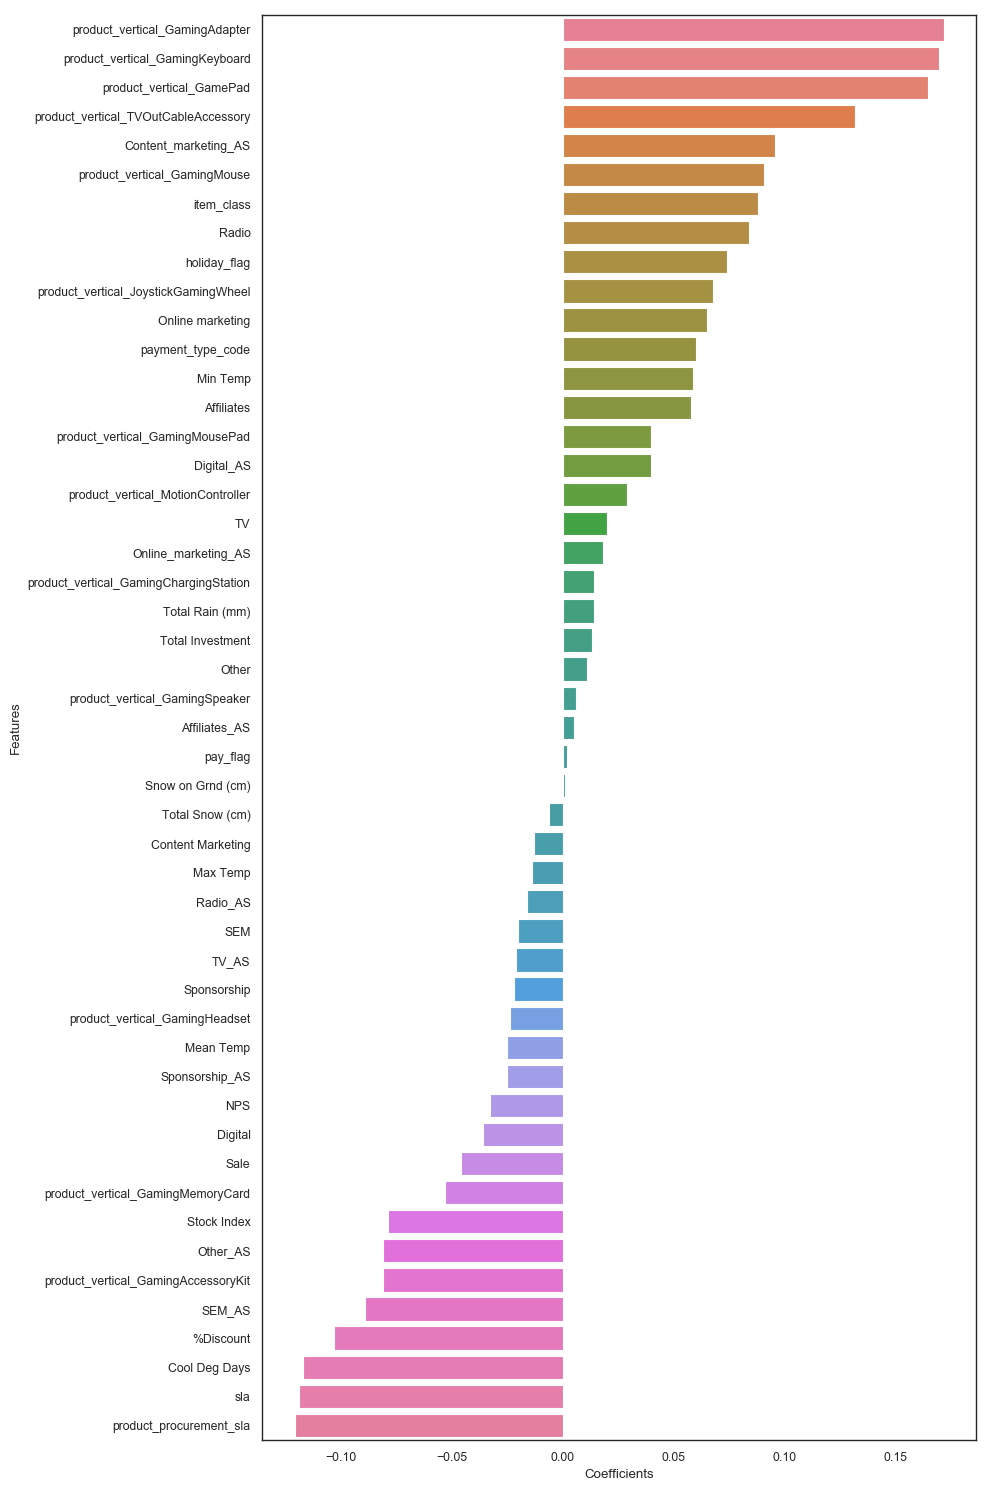

In [306]:
# Gaming - multiplicative - important features plot
plt.figure(figsize=(10, 15), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.barplot(y='Features', x='Coefficients', palette='husl', data=gaming_mult_coef_df, estimator=np.sum)
plt.tight_layout()

plt.show()

In [307]:
# Model parametesr - multiplicative - HomeAudio
#Feature importance 
home_mult_model_parameters = list(homeaudio_mult_model.coef_)
home_mult_model_parameters.insert(0, homeaudio_mult_model.intercept_)
home_mult_model_parameters = [round(x, 3) for x in home_mult_model_parameters]
cols = homeaudio_mult_df_test.columns
cols = cols.insert(0, "constant")
home_mult_coef = list(zip(cols, home_mult_model_parameters))
home_mult_coef

[('constant', 0.021),
 ('sla', 0.071),
 ('product_procurement_sla', -0.034),
 ('pay_flag', -0.004),
 ('payment_type_code', 0.006),
 ('holiday_flag', -0.0),
 ('item_class', 0.357),
 ('%Discount', -0.037),
 ('product_vertical_DJController', 0.026),
 ('product_vertical_Dock', -0.016),
 ('product_vertical_DockingStation', 0.101),
 ('product_vertical_FMRadio', 0.156),
 ('product_vertical_HiFiSystem', -0.06),
 ('product_vertical_HomeAudioSpeaker', 0.481),
 ('product_vertical_KaraokePlayer', 0.0),
 ('product_vertical_SlingBox', 0.012),
 ('product_vertical_SoundMixer', -0.013),
 ('product_vertical_VoiceRecorder', -0.028),
 ('Total Investment', 0.054),
 ('TV', 0.021),
 ('Digital', -0.079),
 ('Sponsorship', 0.107),
 ('Content Marketing', 0.069),
 ('Online marketing', -0.01),
 ('Affiliates', -0.032),
 ('SEM', -0.084),
 ('Radio', 0.032),
 ('Other', 0.124),
 ('TV_AS', -0.018),
 ('Digital_AS', 0.064),
 ('Sponsorship_AS', -0.017),
 ('Content_marketing_AS', -0.013),
 ('Online_marketing_AS', -0.02),
 (

In [308]:
home_mult_coef_df = pd.DataFrame(home_mult_coef)
col_rename = {0:'Features',1: 'Coefficients'}
home_mult_coef_df = home_mult_coef_df.rename(columns=col_rename)
home_mult_coef_df = home_mult_coef_df.iloc[1:,:]
home_mult_coef_df = home_mult_coef_df.loc[home_mult_coef_df['Coefficients']!=0.0]
home_mult_coef_df = home_mult_coef_df.sort_values(by=['Coefficients'], ascending = False)
home_mult_coef_df

Features  Coefficients
13  product_vertical_HomeAudioSpeaker         0.481
6                          item_class         0.357
11           product_vertical_FMRadio         0.156
27                              Other         0.124
21                        Sponsorship         0.107
10    product_vertical_DockingStation         0.101
1                                 sla         0.071
22                  Content Marketing         0.069
38                        Stock Index         0.066
29                         Digital_AS         0.064
18                   Total Investment         0.054
45                  Snow on Grnd (cm)         0.044
26                              Radio         0.032
39                           Max Temp         0.028
8       product_vertical_DJController         0.026
35                           Radio_AS         0.025
34                             SEM_AS         0.024
19                                 TV         0.021
42                      Cool Deg Days         0.016
15          product_vertical_SlingBox         0.012
46                               Sale         0.011
4                   payment_type_code         0.006
37                                NPS        -0.003
3                            pay_flag        -0.004
40                           Min Temp        -0.005
43                    Total Rain (mm)        -0.010
23                   Online marketing        -0.010
31               Content_marketing_AS        -0.013
16        product_vertical_SoundMixer        -0.013
9               product_vertical_Dock        -0.016
30                     Sponsorship_AS        -0.017
28                              TV_AS        -0.018
32                Online_marketing_AS        -0.020
44                    Total Snow (cm)        -0.020
17     product_vertical_VoiceRecorder        -0.028
24                         Affiliates        -0.032
2             product_procurement_sla        -0.034
7                           %Discount        -0.037
41                          Mean Temp        -0.037
33                      Affiliates_AS        -0.051
36                           Other_AS        -0.059
12        product_vertical_HiFiSystem        -0.060
20                            Digital        -0.079
25                                SEM        -0.084

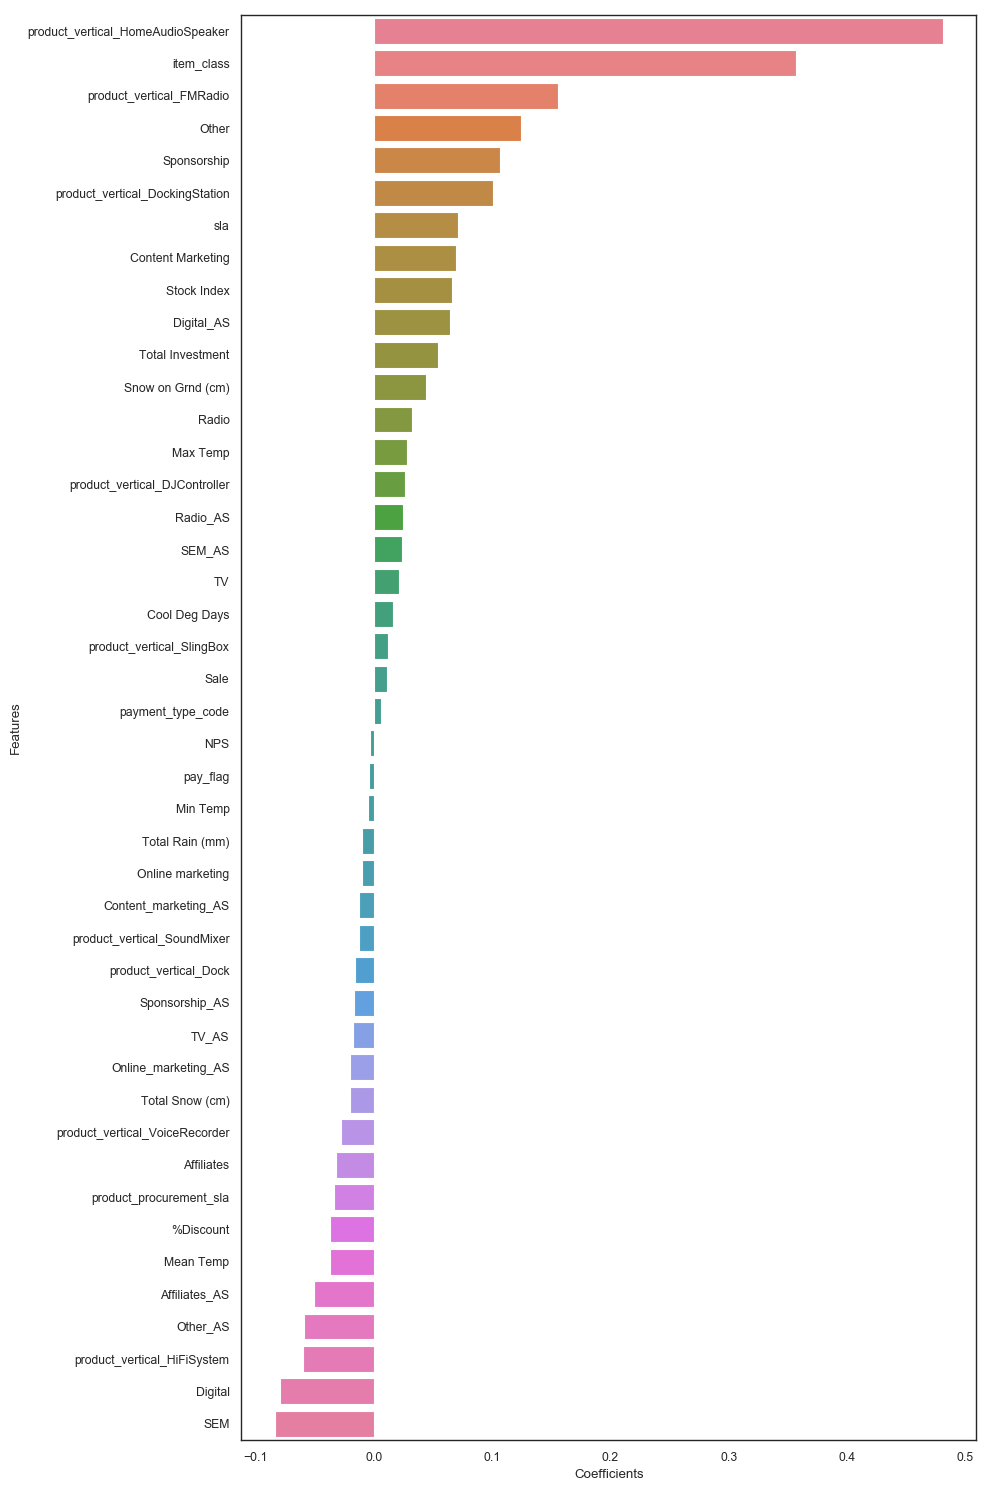

In [309]:
# Multiplicative - HomeAudio - fewature importance plot
plt.figure(figsize=(10, 15), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.barplot(y='Features', x='Coefficients', palette='husl', data=home_mult_coef_df, estimator=np.sum)
plt.tight_layout()
plt.show()

# Distributed Lag Model

In [310]:
# Making copy of dataframes from the original ones
camera_dist_df = camera_df_final.copy()
gaming_dist_df = gaming_df_final.copy()
homeaudio_dist_df = homeaudio_df_final.copy()
 
#Dropping week

 

In [311]:
camera_dist_df = camera_dist_df.drop('Week', axis=1)
gaming_dist_df = gaming_dist_df.drop('Week', axis=1)
homeaudio_dist_df = homeaudio_dist_df.drop('Week', axis=1)
camera_dist_df.head()

gmv   sla  product_procurement_sla  pay_flag  payment_type_code  \
25 3800540.000 7.056                    2.779         0               1870   
26 4274721.000 6.400                    2.809       490               1989   
27 4297908.000 6.414                    2.869         0               2006   
28 2738474.000 6.373                    2.827         0               1375   
29     699.000 5.000                    4.000         0                  1   

    holiday_flag  item_class  %Discount  product_vertical_CameraAccessory  \
25             0         355     45.169                                42   
26           847         383     45.564                                30   
27             0         357     44.717                                42   
28             0         231     44.080                                40   
29             0           0     51.790                                 0   

    product_vertical_CameraBag  ...    NPS  Stock Index  Max Temp  Min Temp  \
25                     330.000  ... 54.600     1177.000    28.000    12.500   
26                     349.000  ... 54.600     1177.000    33.000    11.000   
27                     288.000  ... 54.600     1177.000    31.500    14.500   
28                     184.000  ... 54.600     1177.000    33.500    16.000   
29                       0.000  ... 59.987     1206.000    28.500    15.000   

    Mean Temp  Cool Deg Days  Total Rain (mm)  Total Snow (cm)  \
25     20.100          2.383            4.417            0.000   
26     23.183          5.183            1.400            0.000   
27     23.060          5.060            1.080            0.000   
28     24.567          6.567            4.633            0.000   
29     21.650          3.650            0.350            0.000   

    Snow on Grnd (cm)  Sale  
25              0.000     0  
26              0.000     2  
27              0.000     0  
28              0.000     0  
29              0.000     0  

[5 rows x 59 columns]

In [312]:
#We will create lag variables for 1 week, 2 week and 3 weeks
def create_lag(df,x,y):
    for i in x:
        loc_index = df.columns.get_loc(i) + 1
        df.insert(loc=loc_index,column= i+'_lag'+np.str(y),value=df[i].shift(y))
    return df



In [313]:
#STarting with 3 week lag
camera_dist_df_cols = camera_dist_df.columns
gaming_dist_df_cols = gaming_dist_df.columns
homeaudio_dist_df_cols = homeaudio_dist_df.columns


In [314]:
homeaudio_dist_df_cols

Index(['gmv', 'sla', 'product_procurement_sla', 'pay_flag',
       'payment_type_code', 'holiday_flag', 'item_class', '%Discount',
       'product_vertical_DJController', 'product_vertical_Dock',
       'product_vertical_DockingStation', 'product_vertical_FMRadio',
       'product_vertical_HiFiSystem', 'product_vertical_HomeAudioSpeaker',
       'product_vertical_KaraokePlayer', 'product_vertical_SlingBox',
       'product_vertical_SoundMixer', 'product_vertical_VoiceRecorder',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other', 'TV_AS',
       'Digital_AS', 'Sponsorship_AS', 'Content_marketing_AS',
       'Online_marketing_AS', 'Affiliates_AS', 'SEM_AS', 'Radio_AS',
       'Other_AS', 'NPS', 'Stock Index', 'Max Temp', 'Min Temp', 'Mean Temp',
       'Cool Deg Days', 'Total Rain (mm)', 'Total Snow (cm)',
       'Snow on Grnd (cm)', 'Sale'],
      dtype='object')

In [315]:
camera_dist_df = create_lag(camera_dist_df,camera_dist_df_cols,3)
gaming_dist_df = create_lag(gaming_dist_df,gaming_dist_df_cols,3)
homeaudio_dist_df = create_lag(homeaudio_dist_df,homeaudio_dist_df_cols,3)
gaming_dist_df.head()

gmv    gmv_lag3   sla  sla_lag3  product_procurement_sla  \
25 2654733.000         nan 5.414       nan                    3.231   
26 2226007.359         nan 5.298       nan                    2.726   
27 2541974.500         nan 5.429       nan                    2.622   
28 1817588.000 2654733.000 5.689     5.414                    3.225   
29    2295.000 2226007.359 7.250     5.298                    2.250   

    product_procurement_sla_lag3  pay_flag  pay_flag_lag3  payment_type_code  \
25                           nan         0            nan               2091   
26                           nan       309            nan               1992   
27                           nan         0            nan               1801   
28                         3.231         1          0.000               1327   
29                         2.726         0        309.000                  3   

    payment_type_code_lag3  ...  Cool Deg Days  Cool Deg Days_lag3  \
25                     nan  ...          2.383                 nan   
26                     nan  ...          5.183                 nan   
27                     nan  ...          5.060                 nan   
28                2091.000  ...          6.567               2.383   
29                1992.000  ...          3.650               5.183   

    Total Rain (mm)  Total Rain (mm)_lag3  Total Snow (cm)  \
25            4.417                   nan            0.000   
26            1.400                   nan            0.000   
27            1.080                   nan            0.000   
28            4.633                 4.417            0.000   
29            0.350                 1.400            0.000   

    Total Snow (cm)_lag3  Snow on Grnd (cm)  Snow on Grnd (cm)_lag3  Sale  \
25                   nan              0.000                     nan     0   
26                   nan              0.000                     nan     2   
27                   nan              0.000                     nan     0   
28                 0.000              0.000                   0.000     0   
29                 0.000              0.000                   0.000     0   

    Sale_lag3  
25        nan  
26        nan  
27        nan  
28      0.000  
29      2.000  

[5 rows x 102 columns]

In [316]:
#2 week lag
camera_dist_df = create_lag(camera_dist_df,camera_dist_df_cols,2)
gaming_dist_df = create_lag(gaming_dist_df,gaming_dist_df_cols,2)
homeaudio_dist_df = create_lag(homeaudio_dist_df,homeaudio_dist_df_cols,2)
gaming_dist_df.head()

gmv    gmv_lag2    gmv_lag3   sla  sla_lag2  sla_lag3  \
25 2654733.000         nan         nan 5.414       nan       nan   
26 2226007.359         nan         nan 5.298       nan       nan   
27 2541974.500 2654733.000         nan 5.429     5.414       nan   
28 1817588.000 2226007.359 2654733.000 5.689     5.298     5.414   
29    2295.000 2541974.500 2226007.359 7.250     5.429     5.298   

    product_procurement_sla  product_procurement_sla_lag2  \
25                    3.231                           nan   
26                    2.726                           nan   
27                    2.622                         3.231   
28                    3.225                         2.726   
29                    2.250                         2.622   

    product_procurement_sla_lag3  pay_flag  ...  Total Rain (mm)_lag3  \
25                           nan         0  ...                   nan   
26                           nan       309  ...                   nan   
27                           nan         0  ...                   nan   
28                         3.231         1  ...                 4.417   
29                         2.726         0  ...                 1.400   

    Total Snow (cm)  Total Snow (cm)_lag2  Total Snow (cm)_lag3  \
25            0.000                   nan                   nan   
26            0.000                   nan                   nan   
27            0.000                 0.000                   nan   
28            0.000                 0.000                 0.000   
29            0.000                 0.000                 0.000   

    Snow on Grnd (cm)  Snow on Grnd (cm)_lag2  Snow on Grnd (cm)_lag3  Sale  \
25              0.000                     nan                     nan     0   
26              0.000                     nan                     nan     2   
27              0.000                   0.000                     nan     0   
28              0.000                   0.000                   0.000     0   
29              0.000                   0.000                   0.000     0   

    Sale_lag2  Sale_lag3  
25        nan        nan  
26        nan        nan  
27      0.000        nan  
28      2.000      0.000  
29      0.000      2.000  

[5 rows x 153 columns]

In [317]:
#1 week lag
camera_dist_df = create_lag(camera_dist_df,camera_dist_df_cols,1)
gaming_dist_df = create_lag(gaming_dist_df,gaming_dist_df_cols,1)
homeaudio_dist_df = create_lag(homeaudio_dist_df,homeaudio_dist_df_cols,1)
gaming_dist_df.head()

gmv    gmv_lag1    gmv_lag2    gmv_lag3   sla  sla_lag1  sla_lag2  \
25 2654733.000         nan         nan         nan 5.414       nan       nan   
26 2226007.359 2654733.000         nan         nan 5.298     5.414       nan   
27 2541974.500 2226007.359 2654733.000         nan 5.429     5.298     5.414   
28 1817588.000 2541974.500 2226007.359 2654733.000 5.689     5.429     5.298   
29    2295.000 1817588.000 2541974.500 2226007.359 7.250     5.689     5.429   

    sla_lag3  product_procurement_sla  product_procurement_sla_lag1  ...  \
25       nan                    3.231                           nan  ...   
26       nan                    2.726                         3.231  ...   
27       nan                    2.622                         2.726  ...   
28     5.414                    3.225                         2.622  ...   
29     5.298                    2.250                         3.225  ...   

    Total Snow (cm)_lag2  Total Snow (cm)_lag3  Snow on Grnd (cm)  \
25                   nan                   nan              0.000   
26                   nan                   nan              0.000   
27                 0.000                   nan              0.000   
28                 0.000                 0.000              0.000   
29                 0.000                 0.000              0.000   

    Snow on Grnd (cm)_lag1  Snow on Grnd (cm)_lag2  Snow on Grnd (cm)_lag3  \
25                     nan                     nan                     nan   
26                   0.000                     nan                     nan   
27                   0.000                   0.000                     nan   
28                   0.000                   0.000                   0.000   
29                   0.000                   0.000                   0.000   

    Sale  Sale_lag1  Sale_lag2  Sale_lag3  
25     0        nan        nan        nan  
26     2      0.000        nan        nan  
27     0      2.000      0.000        nan  
28     0      0.000      2.000      0.000  
29     0      0.000      0.000      2.000  

[5 rows x 204 columns]

In [318]:
#Creating lags will have nulls when there was no preeding value, so imputing them with 0
camera_dist_df.fillna(value=0, inplace=True)
gaming_dist_df.fillna(value=0, inplace=True)
homeaudio_dist_df.fillna(value=0, inplace=True)

In [319]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

camera_dist_df[camera_dist_df.columns]=scaler.fit_transform(camera_dist_df[camera_dist_df.columns])
gaming_dist_df[gaming_dist_df.columns]=scaler.fit_transform(gaming_dist_df[gaming_dist_df.columns])
homeaudio_dist_df[homeaudio_dist_df.columns]=scaler.fit_transform(homeaudio_dist_df[homeaudio_dist_df.columns])

homeaudio_dist_df.head()

gmv  gmv_lag1  gmv_lag2  gmv_lag3   sla  sla_lag1  sla_lag2  sla_lag3  \
25 -0.086    -1.786    -1.711    -1.637 2.029    -4.718    -3.886    -3.337   
26  0.231    -0.072    -1.711    -1.637 1.526     1.604    -3.886    -3.337   
27 -0.063     0.239    -0.045    -1.637 1.548     1.223     1.404    -3.337   
28 -0.518    -0.049     0.257    -0.017 1.743     1.240     1.085     1.292   
29 -1.831    -0.496    -0.023     0.277 3.658     1.388     1.099     1.013   

    product_procurement_sla  product_procurement_sla_lag1  ...  \
25                    1.326                        -6.333  ...   
26                    0.664                         0.639  ...   
27                    1.169                         0.385  ...   
28                    0.401                         0.579  ...   
29                   -4.149                         0.284  ...   

    Total Snow (cm)_lag2  Total Snow (cm)_lag3  Snow on Grnd (cm)  \
25                -0.368                -0.368             -0.275   
26                -0.368                -0.368             -0.275   
27                -0.368                -0.368             -0.275   
28                -0.368                -0.368             -0.275   
29                -0.368                -0.368             -0.275   

    Snow on Grnd (cm)_lag1  Snow on Grnd (cm)_lag2  Snow on Grnd (cm)_lag3  \
25                  -0.275                  -0.275                  -0.275   
26                  -0.275                  -0.275                  -0.275   
27                  -0.275                  -0.275                  -0.275   
28                  -0.275                  -0.275                  -0.275   
29                  -0.275                  -0.275                  -0.275   

     Sale  Sale_lag1  Sale_lag2  Sale_lag3  
25 -0.435     -0.435     -0.435     -0.435  
26  0.870     -0.435     -0.435     -0.435  
27 -0.435      0.870     -0.435     -0.435  
28 -0.435     -0.435      0.870     -0.435  
29 -0.435     -0.435     -0.435      0.870  

[5 rows x 188 columns]

In [320]:
#TEST TRAIn SPLIT
camera_dist_df_train, camera_dist_df_test = train_test_split(camera_dist_df,train_size = 0.7, test_size = 0.3, random_state = 42)

gaming_dist_df_train, gaming_dist_df_test = train_test_split(gaming_dist_df, train_size = 0.7, test_size = 0.3, random_state = 42)

homeaudio_dist_df_train, homeaudio_dist_df_test = train_test_split(homeaudio_dist_df,train_size = 0.7, test_size = 0.3, random_state = 42)


In [321]:
# TRAIN DF
y_camera_dist_df_train = camera_dist_df_train.pop('gmv')
X_camera_dist_df_train = camera_dist_df_train

y_gaming_dist_df_train = gaming_dist_df_train.pop('gmv')
X_gaming_dist_df_train = gaming_dist_df_train

y_homeaudio_dist_df_train = homeaudio_dist_df_train.pop('gmv')
X_homeaudio_dist_df_train = homeaudio_dist_df_train

 

In [322]:
#TEST DF's
y_camera_dist_df_test = camera_dist_df_test.pop('gmv')
X_camera_dist_df_test = camera_dist_df_test

y_gaming_dist_df_test  = gaming_dist_df_test .pop('gmv')
X_gaming_dist_df_test  = gaming_dist_df_test 

y_homeaudio_dist_df_test = homeaudio_dist_df_test.pop('gmv')
X_homeaudio_dist_df_test = homeaudio_dist_df_test


In [323]:
#LR for Camera
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

camera_dist_model = LinearRegression().fit(X_camera_dist_df_train, y_camera_dist_df_train)
y_camera_dist_model_test_pred = camera_dist_model.predict(X_camera_dist_df_test)

print('R2 Score: {}'.format(r2_score(y_camera_dist_df_test, y_camera_dist_model_test_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_camera_dist_df_test, y_camera_dist_model_test_pred)))

R2 Score: 0.8770997543462318
Mean Squared Error: 0.20512447444931378


In [324]:
#LR for GAMING

gaming_dist_model = LinearRegression().fit(X_gaming_dist_df_train, y_gaming_dist_df_train)
y_gaming_dist_test_pred = gaming_dist_model.predict(X_gaming_dist_df_test)

print('R2 Score: {}'.format(r2_score(y_gaming_dist_df_test, y_gaming_dist_test_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_gaming_dist_df_test, y_gaming_dist_test_pred)))

R2 Score: 0.9255769227237051
Mean Squared Error: 0.07034973976497164


In [325]:
#LR for HomeAudio
homeaudio_dist_model = LinearRegression().fit(X_homeaudio_dist_df_train, y_homeaudio_dist_df_train)
y_homeaudio_dist_test_pred = homeaudio_dist_model.predict(X_homeaudio_dist_df_test)

print('R2 Score: {}'.format(r2_score(y_homeaudio_dist_df_test, y_homeaudio_dist_test_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_homeaudio_dist_df_test, y_homeaudio_dist_test_pred)))

R2 Score: 0.7973669450783522
Mean Squared Error: 0.08845103833568038


In [ ]:
#All R2 good and low MSE for 3 categories

In [326]:
#Camera Model parameters
# Model parametesr - Distributive - Camera
#Feature importance 
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) 
pd.set_option('display.precision',1)

camera_dist_model_parameters = list(camera_dist_model.coef_)
camera_dist_model_parameters.insert(0, camera_dist_model.intercept_)
camera_dist_model_parameters = [round(x, 3) for x in camera_dist_model_parameters]
cols = camera_dist_df_test.columns
cols = cols.insert(0, "constant")
camera_dist_coef = list(zip(cols, camera_dist_model_parameters))
camera_dist_coef

[('constant', -0.008),
 ('gmv_lag1', -0.006),
 ('gmv_lag2', -0.004),
 ('gmv_lag3', 0.005),
 ('sla', -0.008),
 ('sla_lag1', 0.027),
 ('sla_lag2', -0.002),
 ('sla_lag3', 0.004),
 ('product_procurement_sla', 0.042),
 ('product_procurement_sla_lag1', 0.006),
 ('product_procurement_sla_lag2', -0.013),
 ('product_procurement_sla_lag3', -0.007),
 ('pay_flag', -0.007),
 ('pay_flag_lag1', 0.007),
 ('pay_flag_lag2', -0.006),
 ('pay_flag_lag3', 0.021),
 ('payment_type_code', 0.043),
 ('payment_type_code_lag1', -0.01),
 ('payment_type_code_lag2', 0.0),
 ('payment_type_code_lag3', -0.005),
 ('holiday_flag', 0.029),
 ('holiday_flag_lag1', -0.031),
 ('holiday_flag_lag2', -0.018),
 ('holiday_flag_lag3', 0.012),
 ('item_class', 0.086),
 ('item_class_lag1', -0.011),
 ('item_class_lag2', -0.008),
 ('item_class_lag3', 0.005),
 ('%Discount', -0.029),
 ('%Discount_lag1', -0.006),
 ('%Discount_lag2', 0.021),
 ('%Discount_lag3', -0.007),
 ('product_vertical_CameraAccessory', 0.031),
 ('product_vertical_Camera

In [327]:
camera_dist_coef_df = pd.DataFrame(camera_dist_coef)
col_rename = {0:'Features',1: 'Coefficients'}
camera_dist_coef_df = camera_dist_coef_df.rename(columns=col_rename)
camera_dist_coef_df = camera_dist_coef_df.iloc[1:,:]
camera_dist_coef_df = camera_dist_coef_df.loc[camera_dist_coef_df['Coefficients']!=0.0]
camera_dist_coef_df = camera_dist_coef_df.sort_values(by=['Coefficients'], ascending = False)
camera_dist_coef_df

Features  Coefficients
24                                   item_class         0.086
96                        product_vertical_Lens         0.068
60               product_vertical_CameraHousing         0.065
36                   product_vertical_CameraBag         0.059
40               product_vertical_CameraBattery         0.055
72         product_vertical_CameraRemoteControl         0.055
84                      product_vertical_Filter         0.053
93       product_vertical_FlashShoeAdapter_lag1         0.050
76                product_vertical_CameraTripod         0.049
44        product_vertical_CameraBatteryCharger         0.045
107               product_vertical_Softbox_lag3         0.044
116                  product_vertical_Telescope         0.043
16                            payment_type_code         0.043
8                       product_procurement_sla         0.042
108                      product_vertical_Strap         0.040
56             product_vertical_CameraFilmRolls         0.034
48           product_vertical_CameraBatteryGrip         0.034
32             product_vertical_CameraAccessory         0.031
20                                 holiday_flag         0.029
50      product_vertical_CameraBatteryGrip_lag2         0.028
5                                      sla_lag1         0.027
78           product_vertical_CameraTripod_lag2         0.024
140                            Online marketing         0.024
144                                  Affiliates         0.023
201                            Stock Index_lag1         0.023
220                             Total Rain (mm)         0.022
176                         Online_marketing_AS         0.021
30                               %Discount_lag2         0.021
180                               Affiliates_AS         0.021
15                                pay_flag_lag3         0.021
..                                          ...           ...
118             product_vertical_Telescope_lag2        -0.014
209                               Min Temp_lag1        -0.014
224                             Total Snow (cm)        -0.015
85                 product_vertical_Filter_lag1        -0.015
97                   product_vertical_Lens_lag1        -0.015
101     product_vertical_ReflectorUmbrella_lag1        -0.016
46   product_vertical_CameraBatteryCharger_lag2        -0.016
135                            Sponsorship_lag3        -0.016
89                  product_vertical_Flash_lag1        -0.017
22                            holiday_flag_lag2        -0.018
81          product_vertical_ExtensionTube_lag1        -0.019
223                        Total Rain (mm)_lag3        -0.020
54           product_vertical_CameraEyeCup_lag2        -0.020
205                               Max Temp_lag1        -0.021
35        product_vertical_CameraAccessory_lag3        -0.023
213                              Mean Temp_lag1        -0.023
196                                         NPS        -0.024
217                          Cool Deg Days_lag1        -0.026
233                                   Sale_lag1        -0.026
218                          Cool Deg Days_lag2        -0.028
28                                    %Discount        -0.029
211                               Min Temp_lag3        -0.030
207                               Max Temp_lag3        -0.031
21                            holiday_flag_lag1        -0.031
219                          Cool Deg Days_lag3        -0.033
95       product_vertical_FlashShoeAdapter_lag3        -0.034
51      product_vertical_CameraBatteryGrip_lag3        -0.034
215                              Mean Temp_lag3        -0.034
62          product_vertical_CameraHousing_lag2        -0.035
83          product_vertical_ExtensionTube_lag3        -0.035

[225 rows x 2 columns]

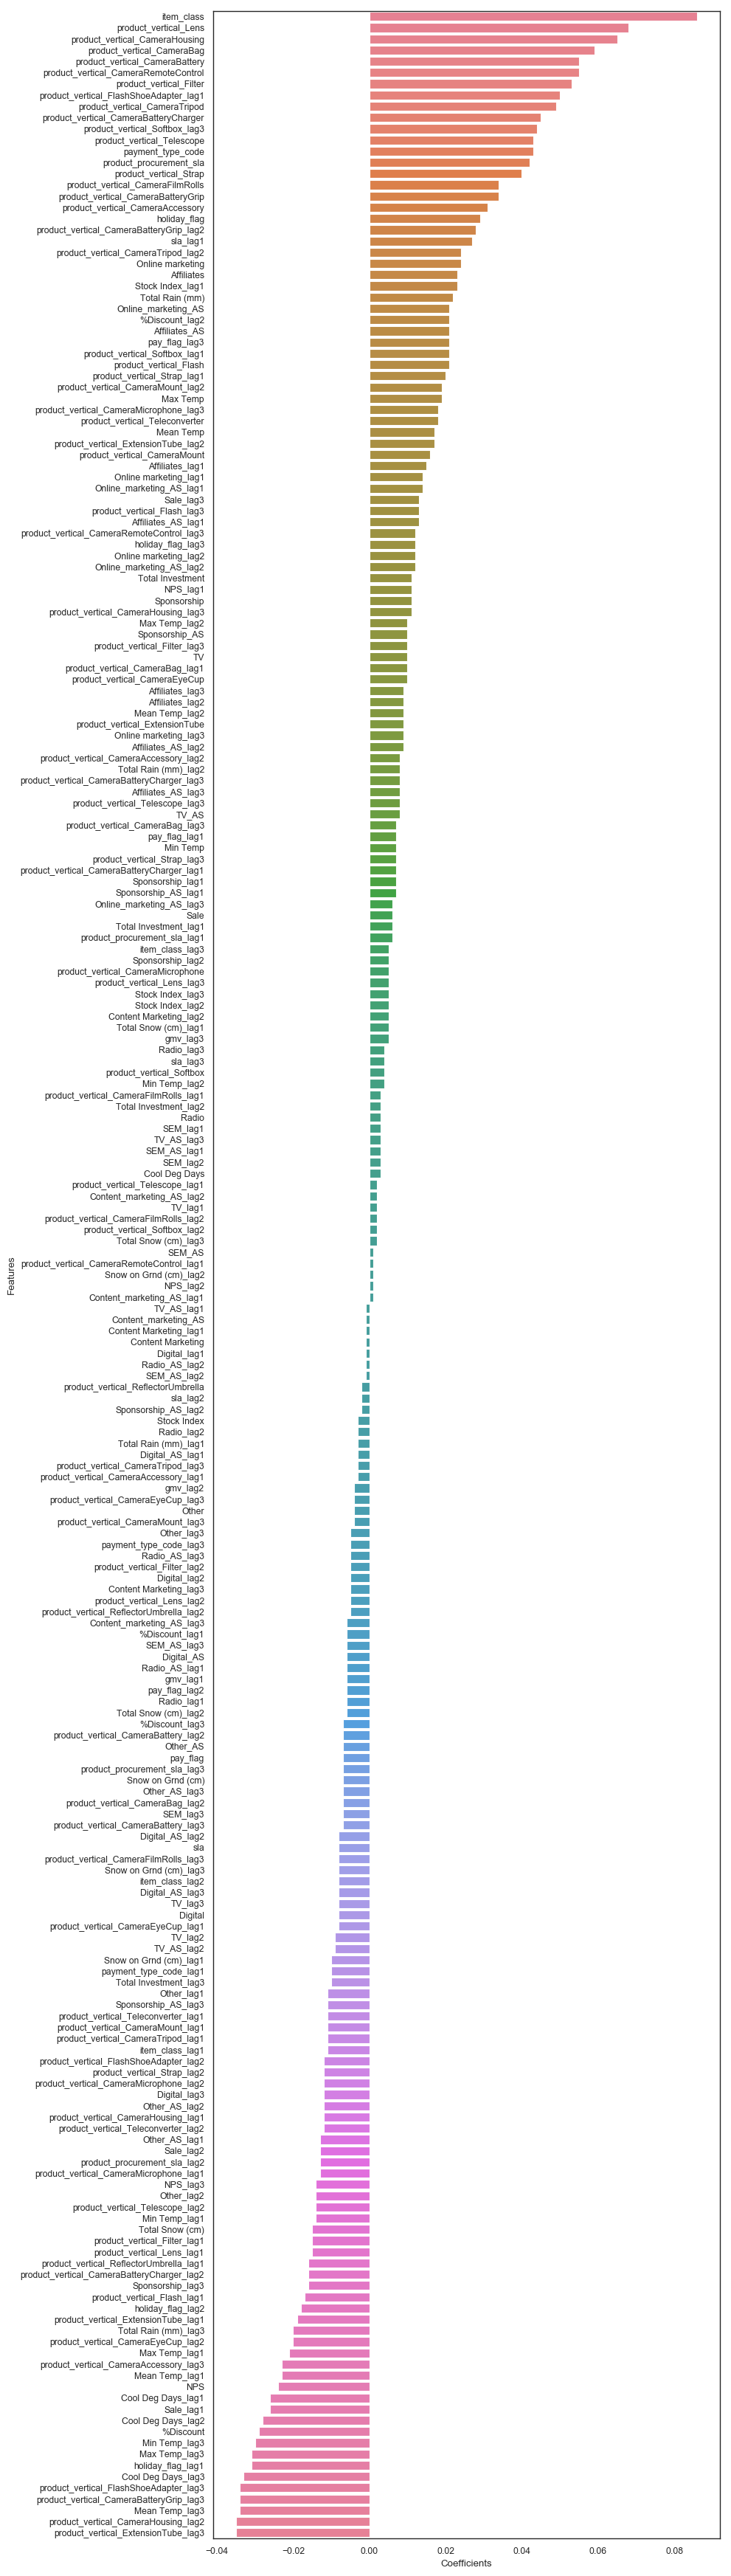

In [328]:
# Important Features plot - ditributive lag - Camera
plt.figure(figsize=(10, 35), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.barplot(y='Features', x='Coefficients', palette='husl', data=camera_dist_coef_df, estimator=np.sum)
plt.tight_layout()

plt.show()

In [330]:
y_gaming_dlag = gaming_dist_df.pop('gmv')
X_gaming_dlag = gaming_dist_df

In [332]:
#Gaming Model parameters
# Model parametesr - Distributive - Gaming
# Make cross validated predictions
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn import metrics

gaming_dlag_model_cv = LinearRegression().fit(X_gaming_dlag, y_gaming_dlag)
gaming_dlag_predictions_cv = cross_val_predict(gaming_dlag_model_cv, X_gaming_dlag,  
                                                         y_gaming_dlag, cv=10)
accuracy = metrics.r2_score(y_gaming_dlag, gaming_dlag_predictions_cv)
print("Cross-Predicted Accuracy:", accuracy)
print('Mean Squared Error: {}'.format(mean_squared_error(y_gaming_dlag, gaming_dlag_predictions_cv)))

Cross-Predicted Accuracy: 0.9331678259033713
Mean Squared Error: 0.0668321740966287


In [333]:
# Gaming-Distributed- model parameters
gaming_dlag_model_parameters = list(gamingaccessory_dladd_model_cv.coef_)
gaming_dlag_model_parameters.insert(0, gamingaccessory_dladd_model_cv.intercept_)
gaming_dlag_model_parameters = [round(x, 3) for x in gaming_dlag_model_parameters]
cols = X_gaming_dist_df_test.columns
cols = cols.insert(0, "constant")
gaming_dlag_coef = list(zip(cols, gaming_dlag_model_parameters))
gaming_dlag_coef

[('constant', 0.0),
 ('gmv_lag1', -0.008),
 ('gmv_lag2', -0.015),
 ('gmv_lag3', -0.004),
 ('sla', 0.016),
 ('sla_lag1', -0.016),
 ('sla_lag2', 0.002),
 ('sla_lag3', -0.023),
 ('product_procurement_sla', -0.006),
 ('product_procurement_sla_lag1', -0.017),
 ('product_procurement_sla_lag2', 0.008),
 ('product_procurement_sla_lag3', 0.024),
 ('pay_flag', 0.003),
 ('pay_flag_lag1', 0.025),
 ('pay_flag_lag2', -0.012),
 ('pay_flag_lag3', 0.017),
 ('payment_type_code', 0.043),
 ('payment_type_code_lag1', -0.0),
 ('payment_type_code_lag2', -0.006),
 ('payment_type_code_lag3', -0.002),
 ('holiday_flag', 0.049),
 ('holiday_flag_lag1', -0.021),
 ('holiday_flag_lag2', -0.015),
 ('holiday_flag_lag3', 0.007),
 ('item_class', 0.129),
 ('item_class_lag1', -0.013),
 ('item_class_lag2', -0.014),
 ('item_class_lag3', -0.011),
 ('%Discount', 0.008),
 ('%Discount_lag1', -0.02),
 ('%Discount_lag2', 0.027),
 ('%Discount_lag3', -0.008),
 ('product_vertical_GameControlMount', 0.005),
 ('product_vertical_GameCon

In [334]:

gaming_dlag_coef_df = pd.DataFrame(gaming_dlag_coef)
col_rename = {0:'Features',1: 'Coefficients'}
gaming_dlag_coef_df = gaming_dlag_coef_df.rename(columns=col_rename)
gaming_dlag_coef_df = gaming_dlag_coef_df.iloc[1:,:]
gaming_dlag_coef_df = gaming_dlag_coef_df.loc[gaming_dlag_coef_df['Coefficients']!=0.0]
gaming_dlag_coef_df = gaming_dlag_coef_df.sort_values(by=['Coefficients'], ascending = False)
gaming_dlag_coef_df

Features  Coefficients
36                    product_vertical_GamePad         0.158
24                                  item_class         0.129
40         product_vertical_GamingAccessoryKit         0.122
80           product_vertical_MotionController         0.106
52              product_vertical_GamingHeadset         0.087
72              product_vertical_GamingSpeaker         0.084
76        product_vertical_JoystickGamingWheel         0.084
84        product_vertical_TVOutCableAccessory         0.083
56             product_vertical_GamingKeyboard         0.079
68             product_vertical_GamingMousePad         0.061
64                product_vertical_GamingMouse         0.053
20                                holiday_flag         0.049
184                              Cool Deg Days         0.046
44              product_vertical_GamingAdapter         0.045
193                       Total Snow (cm)_lag1         0.045
16                           payment_type_code         0.043
74         product_vertical_GamingSpeaker_lag2         0.039
58        product_vertical_GamingKeyboard_lag2         0.032
81      product_vertical_MotionController_lag1         0.031
59        product_vertical_GamingKeyboard_lag3         0.030
192                            Total Snow (cm)         0.030
92                                          TV         0.027
30                              %Discount_lag2         0.027
46         product_vertical_GamingAdapter_lag2         0.027
13                               pay_flag_lag1         0.025
11                product_procurement_sla_lag3         0.024
128                                      TV_AS         0.022
174                              Max Temp_lag2         0.020
196                          Snow on Grnd (cm)         0.020
177                              Min Temp_lag1         0.020
..                                         ...           ...
37               product_vertical_GamePad_lag1        -0.013
25                             item_class_lag1        -0.013
173                              Max Temp_lag1        -0.013
61      product_vertical_GamingMemoryCard_lag1        -0.014
26                             item_class_lag2        -0.014
87   product_vertical_TVOutCableAccessory_lag3        -0.015
2                                     gmv_lag2        -0.015
22                           holiday_flag_lag2        -0.015
135                            Digital_AS_lag3        -0.016
5                                     sla_lag1        -0.016
191                       Total Rain (mm)_lag3        -0.016
178                              Min Temp_lag2        -0.017
9                 product_procurement_sla_lag1        -0.017
202                                  Sale_lag2        -0.017
122                                 Radio_lag2        -0.017
126                                 Other_lag2        -0.017
82      product_vertical_MotionController_lag2        -0.018
175                              Max Temp_lag3        -0.019
199                     Snow on Grnd (cm)_lag3        -0.020
29                              %Discount_lag1        -0.020
21                           holiday_flag_lag1        -0.021
55         product_vertical_GamingHeadset_lag3        -0.021
7                                     sla_lag3        -0.023
41    product_vertical_GamingAccessoryKit_lag1        -0.024
186                         Cool Deg Days_lag2        -0.025
42    product_vertical_GamingAccessoryKit_lag2        -0.026
34      product_vertical_GameControlMount_lag2        -0.026
201                                  Sale_lag1        -0.029
195                       Total Snow (cm)_lag3        -0.033
179                              Min Temp_lag3        -0.035

[198 rows x 2 columns]

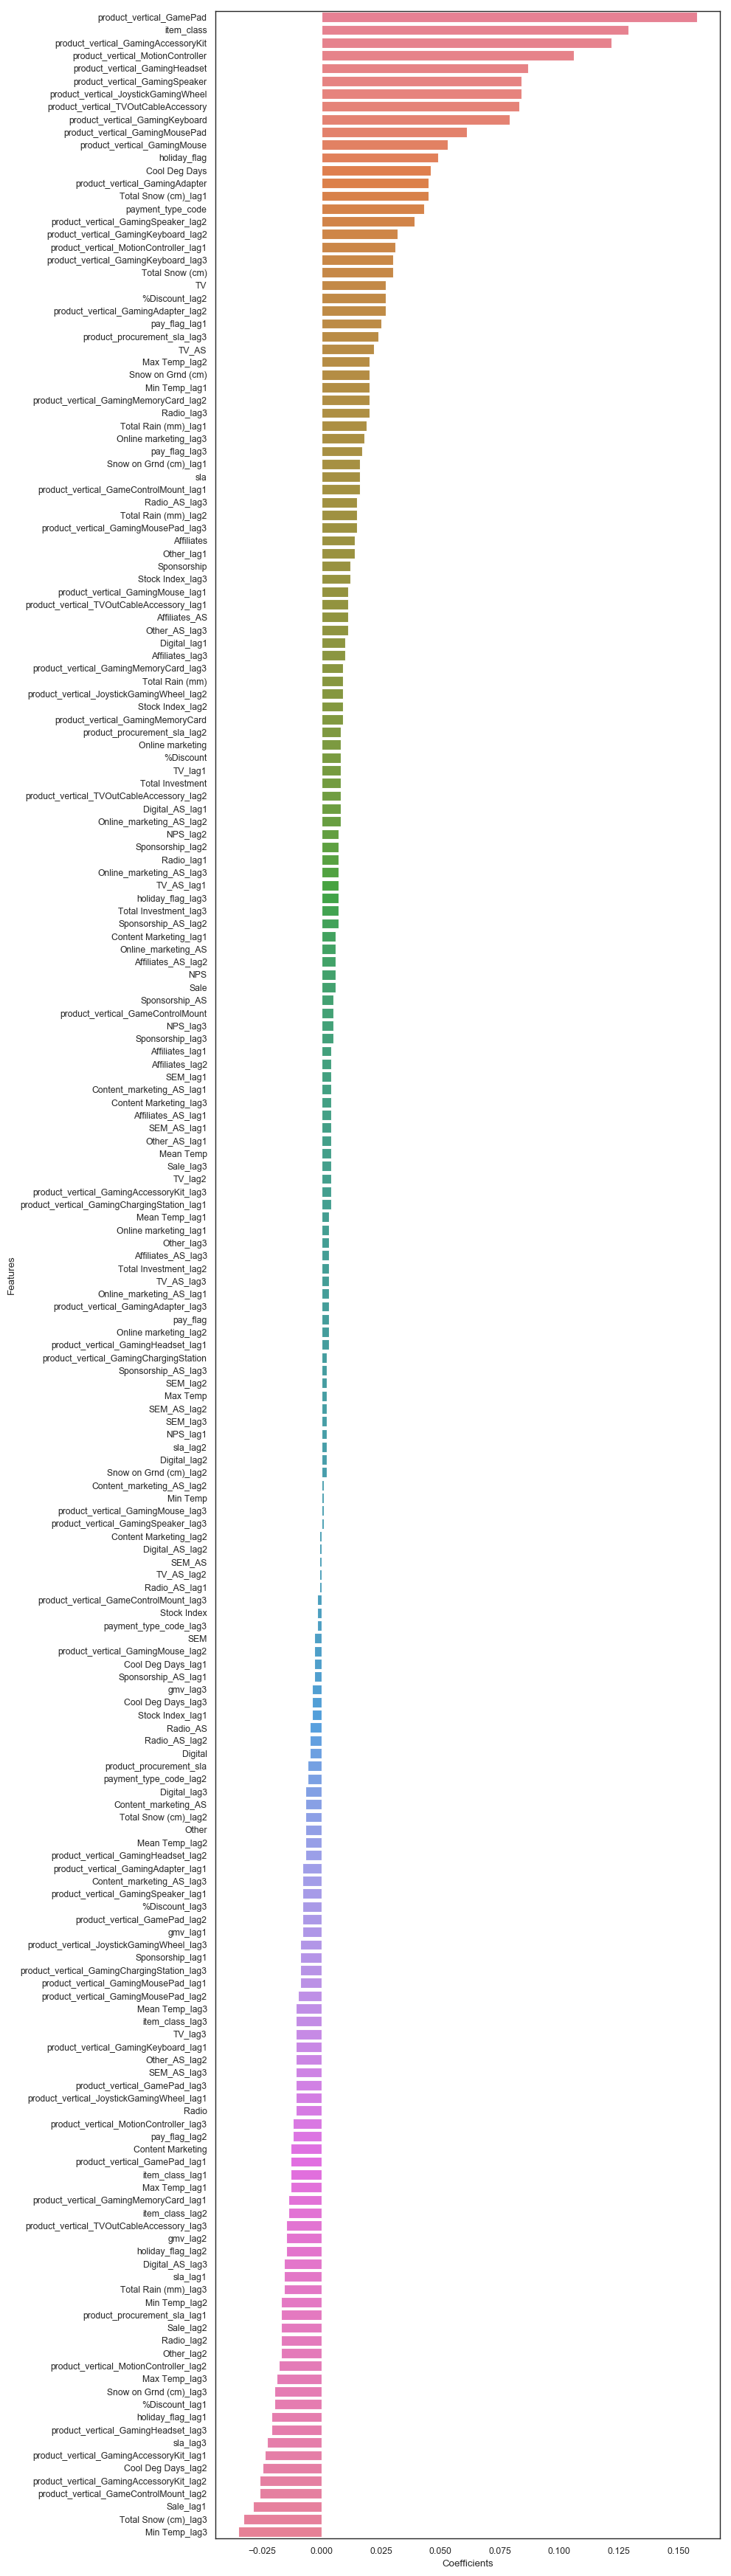

In [335]:
# Gaming- distributed feature imprtance plot
plt.figure(figsize=(10, 35), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.barplot(y='Features', x='Coefficients', palette='husl', data=gaming_dlag_coef_df, estimator=np.sum)
plt.tight_layout()

plt.show()

In [336]:
#MODEL parameters - Distributed - HOMEAUDIO

y_homeaudio_dlag = homeaudio_dist_df.pop('gmv')
X_homeaudio_dlag = homeaudio_dist_df

In [337]:
homeaudio_dlag_model_cv = LinearRegression().fit(X_homeaudio_dlag,y_homeaudio_dlag)
homeaudio_dlag_predictions_cv = cross_val_predict(homeaudio_dlag_model_cv, X_homeaudio_dlag, y_homeaudio_dlag, cv=10)
accuracy = metrics.r2_score(y_homeaudio_dlag, homeaudio_dlag_predictions_cv)
print("Cross-Predicted Accuracy:", accuracy)
print('Mean Squared Error: {}'.format(mean_squared_error(y_homeaudio_dlag, homeaudio_dlag_predictions_cv)))

Cross-Predicted Accuracy: 0.5793372173922426
Mean Squared Error: 0.4206627826077574


In [338]:
#   model parameters - distributed lag - Homeaudio
home_dlag_model_parameters = list(homeaudio_dlag_model_cv.coef_)
home_dlag_model_parameters.insert(0, homeaudio_dlag_model_cv.intercept_)
home_dlag_model_parameters = [round(x, 3) for x in home_dlag_model_parameters]
cols = X_homeaudio_dist_df_test.columns
cols = cols.insert(0, "constant")
home_dlag_coef = list(zip(cols, home_dlag_model_parameters))
home_dlag_coef

[('constant', 0.0),
 ('gmv_lag1', -0.02),
 ('gmv_lag2', 0.001),
 ('gmv_lag3', 0.004),
 ('sla', 0.0),
 ('sla_lag1', -0.013),
 ('sla_lag2', 0.013),
 ('sla_lag3', -0.022),
 ('product_procurement_sla', -0.004),
 ('product_procurement_sla_lag1', 0.029),
 ('product_procurement_sla_lag2', -0.011),
 ('product_procurement_sla_lag3', 0.018),
 ('pay_flag', 0.02),
 ('pay_flag_lag1', 0.023),
 ('pay_flag_lag2', -0.008),
 ('pay_flag_lag3', -0.012),
 ('payment_type_code', 0.138),
 ('payment_type_code_lag1', -0.009),
 ('payment_type_code_lag2', 0.012),
 ('payment_type_code_lag3', 0.006),
 ('holiday_flag', 0.109),
 ('holiday_flag_lag1', 0.003),
 ('holiday_flag_lag2', -0.036),
 ('holiday_flag_lag3', -0.002),
 ('item_class', 0.181),
 ('item_class_lag1', -0.029),
 ('item_class_lag2', -0.003),
 ('item_class_lag3', 0.007),
 ('%Discount', 0.064),
 ('%Discount_lag1', 0.003),
 ('%Discount_lag2', -0.002),
 ('%Discount_lag3', 0.022),
 ('product_vertical_DJController', 0.01),
 ('product_vertical_DJController_lag1'

In [339]:
home_dlag_coef_df = pd.DataFrame(home_dlag_coef)
col_rename = {0:'Features',1: 'Coefficients'}
home_dlag_coef_df = home_dlag_coef_df.rename(columns=col_rename)
home_dlag_coef_df = home_dlag_coef_df.iloc[1:,:]
home_dlag_coef_df = home_dlag_coef_df.loc[home_dlag_coef_df['Coefficients']!=0.0]
home_dlag_coef_df = home_dlag_coef_df.sort_values(by=['Coefficients'], ascending = False)
home_dlag_coef_df

Features  Coefficients
24                               item_class         0.181
52        product_vertical_HomeAudioSpeaker         0.173
56           product_vertical_KaraokePlayer         0.155
16                        payment_type_code         0.138
20                             holiday_flag         0.109
44                 product_vertical_FMRadio         0.084
28                                %Discount         0.064
36                    product_vertical_Dock         0.057
81                             Digital_lag1         0.050
48              product_vertical_HiFiSystem         0.047
101                                SEM_lag1         0.037
68           product_vertical_VoiceRecorder         0.036
117                         Digital_AS_lag1         0.036
43     product_vertical_DockingStation_lag3         0.033
37               product_vertical_Dock_lag1         0.031
9              product_procurement_sla_lag1         0.029
137                             SEM_AS_lag1         0.029
50         product_vertical_HiFiSystem_lag2         0.026
176                         Total Snow (cm)         0.026
89                   Content Marketing_lag1         0.024
33       product_vertical_DJController_lag1         0.024
40          product_vertical_DockingStation         0.023
69      product_vertical_VoiceRecorder_lag1         0.023
13                            pay_flag_lag1         0.023
31                           %Discount_lag3         0.022
168                           Cool Deg Days         0.021
164                               Mean Temp         0.021
12                                 pay_flag         0.020
125               Content_marketing_AS_lag1         0.019
45            product_vertical_FMRadio_lag1         0.019
..                                      ...           ...
5                                  sla_lag1        -0.013
178                    Total Snow (cm)_lag2        -0.013
120                          Sponsorship_AS        -0.014
121                     Sponsorship_AS_lag1        -0.016
78                                  TV_lag2        -0.017
71      product_vertical_VoiceRecorder_lag3        -0.017
110                              Other_lag2        -0.017
177                    Total Snow (cm)_lag1        -0.017
173                    Total Rain (mm)_lag1        -0.017
49         product_vertical_HiFiSystem_lag1        -0.017
157                           Max Temp_lag1        -0.018
42     product_vertical_DockingStation_lag2        -0.018
1                                  gmv_lag1        -0.020
57      product_vertical_KaraokePlayer_lag1        -0.021
41     product_vertical_DockingStation_lag1        -0.021
161                           Min Temp_lag1        -0.021
184                                    Sale        -0.021
7                                  sla_lag3        -0.022
35       product_vertical_DJController_lag3        -0.022
39               product_vertical_Dock_lag3        -0.024
53   product_vertical_HomeAudioSpeaker_lag1        -0.024
165                          Mean Temp_lag1        -0.027
149                                NPS_lag1        -0.027
85                         Sponsorship_lag1        -0.027
25                          item_class_lag1        -0.029
152                             Stock Index        -0.029
59      product_vertical_KaraokePlayer_lag3        -0.031
66         product_vertical_SoundMixer_lag2        -0.032
22                        holiday_flag_lag2        -0.036
51         product_vertical_HiFiSystem_lag3        -0.042

[182 rows x 2 columns]

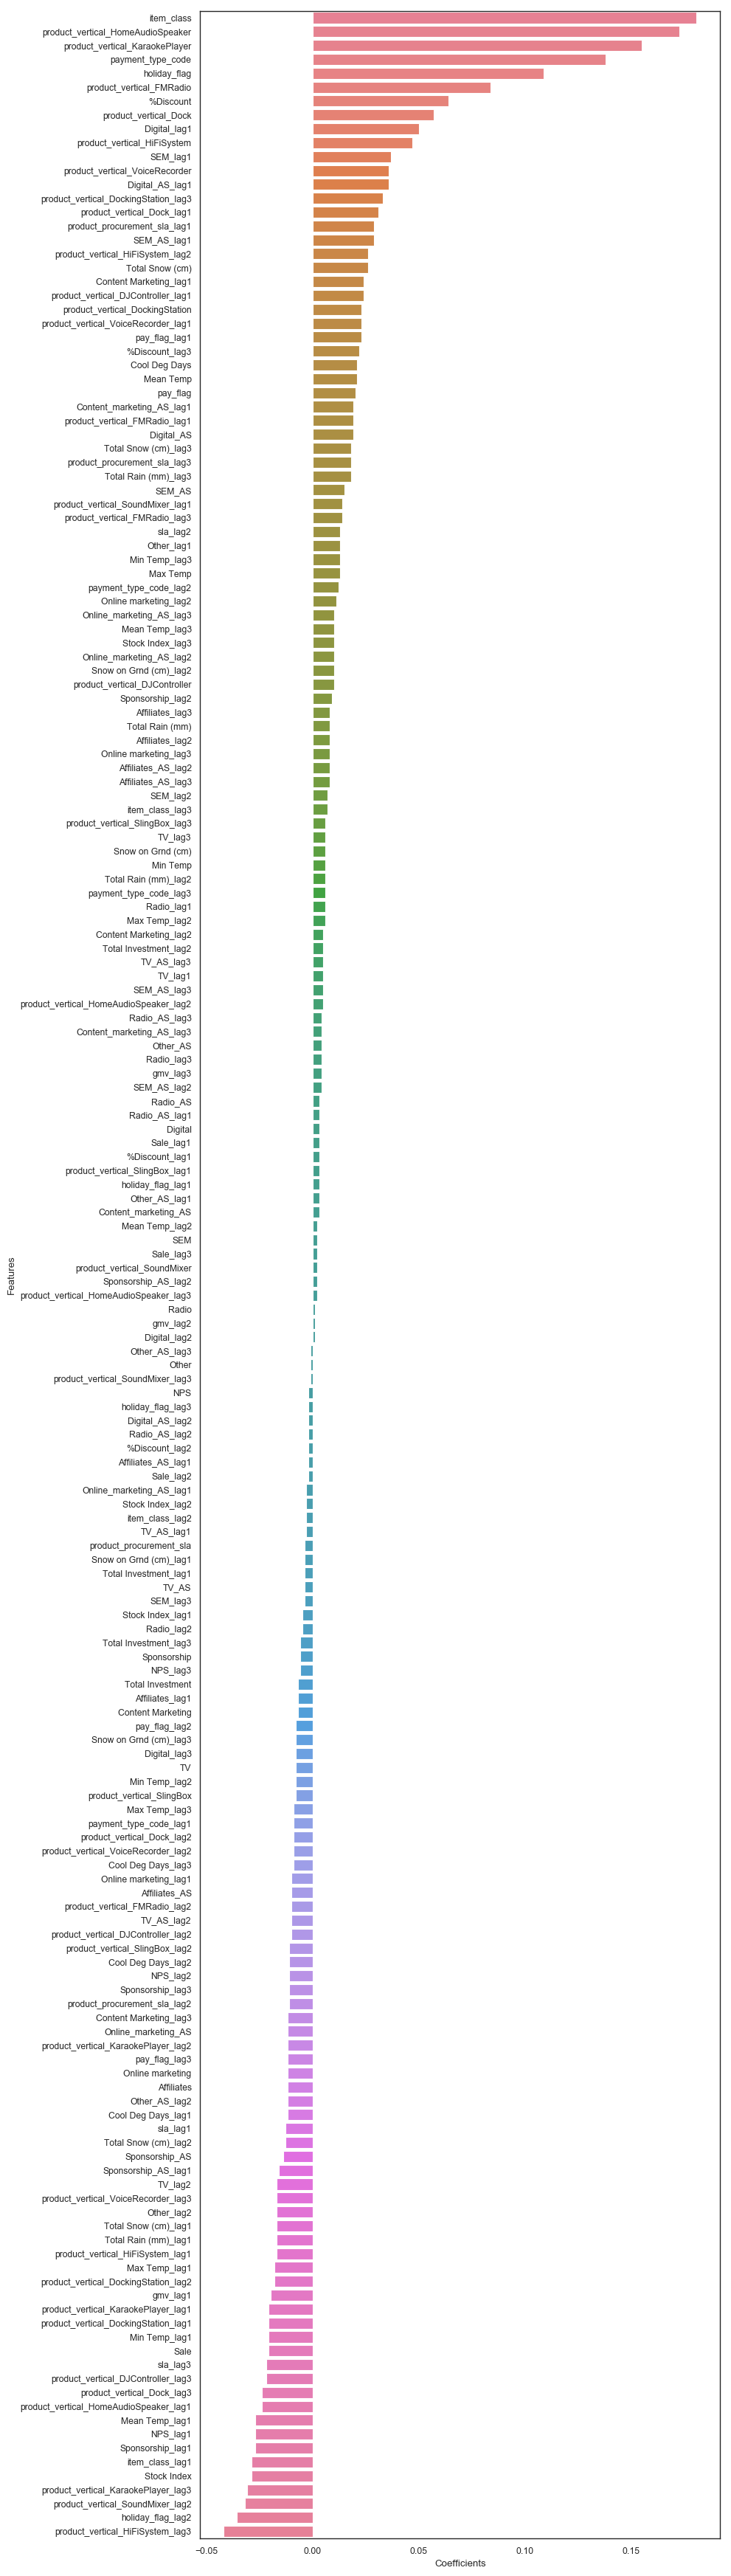

In [340]:
# Homeaudio -- distributed lag - feature importance plot
plt.figure(figsize=(10, 35), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.barplot(y='Features', x='Coefficients', palette='husl', data=home_dlag_coef_df, estimator=np.sum)
plt.tight_layout()

plt.show()

# Model Selection

Models Created :
                       Camera           Gaming           HomeAudio
                      R2    MSE        R2   MSE           R2   MSE
Basic Linear         0.90   0.16      0.70  0.28          0.57  0.19
Distrbutive(Lag)     0.88   0.20      0.92  0.07          0.80  0.09
Koyck                0.90   0.16      0.70  0.28          0.53  0.20
Multipicative(Log)   0.98   0.01      0.89  0.18          0.95  0.13

From this it is evident that Multiplicative Model is the best. 


# Top 10 features identified by Mutiplicative model for Camera:


In [361]:
camera_mult_coef_df_top10 = camera_mult_coef_df.head(10) 
camera_mult_coef_df_top10 


Features  Coefficients
19          product_vertical_CameraTripod         0.260
24                  product_vertical_Lens         0.239
9              product_vertical_CameraBag         0.146
10         product_vertical_CameraBattery         0.112
6                              item_class         0.106
27                 product_vertical_Strap         0.103
11  product_vertical_CameraBatteryCharger         0.092
54                          Cool Deg Days         0.071
53                              Mean Temp         0.053
13          product_vertical_CameraEyeCup         0.049

# Bottom 5 Features identified by Mutiplicative model  for Camera


In [363]:
camera_mult_coef_df_last5 = camera_mult_coef_df.tail(5)
camera_mult_coef_df_last5

Features  Coefficients
15     product_vertical_CameraHousing        -0.042
47                           Radio_AS        -0.046
16  product_vertical_CameraMicrophone        -0.051
7                           %Discount        -0.132
29         product_vertical_Telescope        -0.140

# Top 10 features identified by Mutiplicative model for Gaming:

In [364]:
gaming_mult_coef_df_top10 = gaming_mult_coef_df.head(10)
gaming_mult_coef_df_top10

Features  Coefficients
11        product_vertical_GamingAdapter         0.172
14       product_vertical_GamingKeyboard         0.170
9               product_vertical_GamePad         0.165
21  product_vertical_TVOutCableAccessory         0.132
35                  Content_marketing_AS         0.096
16          product_vertical_GamingMouse         0.091
6                             item_class         0.088
30                                 Radio         0.084
5                           holiday_flag         0.074
19  product_vertical_JoystickGamingWheel         0.068

# Bottom 5 Features identified by Mutiplicative model  for Gaming

In [365]:
gaming_mult_coef_df_last5 = gaming_mult_coef_df.tail()
gaming_mult_coef_df_last5

Features  Coefficients
38                   SEM_AS        -0.089
7                 %Discount        -0.103
46            Cool Deg Days        -0.117
1                       sla        -0.119
2   product_procurement_sla        -0.121

# Top 10 features identified by Mutiplicative model for Home Audio:

In [366]:
home_mult_coef_dftop10 = home_mult_coef_df.head(10)
home_mult_coef_dftop10

Features  Coefficients
13  product_vertical_HomeAudioSpeaker         0.481
6                          item_class         0.357
11           product_vertical_FMRadio         0.156
27                              Other         0.124
21                        Sponsorship         0.107
10    product_vertical_DockingStation         0.101
1                                 sla         0.071
22                  Content Marketing         0.069
38                        Stock Index         0.066
29                         Digital_AS         0.064

# Bottom 5 Features identified by Mutiplicative model  for Home Audio

In [367]:
home_mult_coef_dflast5 = home_mult_coef_df.tail()
home_mult_coef_dflast5

Features  Coefficients
33                Affiliates_AS        -0.051
36                     Other_AS        -0.059
12  product_vertical_HiFiSystem        -0.060
20                      Digital        -0.079
25                          SEM        -0.084